In [1]:
from __future__ import print_function, division
import torch
import torch
import torch.nn as nn
import torch.optim as optim
import data as dt
import model_3 as md
import copy
from pytorch_ssim import ssim
from torch.utils.data import DataLoader
# DenseNet cnn + pixelshuffle

In [2]:
# print gpu
torch.cuda.set_device(3)
currentDevice = torch.cuda.current_device()
print("Current GPU: " + str(currentDevice))
print(str(torch.cuda.device_count()))
print(str(torch.cuda.get_device_capability(currentDevice)))
print(torch.__version__)

Current GPU: 3
8
(6, 1)
1.0.0


In [3]:
USE_GPU = 1
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:3')
else:
    device = "cpu"
print(device)

cuda:3


In [ ]:
# generate csv file, run only for the first time
# dt.generate_csv()

In [4]:
csvFilePath = dt.get_csv_path()
transformed_dataset = dt.HE_SHG_Dataset(csv_file=csvFilePath,
                                               transform=dt.Compose([                                              
                                               dt.Rescale(96),
                                               dt.Normalize(),
                                               dt.ToTensor()
                                           ]))
# TODO: change the normalization parameters

In [18]:
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

In [ ]:
# TODO: insert back mean and variance to plot the image appropriately
dt.show_patch(dataloader) 

In [6]:
print('===> Building model')
model = md.Net().to(device)
criterionMSE = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)


===> Building model


In [7]:
def train(epoch):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = -(ssim(output, targetf)-1)
        
        p = 0.25
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))


In [ ]:
# def test():
#     avg_psnr = 0
#     with torch.no_grad():
#         for batch in testing_data_loader:
#             input, target = batch[0].to(device), batch[1].to(device)

#             prediction = model(input)
#             mse = criterion(prediction, target)
#             psnr = 10 * log10(1 / mse.item())
#             avg_psnr += psnr
#     print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))


In [ ]:
# def checkpoint(epoch):
#     model_out_path = "model_epoch_{}.pth".format(epoch)
#     torch.save(model, model_out_path)
#     print("Checkpoint saved to {}".format(model_out_path))

In [8]:
for epoch in range(1, 10 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.2147173136472702 lossSSIM: 0.9475566148757935
===> Epoch[1](0/25343): Loss: 0.7643
lossMSE: 0.19983629882335663 lossSSIM: 0.9404192566871643
===> Epoch[1](50/25343): Loss: 0.7553
lossMSE: 0.1958138346672058 lossSSIM: 0.9456815719604492
===> Epoch[1](100/25343): Loss: 0.7582
lossMSE: 0.1781737506389618 lossSSIM: 0.9440086483955383
===> Epoch[1](150/25343): Loss: 0.7525
lossMSE: 0.17502453923225403 lossSSIM: 0.9451726078987122
===> Epoch[1](200/25343): Loss: 0.7526
lossMSE: 0.16243106126785278 lossSSIM: 0.9438861012458801
===> Epoch[1](250/25343): Loss: 0.7485
lossMSE: 0.15796515345573425 lossSSIM: 0.9444253444671631
===> Epoch[1](300/25343): Loss: 0.7478
lossMSE: 0.13620805740356445 lossSSIM: 0.9203538298606873
===> Epoch[1](350/25343): Loss: 0.7243
lossMSE: 0.1353950947523117 lossSSIM: 0.9382316470146179
===> Epoch[1](400/25343): Loss: 0.7375
lossMSE: 0.12759187817573547 lossSSIM: 0.9376736283302307
===> Epoch[1](450/25343): Loss: 0.7352
lossMSE: 0.11874116957187653 lossSSIM

lossMSE: 0.02981446124613285 lossSSIM: 0.29218024015426636
===> Epoch[1](4200/25343): Loss: 0.2266
lossMSE: 0.029836216941475868 lossSSIM: 0.27972036600112915
===> Epoch[1](4250/25343): Loss: 0.2172
lossMSE: 0.026980243623256683 lossSSIM: 0.330585241317749
===> Epoch[1](4300/25343): Loss: 0.2547
lossMSE: 0.025275476276874542 lossSSIM: 0.30609822273254395
===> Epoch[1](4350/25343): Loss: 0.2359
lossMSE: 0.02903839200735092 lossSSIM: 0.27308303117752075
===> Epoch[1](4400/25343): Loss: 0.2121
lossMSE: 0.028859509155154228 lossSSIM: 0.338173508644104
===> Epoch[1](4450/25343): Loss: 0.2608
lossMSE: 0.026932137086987495 lossSSIM: 0.30359476804733276
===> Epoch[1](4500/25343): Loss: 0.2344
lossMSE: 0.028944168239831924 lossSSIM: 0.3111388683319092
===> Epoch[1](4550/25343): Loss: 0.2406
lossMSE: 0.024187499657273293 lossSSIM: 0.2836829423904419
===> Epoch[1](4600/25343): Loss: 0.2188
lossMSE: 0.028180744498968124 lossSSIM: 0.2792942523956299
===> Epoch[1](4650/25343): Loss: 0.2165
lossMSE: 

KeyboardInterrupt: 

In [23]:
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def test():
    avg_psnr = 0
    with torch.no_grad():
        for iteration, batch in enumerate(dataloader):
            input, target = batch['input'].to(device), batch['output'].to(device)
                
            prediction = model(input)

            target = target.float()

            outdataloader = {'input':prediction,'output':target}
            
            print(outdataloader['input'].size(), 
                      outdataloader['output'].size())

            plt.figure()
            input_batch, label_batch = outdataloader['input'], outdataloader['output']
            batch_size = 32
            im_size = input_batch.size(2)
            label_batch=label_batch.reshape([batch_size,1,im_size,im_size])
            print(label_batch.size())
#             for img in input_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m)
                            
#             for img in label_batch:
#                 for t, m, s in zip(img, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]):
#                     t.mul_(s).add_(m) 

            grid = utils.make_grid(input).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(input_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))
            plt.figure()

            grid = utils.make_grid(label_batch).cpu()
            plt.imshow(grid.numpy().transpose((1, 2, 0)))

            plt.axis('off')
            plt.ioff()
            plt.show()
            
            targetf = target[:, None]
            
            lossMSE = criterionMSE(prediction, targetf)      
            lossSSIM = -ssim(prediction, targetf)
        
            p = 0.25
            loss = p*lossMSE + (1-p)*lossSSIM
            combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
#             mse = criterion(prediction, target.float())

            psnr = 10 * torch.log10(1 / loss)
            avg_psnr += psnr
            if iteration == 16:
                break
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(dataloader)))

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


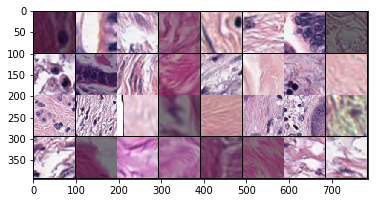

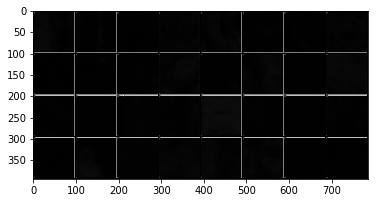

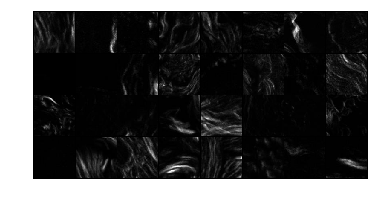

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


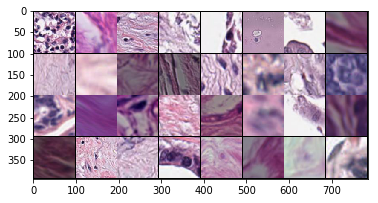

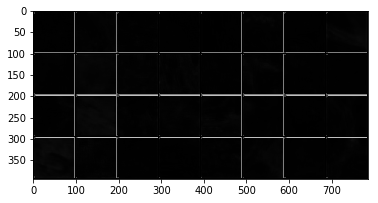

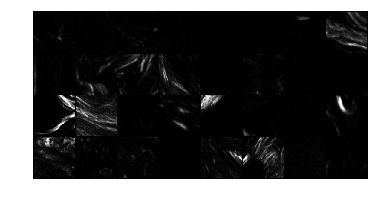

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


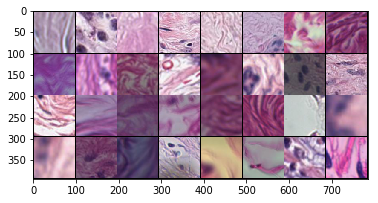

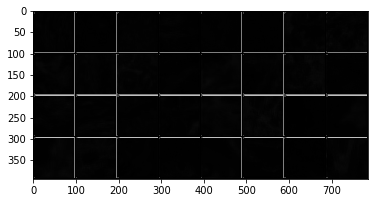

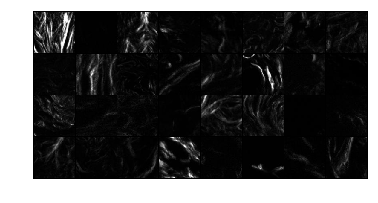

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


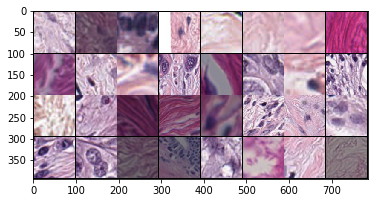

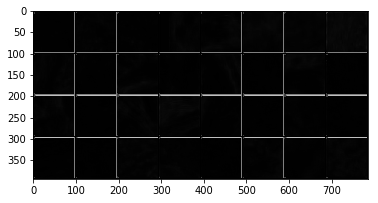

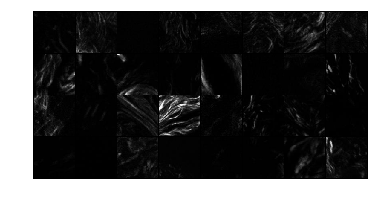

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


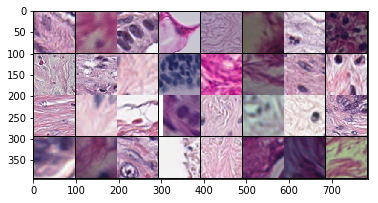

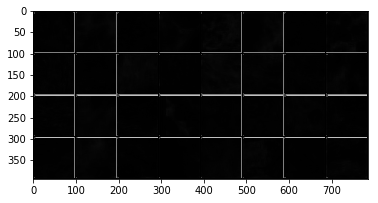

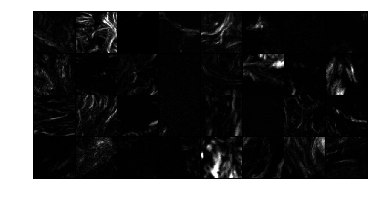

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


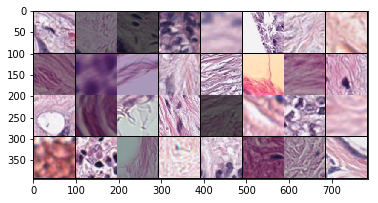

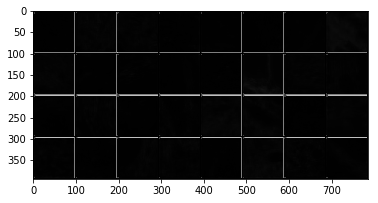

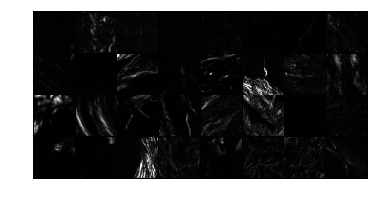

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


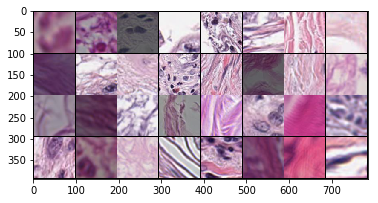

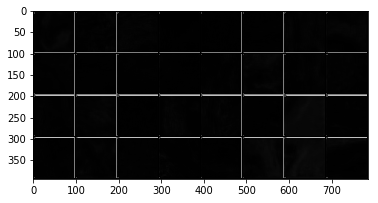

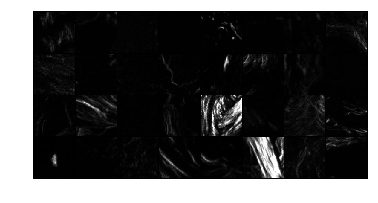

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


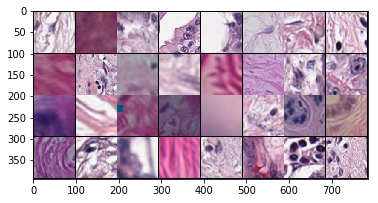

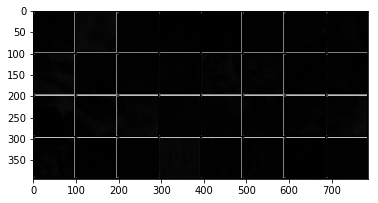

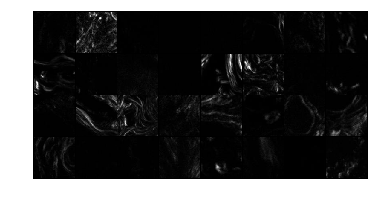

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


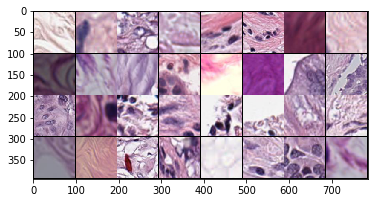

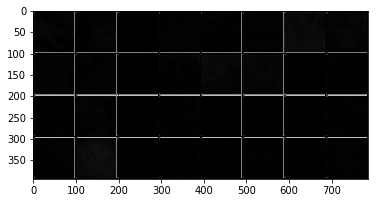

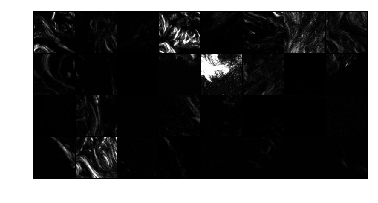

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


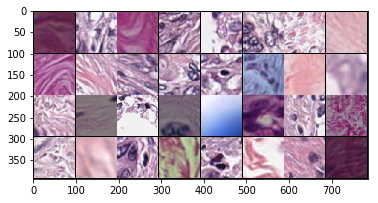

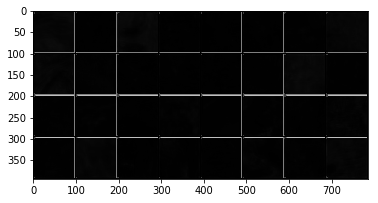

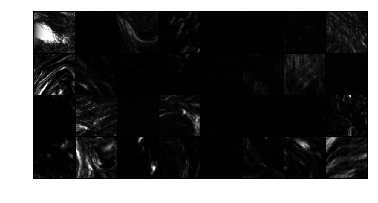

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


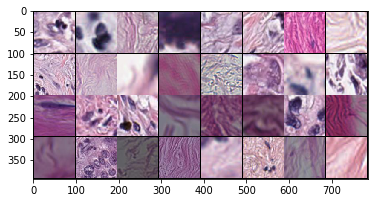

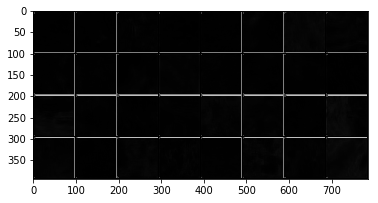

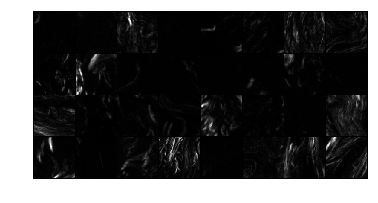

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


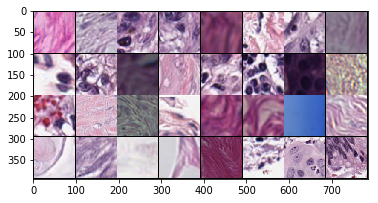

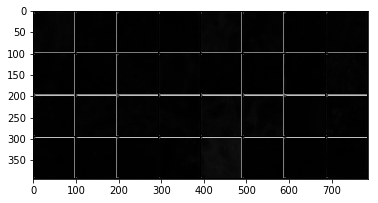

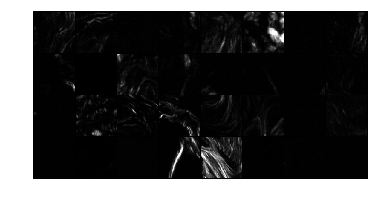

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


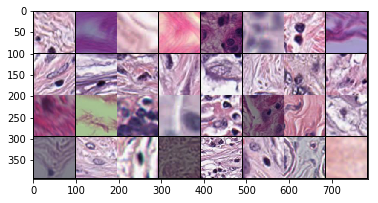

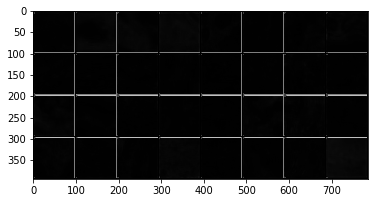

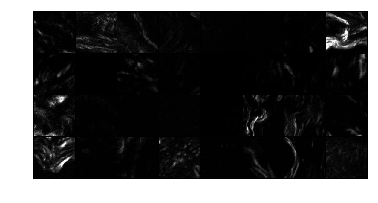

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


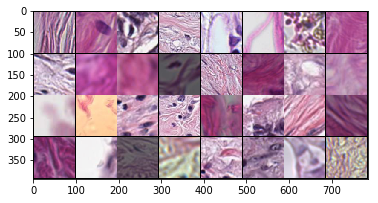

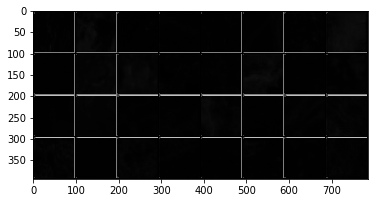

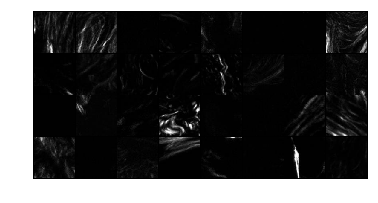

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


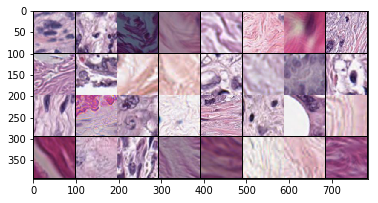

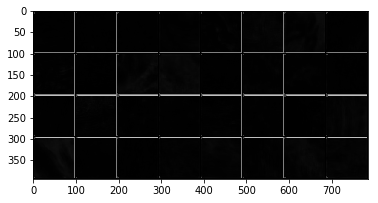

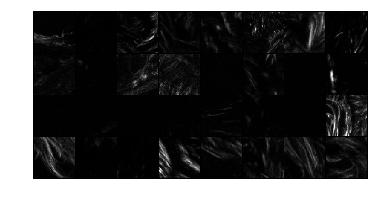

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


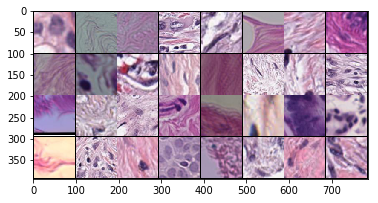

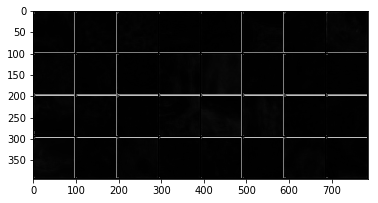

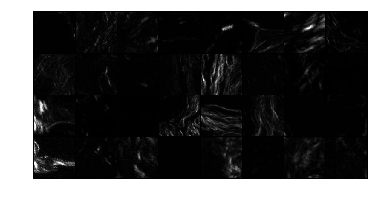

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


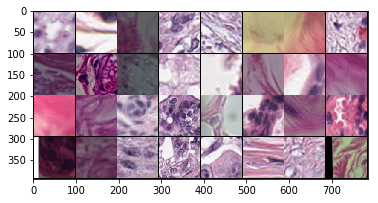

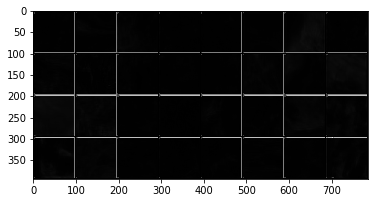

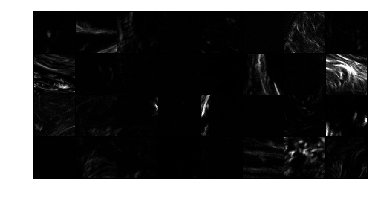

===> Avg. PSNR: nan dB


In [25]:
test()

In [10]:
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [11]:
# restart
for epoch in range(1, 5 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.019913265481591225 lossSSIM: 0.2594919800758362
===> Epoch[1](0/25343): Loss: 0.1996
lossMSE: 0.022007493302226067 lossSSIM: 0.3356238007545471
===> Epoch[1](50/25343): Loss: 0.2572
lossMSE: 0.023773454129695892 lossSSIM: 0.281873881816864
===> Epoch[1](100/25343): Loss: 0.2173
lossMSE: 0.018449855968356133 lossSSIM: 0.30438232421875
===> Epoch[1](150/25343): Loss: 0.2329
lossMSE: 0.01957864873111248 lossSSIM: 0.2799588441848755
===> Epoch[1](200/25343): Loss: 0.2149
lossMSE: 0.018327942118048668 lossSSIM: 0.2819406986236572
===> Epoch[1](250/25343): Loss: 0.2160
lossMSE: 0.022603563964366913 lossSSIM: 0.2953016757965088
===> Epoch[1](300/25343): Loss: 0.2271
lossMSE: 0.022102627903223038 lossSSIM: 0.27602773904800415
===> Epoch[1](350/25343): Loss: 0.2125
lossMSE: 0.024097124114632607 lossSSIM: 0.3189759850502014
===> Epoch[1](400/25343): Loss: 0.2453
lossMSE: 0.021922804415225983 lossSSIM: 0.27214497327804565
===> Epoch[1](450/25343): Loss: 0.2096
lossMSE: 0.02331906929612

lossMSE: 0.0210416316986084 lossSSIM: 0.3372621536254883
===> Epoch[1](4150/25343): Loss: 0.2582
lossMSE: 0.01950400322675705 lossSSIM: 0.3030344843864441
===> Epoch[1](4200/25343): Loss: 0.2322
lossMSE: 0.020205356180667877 lossSSIM: 0.26709550619125366
===> Epoch[1](4250/25343): Loss: 0.2054
lossMSE: 0.019020535051822662 lossSSIM: 0.24213957786560059
===> Epoch[1](4300/25343): Loss: 0.1864
lossMSE: 0.02344992384314537 lossSSIM: 0.3406967520713806
===> Epoch[1](4350/25343): Loss: 0.2614
lossMSE: 0.01730542629957199 lossSSIM: 0.27526193857192993
===> Epoch[1](4400/25343): Loss: 0.2108
lossMSE: 0.01814928837120533 lossSSIM: 0.26835697889328003
===> Epoch[1](4450/25343): Loss: 0.2058
lossMSE: 0.026949230581521988 lossSSIM: 0.35033607482910156
===> Epoch[1](4500/25343): Loss: 0.2695
lossMSE: 0.028714967891573906 lossSSIM: 0.3873043656349182
===> Epoch[1](4550/25343): Loss: 0.2977
lossMSE: 0.02306114323437214 lossSSIM: 0.2892981171607971
===> Epoch[1](4600/25343): Loss: 0.2227
lossMSE: 0.0

lossMSE: 0.022350260987877846 lossSSIM: 0.33031177520751953
===> Epoch[1](8300/25343): Loss: 0.2533
lossMSE: 0.025174152106046677 lossSSIM: 0.25997185707092285
===> Epoch[1](8350/25343): Loss: 0.2013
lossMSE: 0.02550695836544037 lossSSIM: 0.33434903621673584
===> Epoch[1](8400/25343): Loss: 0.2571
lossMSE: 0.022521832957863808 lossSSIM: 0.3447178602218628
===> Epoch[1](8450/25343): Loss: 0.2642
lossMSE: 0.021339386701583862 lossSSIM: 0.2868611812591553
===> Epoch[1](8500/25343): Loss: 0.2205
lossMSE: 0.021064184606075287 lossSSIM: 0.3261330723762512
===> Epoch[1](8550/25343): Loss: 0.2499
lossMSE: 0.018116962164640427 lossSSIM: 0.24760395288467407
===> Epoch[1](8600/25343): Loss: 0.1902
lossMSE: 0.019244495779275894 lossSSIM: 0.32735586166381836
===> Epoch[1](8650/25343): Loss: 0.2503
lossMSE: 0.026032522320747375 lossSSIM: 0.2909386157989502
===> Epoch[1](8700/25343): Loss: 0.2247
lossMSE: 0.026958100497722626 lossSSIM: 0.3818133473396301
===> Epoch[1](8750/25343): Loss: 0.2931
lossMS

lossMSE: 0.020281128585338593 lossSSIM: 0.3193751573562622
===> Epoch[1](12450/25343): Loss: 0.2446
lossMSE: 0.025951402261853218 lossSSIM: 0.3548848628997803
===> Epoch[1](12500/25343): Loss: 0.2727
lossMSE: 0.026637772098183632 lossSSIM: 0.3554859757423401
===> Epoch[1](12550/25343): Loss: 0.2733
lossMSE: 0.023476287722587585 lossSSIM: 0.36641162633895874
===> Epoch[1](12600/25343): Loss: 0.2807
lossMSE: 0.019176581874489784 lossSSIM: 0.33264297246932983
===> Epoch[1](12650/25343): Loss: 0.2543
lossMSE: 0.022242549806833267 lossSSIM: 0.33678507804870605
===> Epoch[1](12700/25343): Loss: 0.2581
lossMSE: 0.019060621038079262 lossSSIM: 0.2588672637939453
===> Epoch[1](12750/25343): Loss: 0.1989
lossMSE: 0.033287741243839264 lossSSIM: 0.3963947296142578
===> Epoch[1](12800/25343): Loss: 0.3056
lossMSE: 0.02123422734439373 lossSSIM: 0.2436990737915039
===> Epoch[1](12850/25343): Loss: 0.1881
lossMSE: 0.026048021391034126 lossSSIM: 0.33928507566452026
===> Epoch[1](12900/25343): Loss: 0.26

lossMSE: 0.017977694049477577 lossSSIM: 0.2172207236289978
===> Epoch[1](16550/25343): Loss: 0.1674
lossMSE: 0.02191002480685711 lossSSIM: 0.3296220898628235
===> Epoch[1](16600/25343): Loss: 0.2527
lossMSE: 0.021988924592733383 lossSSIM: 0.32270359992980957
===> Epoch[1](16650/25343): Loss: 0.2475
lossMSE: 0.01715139113366604 lossSSIM: 0.2887430191040039
===> Epoch[1](16700/25343): Loss: 0.2208
lossMSE: 0.02068514935672283 lossSSIM: 0.298997700214386
===> Epoch[1](16750/25343): Loss: 0.2294
lossMSE: 0.019536729902029037 lossSSIM: 0.23890703916549683
===> Epoch[1](16800/25343): Loss: 0.1841
lossMSE: 0.039935436099767685 lossSSIM: 0.36018359661102295
===> Epoch[1](16850/25343): Loss: 0.2801
lossMSE: 0.023372549563646317 lossSSIM: 0.3380390405654907
===> Epoch[1](16900/25343): Loss: 0.2594
lossMSE: 0.024019844830036163 lossSSIM: 0.3186320662498474
===> Epoch[1](16950/25343): Loss: 0.2450
lossMSE: 0.021324466913938522 lossSSIM: 0.31030982732772827
===> Epoch[1](17000/25343): Loss: 0.2381


lossMSE: 0.017257705330848694 lossSSIM: 0.2542024850845337
===> Epoch[1](20650/25343): Loss: 0.1950
lossMSE: 0.022814802825450897 lossSSIM: 0.2988705635070801
===> Epoch[1](20700/25343): Loss: 0.2299
lossMSE: 0.022337324917316437 lossSSIM: 0.35408228635787964
===> Epoch[1](20750/25343): Loss: 0.2711
lossMSE: 0.018737737089395523 lossSSIM: 0.2747843265533447
===> Epoch[1](20800/25343): Loss: 0.2108
lossMSE: 0.01889728754758835 lossSSIM: 0.24900877475738525
===> Epoch[1](20850/25343): Loss: 0.1915
lossMSE: 0.02094864659011364 lossSSIM: 0.30934178829193115
===> Epoch[1](20900/25343): Loss: 0.2372
lossMSE: 0.019702332094311714 lossSSIM: 0.33069467544555664
===> Epoch[1](20950/25343): Loss: 0.2529
lossMSE: 0.021720150485634804 lossSSIM: 0.29041242599487305
===> Epoch[1](21000/25343): Loss: 0.2232
lossMSE: 0.022235214710235596 lossSSIM: 0.30588585138320923
===> Epoch[1](21050/25343): Loss: 0.2350
lossMSE: 0.019370589405298233 lossSSIM: 0.29644423723220825
===> Epoch[1](21100/25343): Loss: 0.

lossMSE: 0.022138036787509918 lossSSIM: 0.3001708984375
===> Epoch[1](24750/25343): Loss: 0.2307
lossMSE: 0.02235446311533451 lossSSIM: 0.31738269329071045
===> Epoch[1](24800/25343): Loss: 0.2436
lossMSE: 0.022167395800352097 lossSSIM: 0.35138756036758423
===> Epoch[1](24850/25343): Loss: 0.2691
lossMSE: 0.023731492459774017 lossSSIM: 0.3208343982696533
===> Epoch[1](24900/25343): Loss: 0.2466
lossMSE: 0.022115524858236313 lossSSIM: 0.2793368697166443
===> Epoch[1](24950/25343): Loss: 0.2150
lossMSE: 0.020496832206845284 lossSSIM: 0.2840423583984375
===> Epoch[1](25000/25343): Loss: 0.2182
lossMSE: 0.02212759107351303 lossSSIM: 0.30602383613586426
===> Epoch[1](25050/25343): Loss: 0.2350
lossMSE: 0.01947225071489811 lossSSIM: 0.30790871381759644
===> Epoch[1](25100/25343): Loss: 0.2358
lossMSE: 0.017379410564899445 lossSSIM: 0.2501024603843689
===> Epoch[1](25150/25343): Loss: 0.1919
lossMSE: 0.024171598255634308 lossSSIM: 0.32894378900527954
===> Epoch[1](25200/25343): Loss: 0.2528
l

lossMSE: 0.021018419414758682 lossSSIM: 0.32611656188964844
===> Epoch[2](3550/25343): Loss: 0.2498
lossMSE: 0.02316221594810486 lossSSIM: 0.39488643407821655
===> Epoch[2](3600/25343): Loss: 0.3020
lossMSE: 0.017261572182178497 lossSSIM: 0.2891722321510315
===> Epoch[2](3650/25343): Loss: 0.2212
lossMSE: 0.026892317458987236 lossSSIM: 0.30362826585769653
===> Epoch[2](3700/25343): Loss: 0.2344
lossMSE: 0.025372542440891266 lossSSIM: 0.30003517866134644
===> Epoch[2](3750/25343): Loss: 0.2314
lossMSE: 0.02447502315044403 lossSSIM: 0.32881277799606323
===> Epoch[2](3800/25343): Loss: 0.2527
lossMSE: 0.026929659768939018 lossSSIM: 0.3501112461090088
===> Epoch[2](3850/25343): Loss: 0.2693
lossMSE: 0.02109374664723873 lossSSIM: 0.28347867727279663
===> Epoch[2](3900/25343): Loss: 0.2179
lossMSE: 0.020832156762480736 lossSSIM: 0.3224750757217407
===> Epoch[2](3950/25343): Loss: 0.2471
lossMSE: 0.02312854304909706 lossSSIM: 0.31041020154953003
===> Epoch[2](4000/25343): Loss: 0.2386
lossMSE

lossMSE: 0.023946885019540787 lossSSIM: 0.33855557441711426
===> Epoch[2](7700/25343): Loss: 0.2599
lossMSE: 0.019092030823230743 lossSSIM: 0.2612679600715637
===> Epoch[2](7750/25343): Loss: 0.2007
lossMSE: 0.019590608775615692 lossSSIM: 0.2547837495803833
===> Epoch[2](7800/25343): Loss: 0.1960
lossMSE: 0.022039957344532013 lossSSIM: 0.3131360411643982
===> Epoch[2](7850/25343): Loss: 0.2404
lossMSE: 0.019039787352085114 lossSSIM: 0.2707928419113159
===> Epoch[2](7900/25343): Loss: 0.2079
lossMSE: 0.019300200045108795 lossSSIM: 0.293515145778656
===> Epoch[2](7950/25343): Loss: 0.2250
lossMSE: 0.02405136451125145 lossSSIM: 0.33031338453292847
===> Epoch[2](8000/25343): Loss: 0.2537
lossMSE: 0.017227765172719955 lossSSIM: 0.2595856189727783
===> Epoch[2](8050/25343): Loss: 0.1990
lossMSE: 0.02633713185787201 lossSSIM: 0.36665409803390503
===> Epoch[2](8100/25343): Loss: 0.2816
lossMSE: 0.02016032487154007 lossSSIM: 0.3173031806945801
===> Epoch[2](8150/25343): Loss: 0.2430
lossMSE: 0.

lossMSE: 0.021151645109057426 lossSSIM: 0.34432947635650635
===> Epoch[2](11850/25343): Loss: 0.2635
lossMSE: 0.01906881481409073 lossSSIM: 0.28219306468963623
===> Epoch[2](11900/25343): Loss: 0.2164
lossMSE: 0.020843764767050743 lossSSIM: 0.30921709537506104
===> Epoch[2](11950/25343): Loss: 0.2371
lossMSE: 0.020166387781500816 lossSSIM: 0.36408543586730957
===> Epoch[2](12000/25343): Loss: 0.2781
lossMSE: 0.02503063902258873 lossSSIM: 0.34144026041030884
===> Epoch[2](12050/25343): Loss: 0.2623
lossMSE: 0.02734609693288803 lossSSIM: 0.350275456905365
===> Epoch[2](12100/25343): Loss: 0.2695
lossMSE: 0.02053690329194069 lossSSIM: 0.30479609966278076
===> Epoch[2](12150/25343): Loss: 0.2337
lossMSE: 0.02272695116698742 lossSSIM: 0.3032491207122803
===> Epoch[2](12200/25343): Loss: 0.2331
lossMSE: 0.020904388278722763 lossSSIM: 0.31826072931289673
===> Epoch[2](12250/25343): Loss: 0.2439
lossMSE: 0.023358507081866264 lossSSIM: 0.3400651216506958
===> Epoch[2](12300/25343): Loss: 0.2609

lossMSE: 0.025680702179670334 lossSSIM: 0.3096807599067688
===> Epoch[2](15950/25343): Loss: 0.2387
lossMSE: 0.02559691295027733 lossSSIM: 0.28195667266845703
===> Epoch[2](16000/25343): Loss: 0.2179
lossMSE: 0.019662324339151382 lossSSIM: 0.3119267225265503
===> Epoch[2](16050/25343): Loss: 0.2389
lossMSE: 0.020449599251151085 lossSSIM: 0.29808157682418823
===> Epoch[2](16100/25343): Loss: 0.2287
lossMSE: 0.029741929844021797 lossSSIM: 0.3253810405731201
===> Epoch[2](16150/25343): Loss: 0.2515
lossMSE: 0.018359795212745667 lossSSIM: 0.30537980794906616
===> Epoch[2](16200/25343): Loss: 0.2336
lossMSE: 0.025346647948026657 lossSSIM: 0.33007317781448364
===> Epoch[2](16250/25343): Loss: 0.2539
lossMSE: 0.01882772706449032 lossSSIM: 0.2848060727119446
===> Epoch[2](16300/25343): Loss: 0.2183
lossMSE: 0.022847244516015053 lossSSIM: 0.29536449909210205
===> Epoch[2](16350/25343): Loss: 0.2272
lossMSE: 0.020656131207942963 lossSSIM: 0.32459574937820435
===> Epoch[2](16400/25343): Loss: 0.2

lossMSE: 0.018637727946043015 lossSSIM: 0.3355068564414978
===> Epoch[2](20050/25343): Loss: 0.2563
lossMSE: 0.019353561103343964 lossSSIM: 0.27096325159072876
===> Epoch[2](20100/25343): Loss: 0.2081
lossMSE: 0.01912098377943039 lossSSIM: 0.35065191984176636
===> Epoch[2](20150/25343): Loss: 0.2678
lossMSE: 0.02211565524339676 lossSSIM: 0.29784882068634033
===> Epoch[2](20200/25343): Loss: 0.2289
lossMSE: 0.01827516220510006 lossSSIM: 0.2565126419067383
===> Epoch[2](20250/25343): Loss: 0.1970
lossMSE: 0.020852509886026382 lossSSIM: 0.3051435351371765
===> Epoch[2](20300/25343): Loss: 0.2341
lossMSE: 0.020520716905593872 lossSSIM: 0.2954481840133667
===> Epoch[2](20350/25343): Loss: 0.2267
lossMSE: 0.020689204335212708 lossSSIM: 0.31930917501449585
===> Epoch[2](20400/25343): Loss: 0.2447
lossMSE: 0.022249748930335045 lossSSIM: 0.33004987239837646
===> Epoch[2](20450/25343): Loss: 0.2531
lossMSE: 0.021388739347457886 lossSSIM: 0.30257660150527954
===> Epoch[2](20500/25343): Loss: 0.23

lossMSE: 0.025268081575632095 lossSSIM: 0.2829689383506775
===> Epoch[2](24150/25343): Loss: 0.2185
lossMSE: 0.02073301188647747 lossSSIM: 0.32280874252319336
===> Epoch[2](24200/25343): Loss: 0.2473
lossMSE: 0.03461867570877075 lossSSIM: 0.3311079144477844
===> Epoch[2](24250/25343): Loss: 0.2570
lossMSE: 0.01827145367860794 lossSSIM: 0.30125004053115845
===> Epoch[2](24300/25343): Loss: 0.2305
lossMSE: 0.022968338802456856 lossSSIM: 0.3543474078178406
===> Epoch[2](24350/25343): Loss: 0.2715
lossMSE: 0.01944304257631302 lossSSIM: 0.2789287567138672
===> Epoch[2](24400/25343): Loss: 0.2141
lossMSE: 0.020039208233356476 lossSSIM: 0.3274138569831848
===> Epoch[2](24450/25343): Loss: 0.2506
lossMSE: 0.024157067760825157 lossSSIM: 0.35744237899780273
===> Epoch[2](24500/25343): Loss: 0.2741
lossMSE: 0.021418510004878044 lossSSIM: 0.31297534704208374
===> Epoch[2](24550/25343): Loss: 0.2401
lossMSE: 0.023044615983963013 lossSSIM: 0.32227104902267456
===> Epoch[2](24600/25343): Loss: 0.2475

lossMSE: 0.02063833735883236 lossSSIM: 0.2781146168708801
===> Epoch[3](2950/25343): Loss: 0.2137
lossMSE: 0.020339110866189003 lossSSIM: 0.3118221163749695
===> Epoch[3](3000/25343): Loss: 0.2390
lossMSE: 0.023259468376636505 lossSSIM: 0.3021286129951477
===> Epoch[3](3050/25343): Loss: 0.2324
lossMSE: 0.01830301620066166 lossSSIM: 0.2744554281234741
===> Epoch[3](3100/25343): Loss: 0.2104
lossMSE: 0.020117389038205147 lossSSIM: 0.23233342170715332
===> Epoch[3](3150/25343): Loss: 0.1793
lossMSE: 0.02110065333545208 lossSSIM: 0.30160951614379883
===> Epoch[3](3200/25343): Loss: 0.2315
lossMSE: 0.017908237874507904 lossSSIM: 0.2908627390861511
===> Epoch[3](3250/25343): Loss: 0.2226
lossMSE: 0.017494363710284233 lossSSIM: 0.210618257522583
===> Epoch[3](3300/25343): Loss: 0.1623
lossMSE: 0.022330474108457565 lossSSIM: 0.284348726272583
===> Epoch[3](3350/25343): Loss: 0.2188
lossMSE: 0.02086261473596096 lossSSIM: 0.2811782956123352
===> Epoch[3](3400/25343): Loss: 0.2161
lossMSE: 0.023

lossMSE: 0.03187035769224167 lossSSIM: 0.37175649404525757
===> Epoch[3](7100/25343): Loss: 0.2868
lossMSE: 0.021175066009163857 lossSSIM: 0.30412912368774414
===> Epoch[3](7150/25343): Loss: 0.2334
lossMSE: 0.026558442041277885 lossSSIM: 0.3411702513694763
===> Epoch[3](7200/25343): Loss: 0.2625
lossMSE: 0.023392459377646446 lossSSIM: 0.28550970554351807
===> Epoch[3](7250/25343): Loss: 0.2200
lossMSE: 0.020764635875821114 lossSSIM: 0.34003013372421265
===> Epoch[3](7300/25343): Loss: 0.2602
lossMSE: 0.021604279056191444 lossSSIM: 0.29440218210220337
===> Epoch[3](7350/25343): Loss: 0.2262
lossMSE: 0.020027194172143936 lossSSIM: 0.33867645263671875
===> Epoch[3](7400/25343): Loss: 0.2590
lossMSE: 0.02105898968875408 lossSSIM: 0.32704901695251465
===> Epoch[3](7450/25343): Loss: 0.2506
lossMSE: 0.02133513242006302 lossSSIM: 0.3331591486930847
===> Epoch[3](7500/25343): Loss: 0.2552
lossMSE: 0.021547827869653702 lossSSIM: 0.37276577949523926
===> Epoch[3](7550/25343): Loss: 0.2850
lossM

lossMSE: 0.020808033645153046 lossSSIM: 0.2888660430908203
===> Epoch[3](11250/25343): Loss: 0.2219
lossMSE: 0.02037111110985279 lossSSIM: 0.3198891282081604
===> Epoch[3](11300/25343): Loss: 0.2450
lossMSE: 0.01872299425303936 lossSSIM: 0.28103339672088623
===> Epoch[3](11350/25343): Loss: 0.2155
lossMSE: 0.0205400250852108 lossSSIM: 0.2424197793006897
===> Epoch[3](11400/25343): Loss: 0.1869
lossMSE: 0.0224225465208292 lossSSIM: 0.35247212648391724
===> Epoch[3](11450/25343): Loss: 0.2700
lossMSE: 0.022525636479258537 lossSSIM: 0.3169901371002197
===> Epoch[3](11500/25343): Loss: 0.2434
lossMSE: 0.018106894567608833 lossSSIM: 0.2934415936470032
===> Epoch[3](11550/25343): Loss: 0.2246
lossMSE: 0.018642203882336617 lossSSIM: 0.25704270601272583
===> Epoch[3](11600/25343): Loss: 0.1974
lossMSE: 0.019006552174687386 lossSSIM: 0.2838348150253296
===> Epoch[3](11650/25343): Loss: 0.2176
lossMSE: 0.020146165043115616 lossSSIM: 0.32106417417526245
===> Epoch[3](11700/25343): Loss: 0.2458
lo

KeyboardInterrupt: 

In [24]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)
# batchsize 32->16
dataloader = DataLoader(transformed_dataset, batch_size=32,
                        shuffle=True, num_workers=0)

In [13]:
# restart
for epoch in range(1, 10 + 1):
    train(epoch)
#     test()
#     checkpoint(epoch)

lossMSE: 0.02264426089823246 lossSSIM: 0.2966316342353821
===> Epoch[1](0/5069): Loss: 0.2281
lossMSE: 0.02484295703470707 lossSSIM: 0.32764649391174316
===> Epoch[1](50/5069): Loss: 0.2519
lossMSE: 0.021358365193009377 lossSSIM: 0.31380951404571533
===> Epoch[1](100/5069): Loss: 0.2407
lossMSE: 0.02138429321348667 lossSSIM: 0.31657499074935913
===> Epoch[1](150/5069): Loss: 0.2428
lossMSE: 0.020913269370794296 lossSSIM: 0.2972341775894165
===> Epoch[1](200/5069): Loss: 0.2282
lossMSE: 0.02276192232966423 lossSSIM: 0.2861550450325012
===> Epoch[1](250/5069): Loss: 0.2203
lossMSE: 0.0237626601010561 lossSSIM: 0.3072226643562317
===> Epoch[1](300/5069): Loss: 0.2364
lossMSE: 0.020913345739245415 lossSSIM: 0.3049249053001404
===> Epoch[1](350/5069): Loss: 0.2339
lossMSE: 0.02169893868267536 lossSSIM: 0.32318198680877686
===> Epoch[1](400/5069): Loss: 0.2478
lossMSE: 0.01995171420276165 lossSSIM: 0.310130774974823
===> Epoch[1](450/5069): Loss: 0.2376
lossMSE: 0.025408633053302765 lossSSIM

lossMSE: 0.02149963192641735 lossSSIM: 0.3011101484298706
===> Epoch[1](4200/5069): Loss: 0.2312
lossMSE: 0.024165742099285126 lossSSIM: 0.3209918737411499
===> Epoch[1](4250/5069): Loss: 0.2468
lossMSE: 0.020459381863474846 lossSSIM: 0.2755383849143982
===> Epoch[1](4300/5069): Loss: 0.2118
lossMSE: 0.019819192588329315 lossSSIM: 0.2796440124511719
===> Epoch[1](4350/5069): Loss: 0.2147
lossMSE: 0.02040921524167061 lossSSIM: 0.28498655557632446
===> Epoch[1](4400/5069): Loss: 0.2188
lossMSE: 0.022418491542339325 lossSSIM: 0.3342626094818115
===> Epoch[1](4450/5069): Loss: 0.2563
lossMSE: 0.021059224382042885 lossSSIM: 0.28829818964004517
===> Epoch[1](4500/5069): Loss: 0.2215
lossMSE: 0.0218842513859272 lossSSIM: 0.29953867197036743
===> Epoch[1](4550/5069): Loss: 0.2301
lossMSE: 0.024913091212511063 lossSSIM: 0.3259252905845642
===> Epoch[1](4600/5069): Loss: 0.2507
lossMSE: 0.024751834571361542 lossSSIM: 0.3398229479789734
===> Epoch[1](4650/5069): Loss: 0.2611
lossMSE: 0.0200928524

lossMSE: 0.014847359620034695 lossSSIM: 0.2959749102592468
===> Epoch[2](3300/5069): Loss: 0.2257
lossMSE: 0.016950851306319237 lossSSIM: 0.2870836853981018
===> Epoch[2](3350/5069): Loss: 0.2196
lossMSE: 0.015926111489534378 lossSSIM: 0.3044986128807068
===> Epoch[2](3400/5069): Loss: 0.2324
lossMSE: 0.018814679235219955 lossSSIM: 0.2876640558242798
===> Epoch[2](3450/5069): Loss: 0.2205
lossMSE: 0.017295245081186295 lossSSIM: 0.28250330686569214
===> Epoch[2](3500/5069): Loss: 0.2162
lossMSE: 0.015538880601525307 lossSSIM: 0.2874336242675781
===> Epoch[2](3550/5069): Loss: 0.2195
lossMSE: 0.015985416248440742 lossSSIM: 0.2820388674736023
===> Epoch[2](3600/5069): Loss: 0.2155
lossMSE: 0.01870972290635109 lossSSIM: 0.2810211181640625
===> Epoch[2](3650/5069): Loss: 0.2154
lossMSE: 0.01665143109858036 lossSSIM: 0.31914186477661133
===> Epoch[2](3700/5069): Loss: 0.2435
lossMSE: 0.01864585094153881 lossSSIM: 0.30977118015289307
===> Epoch[2](3750/5069): Loss: 0.2370
lossMSE: 0.018399447

lossMSE: 0.016963493078947067 lossSSIM: 0.29921358823776245
===> Epoch[3](2400/5069): Loss: 0.2287
lossMSE: 0.01684388518333435 lossSSIM: 0.3037034273147583
===> Epoch[3](2450/5069): Loss: 0.2320
lossMSE: 0.013749198988080025 lossSSIM: 0.2965606451034546
===> Epoch[3](2500/5069): Loss: 0.2259
lossMSE: 0.015445664525032043 lossSSIM: 0.3088091015815735
===> Epoch[3](2550/5069): Loss: 0.2355
lossMSE: 0.014862699434161186 lossSSIM: 0.3062360882759094
===> Epoch[3](2600/5069): Loss: 0.2334
lossMSE: 0.015422373078763485 lossSSIM: 0.2776029109954834
===> Epoch[3](2650/5069): Loss: 0.2121
lossMSE: 0.015968644991517067 lossSSIM: 0.29578864574432373
===> Epoch[3](2700/5069): Loss: 0.2258
lossMSE: 0.019258826971054077 lossSSIM: 0.29301345348358154
===> Epoch[3](2750/5069): Loss: 0.2246
lossMSE: 0.02000097557902336 lossSSIM: 0.3146071434020996
===> Epoch[3](2800/5069): Loss: 0.2410
lossMSE: 0.014992753975093365 lossSSIM: 0.2950071692466736
===> Epoch[3](2850/5069): Loss: 0.2250
lossMSE: 0.01920775

lossMSE: 0.017374394461512566 lossSSIM: 0.2977667450904846
===> Epoch[4](1500/5069): Loss: 0.2277
lossMSE: 0.015261241234838963 lossSSIM: 0.2838486433029175
===> Epoch[4](1550/5069): Loss: 0.2167
lossMSE: 0.016380924731492996 lossSSIM: 0.2780706286430359
===> Epoch[4](1600/5069): Loss: 0.2126
lossMSE: 0.016845254227519035 lossSSIM: 0.30178630352020264
===> Epoch[4](1650/5069): Loss: 0.2306
lossMSE: 0.014282182790338993 lossSSIM: 0.2599838972091675
===> Epoch[4](1700/5069): Loss: 0.1986
lossMSE: 0.01637602224946022 lossSSIM: 0.2901877164840698
===> Epoch[4](1750/5069): Loss: 0.2217
lossMSE: 0.016741804778575897 lossSSIM: 0.3028692603111267
===> Epoch[4](1800/5069): Loss: 0.2313
lossMSE: 0.018253691494464874 lossSSIM: 0.3092721104621887
===> Epoch[4](1850/5069): Loss: 0.2365
lossMSE: 0.014470844529569149 lossSSIM: 0.2801627516746521
===> Epoch[4](1900/5069): Loss: 0.2137
lossMSE: 0.015831302851438522 lossSSIM: 0.2808563709259033
===> Epoch[4](1950/5069): Loss: 0.2146
lossMSE: 0.017094902

lossMSE: 0.01354745402932167 lossSSIM: 0.27519816160202026
===> Epoch[5](600/5069): Loss: 0.2098
lossMSE: 0.017391450703144073 lossSSIM: 0.304820716381073
===> Epoch[5](650/5069): Loss: 0.2330
lossMSE: 0.01859845593571663 lossSSIM: 0.3221612572669983
===> Epoch[5](700/5069): Loss: 0.2463
lossMSE: 0.016815632581710815 lossSSIM: 0.2883761525154114
===> Epoch[5](750/5069): Loss: 0.2205
lossMSE: 0.018110241740942 lossSSIM: 0.2904840111732483
===> Epoch[5](800/5069): Loss: 0.2224
lossMSE: 0.01647152565419674 lossSSIM: 0.3020286560058594
===> Epoch[5](850/5069): Loss: 0.2306
lossMSE: 0.015728309750556946 lossSSIM: 0.29334282875061035
===> Epoch[5](900/5069): Loss: 0.2239
lossMSE: 0.01702994480729103 lossSSIM: 0.2932940721511841
===> Epoch[5](950/5069): Loss: 0.2242
lossMSE: 0.015105128288269043 lossSSIM: 0.2955467700958252
===> Epoch[5](1000/5069): Loss: 0.2254
lossMSE: 0.01792098581790924 lossSSIM: 0.2905007600784302
===> Epoch[5](1050/5069): Loss: 0.2224
lossMSE: 0.018329953774809837 lossS

lossMSE: 0.01673077791929245 lossSSIM: 0.29811573028564453
===> Epoch[5](4800/5069): Loss: 0.2278
lossMSE: 0.016493627801537514 lossSSIM: 0.2755938768386841
===> Epoch[5](4850/5069): Loss: 0.2108
lossMSE: 0.015696613118052483 lossSSIM: 0.2736086845397949
===> Epoch[5](4900/5069): Loss: 0.2091
lossMSE: 0.016477512195706367 lossSSIM: 0.3024817109107971
===> Epoch[5](4950/5069): Loss: 0.2310
lossMSE: 0.0151941804215312 lossSSIM: 0.27943241596221924
===> Epoch[5](5000/5069): Loss: 0.2134
lossMSE: 0.01547680702060461 lossSSIM: 0.27612924575805664
===> Epoch[5](5050/5069): Loss: 0.2110
===> Epoch 5 Complete: Avg. Loss: 0.2265
lossMSE: 0.0172532107681036 lossSSIM: 0.28699791431427
===> Epoch[6](0/5069): Loss: 0.2196
lossMSE: 0.01706586219370365 lossSSIM: 0.28476065397262573
===> Epoch[6](50/5069): Loss: 0.2178
lossMSE: 0.018779803067445755 lossSSIM: 0.30583858489990234
===> Epoch[6](100/5069): Loss: 0.2341
lossMSE: 0.020932549610733986 lossSSIM: 0.327401340007782
===> Epoch[6](150/5069): Loss

lossMSE: 0.017029086127877235 lossSSIM: 0.27944982051849365
===> Epoch[6](3900/5069): Loss: 0.2138
lossMSE: 0.018288230523467064 lossSSIM: 0.29371416568756104
===> Epoch[6](3950/5069): Loss: 0.2249
lossMSE: 0.01780582033097744 lossSSIM: 0.3249469995498657
===> Epoch[6](4000/5069): Loss: 0.2482
lossMSE: 0.014358768239617348 lossSSIM: 0.26552021503448486
===> Epoch[6](4050/5069): Loss: 0.2027
lossMSE: 0.015903273597359657 lossSSIM: 0.273701548576355
===> Epoch[6](4100/5069): Loss: 0.2093
lossMSE: 0.019482087343931198 lossSSIM: 0.3279443383216858
===> Epoch[6](4150/5069): Loss: 0.2508
lossMSE: 0.017399422824382782 lossSSIM: 0.2988622188568115
===> Epoch[6](4200/5069): Loss: 0.2285
lossMSE: 0.013416275382041931 lossSSIM: 0.262977659702301
===> Epoch[6](4250/5069): Loss: 0.2006
lossMSE: 0.018384790048003197 lossSSIM: 0.29122549295425415
===> Epoch[6](4300/5069): Loss: 0.2230
lossMSE: 0.013504330068826675 lossSSIM: 0.27167588472366333
===> Epoch[6](4350/5069): Loss: 0.2071
lossMSE: 0.0177772

lossMSE: 0.01565643399953842 lossSSIM: 0.29780954122543335
===> Epoch[7](3000/5069): Loss: 0.2273
lossMSE: 0.017686014994978905 lossSSIM: 0.3032292127609253
===> Epoch[7](3050/5069): Loss: 0.2318
lossMSE: 0.0139665761962533 lossSSIM: 0.28247225284576416
===> Epoch[7](3100/5069): Loss: 0.2153
lossMSE: 0.015535141341388226 lossSSIM: 0.2842806577682495
===> Epoch[7](3150/5069): Loss: 0.2171
lossMSE: 0.01527935266494751 lossSSIM: 0.26519763469696045
===> Epoch[7](3200/5069): Loss: 0.2027
lossMSE: 0.01610526815056801 lossSSIM: 0.3164125084877014
===> Epoch[7](3250/5069): Loss: 0.2413
lossMSE: 0.016067426651716232 lossSSIM: 0.2919355630874634
===> Epoch[7](3300/5069): Loss: 0.2230
lossMSE: 0.01669091172516346 lossSSIM: 0.2676374912261963
===> Epoch[7](3350/5069): Loss: 0.2049
lossMSE: 0.018451042473316193 lossSSIM: 0.3064693212509155
===> Epoch[7](3400/5069): Loss: 0.2345
lossMSE: 0.01494329608976841 lossSSIM: 0.29102569818496704
===> Epoch[7](3450/5069): Loss: 0.2220
lossMSE: 0.016714978963

lossMSE: 0.01754007861018181 lossSSIM: 0.30292779207229614
===> Epoch[8](2100/5069): Loss: 0.2316
lossMSE: 0.020064182579517365 lossSSIM: 0.30112719535827637
===> Epoch[8](2150/5069): Loss: 0.2309
lossMSE: 0.01822791062295437 lossSSIM: 0.282853901386261
===> Epoch[8](2200/5069): Loss: 0.2167
lossMSE: 0.01909005269408226 lossSSIM: 0.29670143127441406
===> Epoch[8](2250/5069): Loss: 0.2273
lossMSE: 0.016660192981362343 lossSSIM: 0.2898607850074768
===> Epoch[8](2300/5069): Loss: 0.2216
lossMSE: 0.019267575815320015 lossSSIM: 0.31060898303985596
===> Epoch[8](2350/5069): Loss: 0.2378
lossMSE: 0.01444089412689209 lossSSIM: 0.2757795453071594
===> Epoch[8](2400/5069): Loss: 0.2104
lossMSE: 0.01857037842273712 lossSSIM: 0.29743462800979614
===> Epoch[8](2450/5069): Loss: 0.2277
lossMSE: 0.017004258930683136 lossSSIM: 0.3300032615661621
===> Epoch[8](2500/5069): Loss: 0.2518
lossMSE: 0.017110394313931465 lossSSIM: 0.3125017285346985
===> Epoch[8](2550/5069): Loss: 0.2387
lossMSE: 0.0182399656

lossMSE: 0.016859829425811768 lossSSIM: 0.2667388916015625
===> Epoch[9](1200/5069): Loss: 0.2043
lossMSE: 0.015420978888869286 lossSSIM: 0.2798927426338196
===> Epoch[9](1250/5069): Loss: 0.2138
lossMSE: 0.017586223781108856 lossSSIM: 0.28162121772766113
===> Epoch[9](1300/5069): Loss: 0.2156
lossMSE: 0.018799975514411926 lossSSIM: 0.29629361629486084
===> Epoch[9](1350/5069): Loss: 0.2269
lossMSE: 0.01809752732515335 lossSSIM: 0.3082736134529114
===> Epoch[9](1400/5069): Loss: 0.2357
lossMSE: 0.01792934536933899 lossSSIM: 0.2978285551071167
===> Epoch[9](1450/5069): Loss: 0.2279
lossMSE: 0.015919510275125504 lossSSIM: 0.30683720111846924
===> Epoch[9](1500/5069): Loss: 0.2341
lossMSE: 0.016236180439591408 lossSSIM: 0.284055233001709
===> Epoch[9](1550/5069): Loss: 0.2171
lossMSE: 0.016954775899648666 lossSSIM: 0.28750181198120117
===> Epoch[9](1600/5069): Loss: 0.2199
lossMSE: 0.01682940311729908 lossSSIM: 0.2796388268470764
===> Epoch[9](1650/5069): Loss: 0.2139
lossMSE: 0.015946354

lossMSE: 0.016708217561244965 lossSSIM: 0.293607234954834
===> Epoch[10](300/5069): Loss: 0.2244
lossMSE: 0.014512027613818645 lossSSIM: 0.31363290548324585
===> Epoch[10](350/5069): Loss: 0.2389
lossMSE: 0.016830971464514732 lossSSIM: 0.30648088455200195
===> Epoch[10](400/5069): Loss: 0.2341
lossMSE: 0.015209285542368889 lossSSIM: 0.31070584058761597
===> Epoch[10](450/5069): Loss: 0.2368
lossMSE: 0.016902565956115723 lossSSIM: 0.2997891902923584
===> Epoch[10](500/5069): Loss: 0.2291
lossMSE: 0.016383765265345573 lossSSIM: 0.29365038871765137
===> Epoch[10](550/5069): Loss: 0.2243
lossMSE: 0.01697063446044922 lossSSIM: 0.3103645443916321
===> Epoch[10](600/5069): Loss: 0.2370
lossMSE: 0.015609895810484886 lossSSIM: 0.28021240234375
===> Epoch[10](650/5069): Loss: 0.2141
lossMSE: 0.015757888555526733 lossSSIM: 0.29483187198638916
===> Epoch[10](700/5069): Loss: 0.2251
lossMSE: 0.017246006056666374 lossSSIM: 0.28581297397613525
===> Epoch[10](750/5069): Loss: 0.2187
lossMSE: 0.0158726

lossMSE: 0.01709361933171749 lossSSIM: 0.2901418209075928
===> Epoch[10](4450/5069): Loss: 0.2219
lossMSE: 0.017775598913431168 lossSSIM: 0.3151390552520752
===> Epoch[10](4500/5069): Loss: 0.2408
lossMSE: 0.015459933318197727 lossSSIM: 0.2857997417449951
===> Epoch[10](4550/5069): Loss: 0.2182
lossMSE: 0.01598164811730385 lossSSIM: 0.27202385663986206
===> Epoch[10](4600/5069): Loss: 0.2080
lossMSE: 0.01595255732536316 lossSSIM: 0.32127827405929565
===> Epoch[10](4650/5069): Loss: 0.2449
lossMSE: 0.017412742599844933 lossSSIM: 0.2962772846221924
===> Epoch[10](4700/5069): Loss: 0.2266
lossMSE: 0.01673036813735962 lossSSIM: 0.29073387384414673
===> Epoch[10](4750/5069): Loss: 0.2222
lossMSE: 0.014828327111899853 lossSSIM: 0.2728044390678406
===> Epoch[10](4800/5069): Loss: 0.2083
lossMSE: 0.014766677282750607 lossSSIM: 0.26417088508605957
===> Epoch[10](4850/5069): Loss: 0.2018
lossMSE: 0.018841329962015152 lossSSIM: 0.3074389100074768
===> Epoch[10](4900/5069): Loss: 0.2353
lossMSE: 0

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


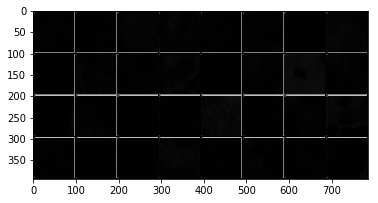

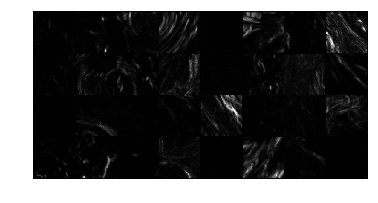

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


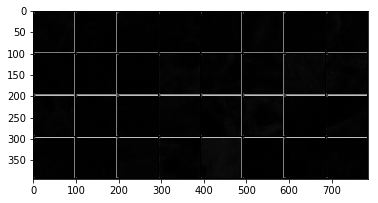

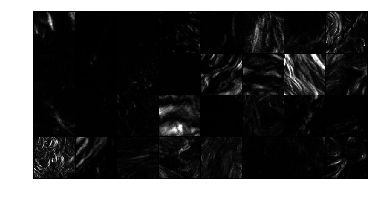

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


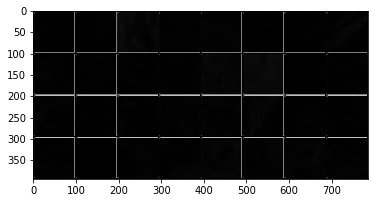

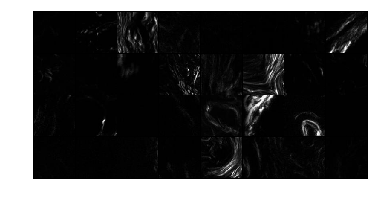

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


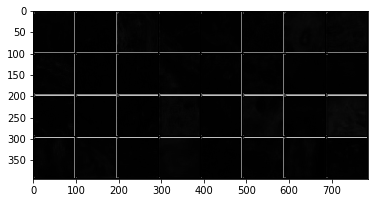

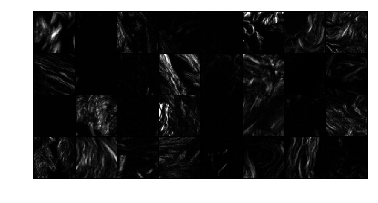

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


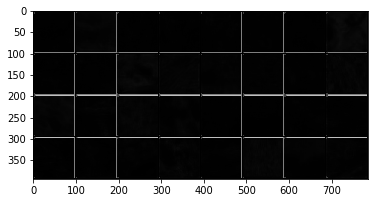

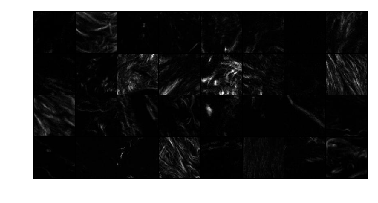

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


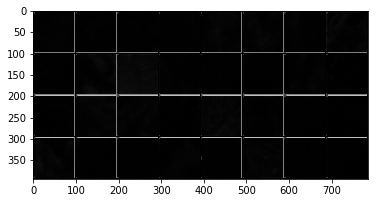

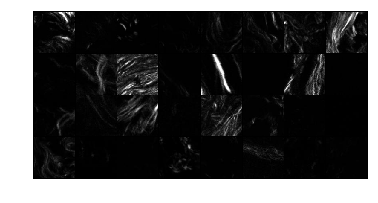

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


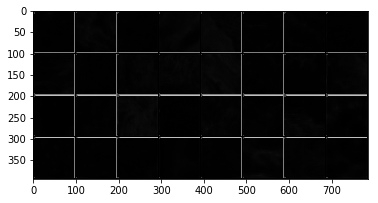

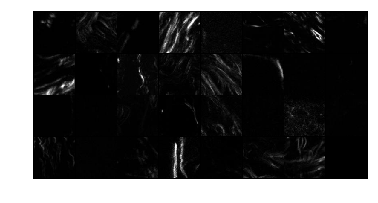

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


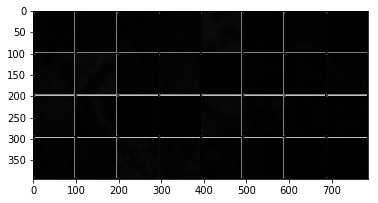

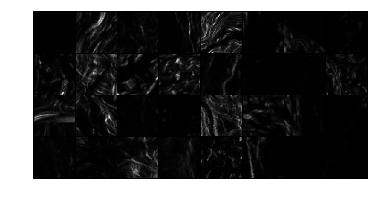

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


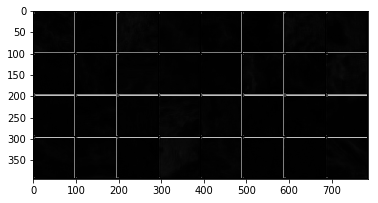

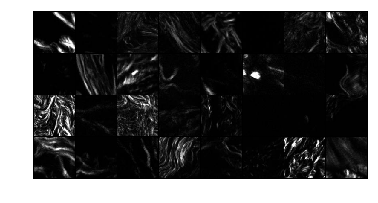

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


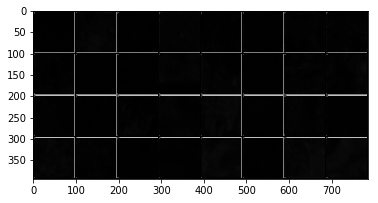

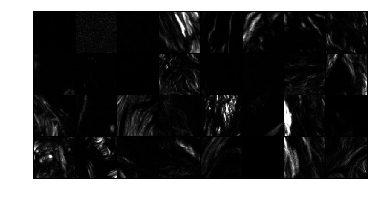

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


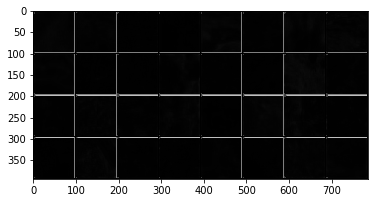

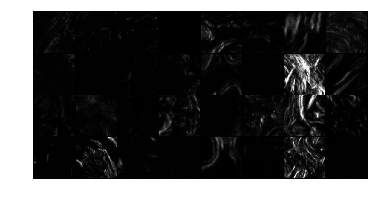

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


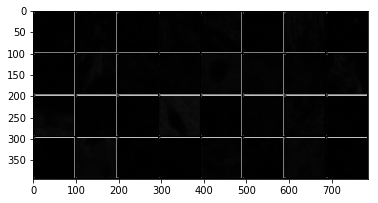

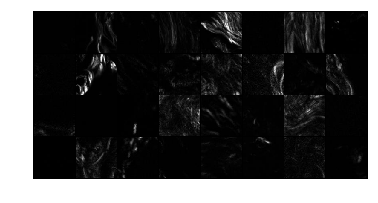

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


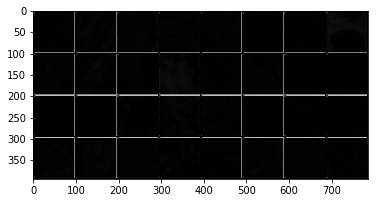

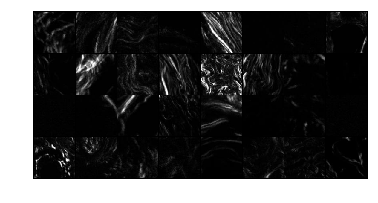

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


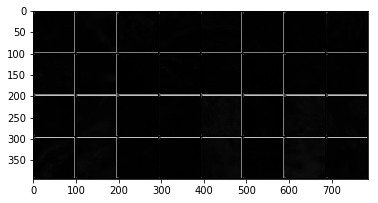

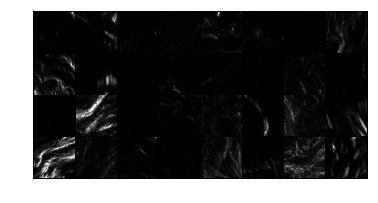

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


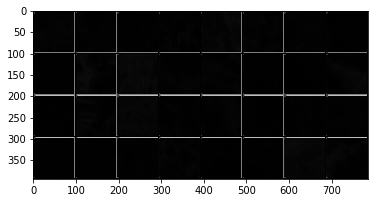

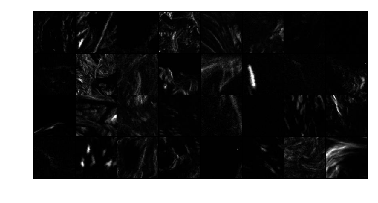

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


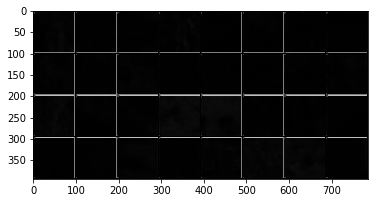

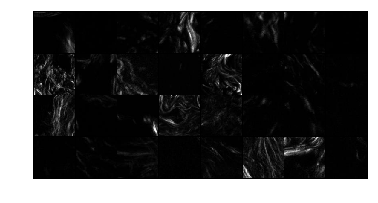

torch.Size([32, 1, 96, 96]) torch.Size([32, 96, 96])
torch.Size([32, 1, 96, 96])


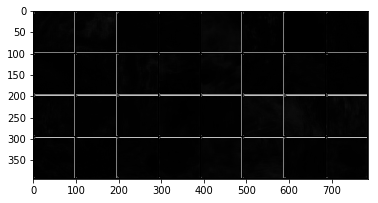

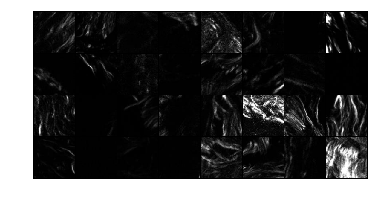

===> Avg. PSNR: nan dB


In [20]:
test()

In [30]:
import os
cwd = os.getcwd();
path = os.path.join(cwd, 'Saved model', 'densecnnshuffle.pth')
torch.save(model.state_dict(), path)

In [27]:
def train(epoch, p, windowsize):
    epoch_loss = 0
    for iteration, batch in enumerate(dataloader):
        input, target = batch['input'].to(device), batch['output'].to(device)

        optimizer.zero_grad()
        output = model(input)
        targetf = target.float()
        targetf = targetf[:, None]
        
        lossMSE = criterionMSE(output, targetf)      
        lossSSIM = 1-ssim(output, targetf, window_size=windowsize)
        
        # 0.75->0.4 after 3 epochs
        loss = p*lossMSE + (1-p)*lossSSIM
        combineLoss = p*lossMSE.item() + (1-p)*lossSSIM.item()
        
        epoch_loss = epoch_loss + combineLoss
        loss.backward()
        optimizer.step()
    
        if iteration%50 == 0:
            print("lossMSE: " + str(lossMSE.item()) +
                  " " + "lossSSIM: " + str(lossSSIM.item()))
            print("===> Epoch[{}]({}/{}): Loss: {:.4f}".format(epoch, iteration, len(dataloader), loss.item()))

    print("===> Epoch {} Complete: Avg. Loss: {:.4f}".format(epoch, epoch_loss / len(dataloader)))

In [28]:
l = 0.0001
p = 0
windowsize = 3
for epoch in range(1, 20 + 1):
    if epoch%5 == 0:
        windowsize = windowsize+1
        p = p
        l = l*0.5
        if windowsize == 0:
            windowsze = 1
    optimizer = optim.Adam(model.parameters(), lr=l)
        
    train(epoch, p, windowsize)

lossMSE: 0.015858452767133713 lossSSIM: 0.3219674229621887
===> Epoch[1](0/25343): Loss: 0.3220
lossMSE: 0.018360882997512817 lossSSIM: 0.3082037568092346
===> Epoch[1](50/25343): Loss: 0.3082
lossMSE: 0.011982657015323639 lossSSIM: 0.22734224796295166
===> Epoch[1](100/25343): Loss: 0.2273
lossMSE: 0.013869492337107658 lossSSIM: 0.2917470932006836
===> Epoch[1](150/25343): Loss: 0.2917
lossMSE: 0.02759541943669319 lossSSIM: 0.30646103620529175
===> Epoch[1](200/25343): Loss: 0.3065
lossMSE: 0.030524350702762604 lossSSIM: 0.2898677587509155
===> Epoch[1](250/25343): Loss: 0.2899
lossMSE: 0.015919657424092293 lossSSIM: 0.3430057764053345
===> Epoch[1](300/25343): Loss: 0.3430
lossMSE: 0.017932597547769547 lossSSIM: 0.36023616790771484
===> Epoch[1](350/25343): Loss: 0.3602
lossMSE: 0.01287024561315775 lossSSIM: 0.2784959077835083
===> Epoch[1](400/25343): Loss: 0.2785
lossMSE: 0.01777840405702591 lossSSIM: 0.3312443494796753
===> Epoch[1](450/25343): Loss: 0.3312
lossMSE: 0.012493697926

lossMSE: 0.018388822674751282 lossSSIM: 0.2849680781364441
===> Epoch[1](4150/25343): Loss: 0.2850
lossMSE: 0.020569942891597748 lossSSIM: 0.30896520614624023
===> Epoch[1](4200/25343): Loss: 0.3090
lossMSE: 0.014764172956347466 lossSSIM: 0.28265416622161865
===> Epoch[1](4250/25343): Loss: 0.2827
lossMSE: 0.02189546450972557 lossSSIM: 0.3233046531677246
===> Epoch[1](4300/25343): Loss: 0.3233
lossMSE: 0.01583459973335266 lossSSIM: 0.2519681453704834
===> Epoch[1](4350/25343): Loss: 0.2520
lossMSE: 0.012527186423540115 lossSSIM: 0.2272140383720398
===> Epoch[1](4400/25343): Loss: 0.2272
lossMSE: 0.020070962607860565 lossSSIM: 0.2937471270561218
===> Epoch[1](4450/25343): Loss: 0.2937
lossMSE: 0.012108814902603626 lossSSIM: 0.21342700719833374
===> Epoch[1](4500/25343): Loss: 0.2134
lossMSE: 0.01742677576839924 lossSSIM: 0.33100420236587524
===> Epoch[1](4550/25343): Loss: 0.3310
lossMSE: 0.012977215461432934 lossSSIM: 0.283849835395813
===> Epoch[1](4600/25343): Loss: 0.2838
lossMSE: 0

lossMSE: 0.01663183979690075 lossSSIM: 0.28674614429473877
===> Epoch[1](8300/25343): Loss: 0.2867
lossMSE: 0.018726035952568054 lossSSIM: 0.2957773804664612
===> Epoch[1](8350/25343): Loss: 0.2958
lossMSE: 0.017018869519233704 lossSSIM: 0.2606578469276428
===> Epoch[1](8400/25343): Loss: 0.2607
lossMSE: 0.020862529054284096 lossSSIM: 0.3367190957069397
===> Epoch[1](8450/25343): Loss: 0.3367
lossMSE: 0.021538404747843742 lossSSIM: 0.36436891555786133
===> Epoch[1](8500/25343): Loss: 0.3644
lossMSE: 0.014879044145345688 lossSSIM: 0.299144983291626
===> Epoch[1](8550/25343): Loss: 0.2991
lossMSE: 0.01450653187930584 lossSSIM: 0.26703381538391113
===> Epoch[1](8600/25343): Loss: 0.2670
lossMSE: 0.01442235242575407 lossSSIM: 0.2464718222618103
===> Epoch[1](8650/25343): Loss: 0.2465
lossMSE: 0.012609971687197685 lossSSIM: 0.2355564832687378
===> Epoch[1](8700/25343): Loss: 0.2356
lossMSE: 0.02155752293765545 lossSSIM: 0.3320090174674988
===> Epoch[1](8750/25343): Loss: 0.3320
lossMSE: 0.0

lossMSE: 0.014858484268188477 lossSSIM: 0.25674110651016235
===> Epoch[1](12450/25343): Loss: 0.2567
lossMSE: 0.015081205405294895 lossSSIM: 0.29428744316101074
===> Epoch[1](12500/25343): Loss: 0.2943
lossMSE: 0.016764601692557335 lossSSIM: 0.3100903034210205
===> Epoch[1](12550/25343): Loss: 0.3101
lossMSE: 0.01572585292160511 lossSSIM: 0.2612314820289612
===> Epoch[1](12600/25343): Loss: 0.2612
lossMSE: 0.01681496389210224 lossSSIM: 0.3016642928123474
===> Epoch[1](12650/25343): Loss: 0.3017
lossMSE: 0.016702963039278984 lossSSIM: 0.2709440588951111
===> Epoch[1](12700/25343): Loss: 0.2709
lossMSE: 0.019141115248203278 lossSSIM: 0.31479936838150024
===> Epoch[1](12750/25343): Loss: 0.3148
lossMSE: 0.02335982769727707 lossSSIM: 0.28909575939178467
===> Epoch[1](12800/25343): Loss: 0.2891
lossMSE: 0.01803484559059143 lossSSIM: 0.3276129364967346
===> Epoch[1](12850/25343): Loss: 0.3276
lossMSE: 0.021625112742185593 lossSSIM: 0.29102402925491333
===> Epoch[1](12900/25343): Loss: 0.2910

lossMSE: 0.01431836374104023 lossSSIM: 0.29577499628067017
===> Epoch[1](16550/25343): Loss: 0.2958
lossMSE: 0.016080167144536972 lossSSIM: 0.2983222007751465
===> Epoch[1](16600/25343): Loss: 0.2983
lossMSE: 0.012877032160758972 lossSSIM: 0.25698715448379517
===> Epoch[1](16650/25343): Loss: 0.2570
lossMSE: 0.02016657404601574 lossSSIM: 0.2756544351577759
===> Epoch[1](16700/25343): Loss: 0.2757
lossMSE: 0.013057987205684185 lossSSIM: 0.25314831733703613
===> Epoch[1](16750/25343): Loss: 0.2531
lossMSE: 0.015241033397614956 lossSSIM: 0.2763800621032715
===> Epoch[1](16800/25343): Loss: 0.2764
lossMSE: 0.015260990709066391 lossSSIM: 0.307070791721344
===> Epoch[1](16850/25343): Loss: 0.3071
lossMSE: 0.015816254541277885 lossSSIM: 0.2752518057823181
===> Epoch[1](16900/25343): Loss: 0.2753
lossMSE: 0.01742226630449295 lossSSIM: 0.29361826181411743
===> Epoch[1](16950/25343): Loss: 0.2936
lossMSE: 0.019063493236899376 lossSSIM: 0.31577277183532715
===> Epoch[1](17000/25343): Loss: 0.3158

lossMSE: 0.01579531468451023 lossSSIM: 0.2825435996055603
===> Epoch[1](20650/25343): Loss: 0.2825
lossMSE: 0.016134586185216904 lossSSIM: 0.22739088535308838
===> Epoch[1](20700/25343): Loss: 0.2274
lossMSE: 0.013909611850976944 lossSSIM: 0.2482396364212036
===> Epoch[1](20750/25343): Loss: 0.2482
lossMSE: 0.019873686134815216 lossSSIM: 0.3258553743362427
===> Epoch[1](20800/25343): Loss: 0.3259
lossMSE: 0.013701940886676311 lossSSIM: 0.24739223718643188
===> Epoch[1](20850/25343): Loss: 0.2474
lossMSE: 0.018185578286647797 lossSSIM: 0.2685748338699341
===> Epoch[1](20900/25343): Loss: 0.2686
lossMSE: 0.01983202062547207 lossSSIM: 0.3285890221595764
===> Epoch[1](20950/25343): Loss: 0.3286
lossMSE: 0.01634969562292099 lossSSIM: 0.27270108461380005
===> Epoch[1](21000/25343): Loss: 0.2727
lossMSE: 0.01765083335340023 lossSSIM: 0.29196465015411377
===> Epoch[1](21050/25343): Loss: 0.2920
lossMSE: 0.01598220504820347 lossSSIM: 0.3003438115119934
===> Epoch[1](21100/25343): Loss: 0.3003
l

lossMSE: 0.023203378543257713 lossSSIM: 0.28340834379196167
===> Epoch[1](24750/25343): Loss: 0.2834
lossMSE: 0.017086897045373917 lossSSIM: 0.25063228607177734
===> Epoch[1](24800/25343): Loss: 0.2506
lossMSE: 0.0179267730563879 lossSSIM: 0.3197447657585144
===> Epoch[1](24850/25343): Loss: 0.3197
lossMSE: 0.018350524827837944 lossSSIM: 0.29747986793518066
===> Epoch[1](24900/25343): Loss: 0.2975
lossMSE: 0.014437586069107056 lossSSIM: 0.24969762563705444
===> Epoch[1](24950/25343): Loss: 0.2497
lossMSE: 0.014626357704401016 lossSSIM: 0.3297847509384155
===> Epoch[1](25000/25343): Loss: 0.3298
lossMSE: 0.019280727952718735 lossSSIM: 0.3171854019165039
===> Epoch[1](25050/25343): Loss: 0.3172
lossMSE: 0.015279233455657959 lossSSIM: 0.265713095664978
===> Epoch[1](25100/25343): Loss: 0.2657
lossMSE: 0.01385954674333334 lossSSIM: 0.20389580726623535
===> Epoch[1](25150/25343): Loss: 0.2039
lossMSE: 0.015087250620126724 lossSSIM: 0.2951618432998657
===> Epoch[1](25200/25343): Loss: 0.2952

lossMSE: 0.015639133751392365 lossSSIM: 0.24052053689956665
===> Epoch[2](3550/25343): Loss: 0.2405
lossMSE: 0.017174098640680313 lossSSIM: 0.2827957272529602
===> Epoch[2](3600/25343): Loss: 0.2828
lossMSE: 0.021127568557858467 lossSSIM: 0.28221726417541504
===> Epoch[2](3650/25343): Loss: 0.2822
lossMSE: 0.0214223712682724 lossSSIM: 0.3455156683921814
===> Epoch[2](3700/25343): Loss: 0.3455
lossMSE: 0.016847120597958565 lossSSIM: 0.29703307151794434
===> Epoch[2](3750/25343): Loss: 0.2970
lossMSE: 0.017162876203656197 lossSSIM: 0.32297635078430176
===> Epoch[2](3800/25343): Loss: 0.3230
lossMSE: 0.019028671085834503 lossSSIM: 0.32207995653152466
===> Epoch[2](3850/25343): Loss: 0.3221
lossMSE: 0.017711540684103966 lossSSIM: 0.25246286392211914
===> Epoch[2](3900/25343): Loss: 0.2525
lossMSE: 0.01839415729045868 lossSSIM: 0.33341050148010254
===> Epoch[2](3950/25343): Loss: 0.3334
lossMSE: 0.016173290088772774 lossSSIM: 0.28172457218170166
===> Epoch[2](4000/25343): Loss: 0.2817
lossM

lossMSE: 0.016951117664575577 lossSSIM: 0.2607320547103882
===> Epoch[2](7700/25343): Loss: 0.2607
lossMSE: 0.020481612533330917 lossSSIM: 0.2867034077644348
===> Epoch[2](7750/25343): Loss: 0.2867
lossMSE: 0.017117146402597427 lossSSIM: 0.31644582748413086
===> Epoch[2](7800/25343): Loss: 0.3164
lossMSE: 0.017804516479372978 lossSSIM: 0.3304624557495117
===> Epoch[2](7850/25343): Loss: 0.3305
lossMSE: 0.014546315185725689 lossSSIM: 0.2311440110206604
===> Epoch[2](7900/25343): Loss: 0.2311
lossMSE: 0.017702259123325348 lossSSIM: 0.27993184328079224
===> Epoch[2](7950/25343): Loss: 0.2799
lossMSE: 0.019699087366461754 lossSSIM: 0.30371540784835815
===> Epoch[2](8000/25343): Loss: 0.3037
lossMSE: 0.017137696966528893 lossSSIM: 0.23541361093521118
===> Epoch[2](8050/25343): Loss: 0.2354
lossMSE: 0.015970895066857338 lossSSIM: 0.24315637350082397
===> Epoch[2](8100/25343): Loss: 0.2432
lossMSE: 0.01859143376350403 lossSSIM: 0.2643800377845764
===> Epoch[2](8150/25343): Loss: 0.2644
lossMS

lossMSE: 0.015289532020688057 lossSSIM: 0.24118447303771973
===> Epoch[2](11850/25343): Loss: 0.2412
lossMSE: 0.020848482847213745 lossSSIM: 0.3291393518447876
===> Epoch[2](11900/25343): Loss: 0.3291
lossMSE: 0.01782173290848732 lossSSIM: 0.28338682651519775
===> Epoch[2](11950/25343): Loss: 0.2834
lossMSE: 0.01763816922903061 lossSSIM: 0.27785027027130127
===> Epoch[2](12000/25343): Loss: 0.2779
lossMSE: 0.017217967659235 lossSSIM: 0.26151716709136963
===> Epoch[2](12050/25343): Loss: 0.2615
lossMSE: 0.021378537639975548 lossSSIM: 0.291440486907959
===> Epoch[2](12100/25343): Loss: 0.2914
lossMSE: 0.02172277122735977 lossSSIM: 0.2951221466064453
===> Epoch[2](12150/25343): Loss: 0.2951
lossMSE: 0.020317474380135536 lossSSIM: 0.30134260654449463
===> Epoch[2](12200/25343): Loss: 0.3013
lossMSE: 0.01400289312005043 lossSSIM: 0.31931960582733154
===> Epoch[2](12250/25343): Loss: 0.3193
lossMSE: 0.022227302193641663 lossSSIM: 0.32738572359085083
===> Epoch[2](12300/25343): Loss: 0.3274
l

lossMSE: 0.019993923604488373 lossSSIM: 0.2886043190956116
===> Epoch[2](15950/25343): Loss: 0.2886
lossMSE: 0.014324082061648369 lossSSIM: 0.23834127187728882
===> Epoch[2](16000/25343): Loss: 0.2383
lossMSE: 0.0159615371376276 lossSSIM: 0.276708722114563
===> Epoch[2](16050/25343): Loss: 0.2767
lossMSE: 0.020741846412420273 lossSSIM: 0.3478081226348877
===> Epoch[2](16100/25343): Loss: 0.3478
lossMSE: 0.020986123010516167 lossSSIM: 0.30465167760849
===> Epoch[2](16150/25343): Loss: 0.3047
lossMSE: 0.017102153971791267 lossSSIM: 0.29196828603744507
===> Epoch[2](16200/25343): Loss: 0.2920
lossMSE: 0.024220410734415054 lossSSIM: 0.2922813296318054
===> Epoch[2](16250/25343): Loss: 0.2923
lossMSE: 0.01969502680003643 lossSSIM: 0.3192105293273926
===> Epoch[2](16300/25343): Loss: 0.3192
lossMSE: 0.016522547230124474 lossSSIM: 0.2692084312438965
===> Epoch[2](16350/25343): Loss: 0.2692
lossMSE: 0.016120539978146553 lossSSIM: 0.2750609517097473
===> Epoch[2](16400/25343): Loss: 0.2751
loss

lossMSE: 0.01843361370265484 lossSSIM: 0.319441020488739
===> Epoch[2](20050/25343): Loss: 0.3194
lossMSE: 0.018063543364405632 lossSSIM: 0.2862190008163452
===> Epoch[2](20100/25343): Loss: 0.2862
lossMSE: 0.01674877293407917 lossSSIM: 0.22226566076278687
===> Epoch[2](20150/25343): Loss: 0.2223
lossMSE: 0.018243424594402313 lossSSIM: 0.29180508852005005
===> Epoch[2](20200/25343): Loss: 0.2918
lossMSE: 0.015502949245274067 lossSSIM: 0.26277464628219604
===> Epoch[2](20250/25343): Loss: 0.2628
lossMSE: 0.017169330269098282 lossSSIM: 0.3157746195793152
===> Epoch[2](20300/25343): Loss: 0.3158
lossMSE: 0.01606755144894123 lossSSIM: 0.27856767177581787
===> Epoch[2](20350/25343): Loss: 0.2786
lossMSE: 0.021269040182232857 lossSSIM: 0.2858709692955017
===> Epoch[2](20400/25343): Loss: 0.2859
lossMSE: 0.013497186824679375 lossSSIM: 0.2557767629623413
===> Epoch[2](20450/25343): Loss: 0.2558
lossMSE: 0.01669183559715748 lossSSIM: 0.30992817878723145
===> Epoch[2](20500/25343): Loss: 0.3099


lossMSE: 0.022217020392417908 lossSSIM: 0.3193480968475342
===> Epoch[2](24150/25343): Loss: 0.3193
lossMSE: 0.016486793756484985 lossSSIM: 0.3031427264213562
===> Epoch[2](24200/25343): Loss: 0.3031
lossMSE: 0.01739414595067501 lossSSIM: 0.2720450758934021
===> Epoch[2](24250/25343): Loss: 0.2720
lossMSE: 0.016198905184864998 lossSSIM: 0.25120437145233154
===> Epoch[2](24300/25343): Loss: 0.2512
lossMSE: 0.026486020535230637 lossSSIM: 0.3130762577056885
===> Epoch[2](24350/25343): Loss: 0.3131
lossMSE: 0.02263176441192627 lossSSIM: 0.3283407688140869
===> Epoch[2](24400/25343): Loss: 0.3283
lossMSE: 0.020676378160715103 lossSSIM: 0.30993515253067017
===> Epoch[2](24450/25343): Loss: 0.3099
lossMSE: 0.016908951103687286 lossSSIM: 0.29343557357788086
===> Epoch[2](24500/25343): Loss: 0.2934
lossMSE: 0.018261929973959923 lossSSIM: 0.258286714553833
===> Epoch[2](24550/25343): Loss: 0.2583
lossMSE: 0.014572156593203545 lossSSIM: 0.2527633309364319
===> Epoch[2](24600/25343): Loss: 0.2528


lossMSE: 0.019862167537212372 lossSSIM: 0.31795698404312134
===> Epoch[3](2950/25343): Loss: 0.3180
lossMSE: 0.02055473066866398 lossSSIM: 0.33717435598373413
===> Epoch[3](3000/25343): Loss: 0.3372
lossMSE: 0.013661199249327183 lossSSIM: 0.2590823769569397
===> Epoch[3](3050/25343): Loss: 0.2591
lossMSE: 0.018214741721749306 lossSSIM: 0.2905338406562805
===> Epoch[3](3100/25343): Loss: 0.2905
lossMSE: 0.017210913822054863 lossSSIM: 0.29562610387802124
===> Epoch[3](3150/25343): Loss: 0.2956
lossMSE: 0.017710890620946884 lossSSIM: 0.29104703664779663
===> Epoch[3](3200/25343): Loss: 0.2910
lossMSE: 0.02008763700723648 lossSSIM: 0.2973182201385498
===> Epoch[3](3250/25343): Loss: 0.2973
lossMSE: 0.0177389495074749 lossSSIM: 0.27314984798431396
===> Epoch[3](3300/25343): Loss: 0.2731
lossMSE: 0.0172974094748497 lossSSIM: 0.2774065136909485
===> Epoch[3](3350/25343): Loss: 0.2774
lossMSE: 0.01607951894402504 lossSSIM: 0.30495190620422363
===> Epoch[3](3400/25343): Loss: 0.3050
lossMSE: 0.

lossMSE: 0.023726120591163635 lossSSIM: 0.29942071437835693
===> Epoch[3](7100/25343): Loss: 0.2994
lossMSE: 0.022075269371271133 lossSSIM: 0.31253647804260254
===> Epoch[3](7150/25343): Loss: 0.3125
lossMSE: 0.01704815775156021 lossSSIM: 0.23345524072647095
===> Epoch[3](7200/25343): Loss: 0.2335
lossMSE: 0.015508297830820084 lossSSIM: 0.26255011558532715
===> Epoch[3](7250/25343): Loss: 0.2626
lossMSE: 0.016975419595837593 lossSSIM: 0.27558398246765137
===> Epoch[3](7300/25343): Loss: 0.2756
lossMSE: 0.022556059062480927 lossSSIM: 0.32086634635925293
===> Epoch[3](7350/25343): Loss: 0.3209
lossMSE: 0.014147253707051277 lossSSIM: 0.26120269298553467
===> Epoch[3](7400/25343): Loss: 0.2612
lossMSE: 0.01747361198067665 lossSSIM: 0.3061372637748718
===> Epoch[3](7450/25343): Loss: 0.3061
lossMSE: 0.019668830558657646 lossSSIM: 0.28505808115005493
===> Epoch[3](7500/25343): Loss: 0.2851
lossMSE: 0.016975661739706993 lossSSIM: 0.28197628259658813
===> Epoch[3](7550/25343): Loss: 0.2820
los

lossMSE: 0.019550897181034088 lossSSIM: 0.29150569438934326
===> Epoch[3](11250/25343): Loss: 0.2915
lossMSE: 0.015325993299484253 lossSSIM: 0.276366651058197
===> Epoch[3](11300/25343): Loss: 0.2764
lossMSE: 0.016710495576262474 lossSSIM: 0.2764497399330139
===> Epoch[3](11350/25343): Loss: 0.2764
lossMSE: 0.034840866923332214 lossSSIM: 0.279945969581604
===> Epoch[3](11400/25343): Loss: 0.2799
lossMSE: 0.01943313516676426 lossSSIM: 0.3098331093788147
===> Epoch[3](11450/25343): Loss: 0.3098
lossMSE: 0.019188066944479942 lossSSIM: 0.317870557308197
===> Epoch[3](11500/25343): Loss: 0.3179
lossMSE: 0.015113744884729385 lossSSIM: 0.2524986267089844
===> Epoch[3](11550/25343): Loss: 0.2525
lossMSE: 0.02435540035367012 lossSSIM: 0.3588905930519104
===> Epoch[3](11600/25343): Loss: 0.3589
lossMSE: 0.016566284000873566 lossSSIM: 0.2641918659210205
===> Epoch[3](11650/25343): Loss: 0.2642
lossMSE: 0.023586194962263107 lossSSIM: 0.2807352542877197
===> Epoch[3](11700/25343): Loss: 0.2807
loss

lossMSE: 0.013371785171329975 lossSSIM: 0.263249933719635
===> Epoch[3](15350/25343): Loss: 0.2632
lossMSE: 0.015563752502202988 lossSSIM: 0.2768406867980957
===> Epoch[3](15400/25343): Loss: 0.2768
lossMSE: 0.018997816368937492 lossSSIM: 0.25923413038253784
===> Epoch[3](15450/25343): Loss: 0.2592
lossMSE: 0.016392894089221954 lossSSIM: 0.303928017616272
===> Epoch[3](15500/25343): Loss: 0.3039
lossMSE: 0.01666075922548771 lossSSIM: 0.3299221992492676
===> Epoch[3](15550/25343): Loss: 0.3299
lossMSE: 0.022571031004190445 lossSSIM: 0.2581448554992676
===> Epoch[3](15600/25343): Loss: 0.2581
lossMSE: 0.016965117305517197 lossSSIM: 0.28161847591400146
===> Epoch[3](15650/25343): Loss: 0.2816
lossMSE: 0.018390072509646416 lossSSIM: 0.26798325777053833
===> Epoch[3](15700/25343): Loss: 0.2680
lossMSE: 0.01563110202550888 lossSSIM: 0.2830231785774231
===> Epoch[3](15750/25343): Loss: 0.2830
lossMSE: 0.02825150266289711 lossSSIM: 0.42392075061798096
===> Epoch[3](15800/25343): Loss: 0.4239
l

lossMSE: 0.01461048237979412 lossSSIM: 0.2507946491241455
===> Epoch[3](19450/25343): Loss: 0.2508
lossMSE: 0.014926765114068985 lossSSIM: 0.2660449743270874
===> Epoch[3](19500/25343): Loss: 0.2660
lossMSE: 0.01710939034819603 lossSSIM: 0.3187144994735718
===> Epoch[3](19550/25343): Loss: 0.3187
lossMSE: 0.014934394508600235 lossSSIM: 0.2656453251838684
===> Epoch[3](19600/25343): Loss: 0.2656
lossMSE: 0.016189340502023697 lossSSIM: 0.2664441466331482
===> Epoch[3](19650/25343): Loss: 0.2664
lossMSE: 0.021469980478286743 lossSSIM: 0.347628653049469
===> Epoch[3](19700/25343): Loss: 0.3476
lossMSE: 0.016730744391679764 lossSSIM: 0.2840081453323364
===> Epoch[3](19750/25343): Loss: 0.2840
lossMSE: 0.03061572089791298 lossSSIM: 0.3102971911430359
===> Epoch[3](19800/25343): Loss: 0.3103
lossMSE: 0.020425468683242798 lossSSIM: 0.23257482051849365
===> Epoch[3](19850/25343): Loss: 0.2326
lossMSE: 0.0157085582613945 lossSSIM: 0.2941897511482239
===> Epoch[3](19900/25343): Loss: 0.2942
lossM

lossMSE: 0.015413952991366386 lossSSIM: 0.2928176522254944
===> Epoch[3](23550/25343): Loss: 0.2928
lossMSE: 0.015999112278223038 lossSSIM: 0.2504543662071228
===> Epoch[3](23600/25343): Loss: 0.2505
lossMSE: 0.019940942525863647 lossSSIM: 0.312624990940094
===> Epoch[3](23650/25343): Loss: 0.3126
lossMSE: 0.014391918666660786 lossSSIM: 0.2511756420135498
===> Epoch[3](23700/25343): Loss: 0.2512
lossMSE: 0.01630457490682602 lossSSIM: 0.25139307975769043
===> Epoch[3](23750/25343): Loss: 0.2514
lossMSE: 0.01509898528456688 lossSSIM: 0.2342672348022461
===> Epoch[3](23800/25343): Loss: 0.2343
lossMSE: 0.018199149519205093 lossSSIM: 0.3075493574142456
===> Epoch[3](23850/25343): Loss: 0.3075
lossMSE: 0.014410966075956821 lossSSIM: 0.27248942852020264
===> Epoch[3](23900/25343): Loss: 0.2725
lossMSE: 0.015679799020290375 lossSSIM: 0.2665901780128479
===> Epoch[3](23950/25343): Loss: 0.2666
lossMSE: 0.017118845134973526 lossSSIM: 0.2916240096092224
===> Epoch[3](24000/25343): Loss: 0.2916
l

lossMSE: 0.02284015156328678 lossSSIM: 0.3264245390892029
===> Epoch[4](2350/25343): Loss: 0.3264
lossMSE: 0.024748843163251877 lossSSIM: 0.3085102438926697
===> Epoch[4](2400/25343): Loss: 0.3085
lossMSE: 0.019218048080801964 lossSSIM: 0.31371086835861206
===> Epoch[4](2450/25343): Loss: 0.3137
lossMSE: 0.027041928842663765 lossSSIM: 0.3652998208999634
===> Epoch[4](2500/25343): Loss: 0.3653
lossMSE: 0.015284623019397259 lossSSIM: 0.23811405897140503
===> Epoch[4](2550/25343): Loss: 0.2381
lossMSE: 0.018347647041082382 lossSSIM: 0.2962912321090698
===> Epoch[4](2600/25343): Loss: 0.2963
lossMSE: 0.02371550351381302 lossSSIM: 0.3364619016647339
===> Epoch[4](2650/25343): Loss: 0.3365
lossMSE: 0.014718393795192242 lossSSIM: 0.2326611876487732
===> Epoch[4](2700/25343): Loss: 0.2327
lossMSE: 0.022235549986362457 lossSSIM: 0.3606322407722473
===> Epoch[4](2750/25343): Loss: 0.3606
lossMSE: 0.016011618077754974 lossSSIM: 0.28343093395233154
===> Epoch[4](2800/25343): Loss: 0.2834
lossMSE: 

lossMSE: 0.016926638782024384 lossSSIM: 0.304823100566864
===> Epoch[4](6500/25343): Loss: 0.3048
lossMSE: 0.021889876574277878 lossSSIM: 0.3982330560684204
===> Epoch[4](6550/25343): Loss: 0.3982
lossMSE: 0.016498040407896042 lossSSIM: 0.27159756422042847
===> Epoch[4](6600/25343): Loss: 0.2716
lossMSE: 0.019411465153098106 lossSSIM: 0.28473806381225586
===> Epoch[4](6650/25343): Loss: 0.2847
lossMSE: 0.019255030900239944 lossSSIM: 0.2904922366142273
===> Epoch[4](6700/25343): Loss: 0.2905
lossMSE: 0.015683431178331375 lossSSIM: 0.30492550134658813
===> Epoch[4](6750/25343): Loss: 0.3049
lossMSE: 0.017375700175762177 lossSSIM: 0.29250556230545044
===> Epoch[4](6800/25343): Loss: 0.2925
lossMSE: 0.017021257430315018 lossSSIM: 0.3168906569480896
===> Epoch[4](6850/25343): Loss: 0.3169
lossMSE: 0.01760316640138626 lossSSIM: 0.2890547513961792
===> Epoch[4](6900/25343): Loss: 0.2891
lossMSE: 0.022659463807940483 lossSSIM: 0.3750978112220764
===> Epoch[4](6950/25343): Loss: 0.3751
lossMSE:

lossMSE: 0.0179488155990839 lossSSIM: 0.2885543704032898
===> Epoch[4](10650/25343): Loss: 0.2886
lossMSE: 0.02079031988978386 lossSSIM: 0.29721617698669434
===> Epoch[4](10700/25343): Loss: 0.2972
lossMSE: 0.020585346966981888 lossSSIM: 0.36490845680236816
===> Epoch[4](10750/25343): Loss: 0.3649
lossMSE: 0.016108611598610878 lossSSIM: 0.2910960912704468
===> Epoch[4](10800/25343): Loss: 0.2911
lossMSE: 0.016883589327335358 lossSSIM: 0.29470837116241455
===> Epoch[4](10850/25343): Loss: 0.2947
lossMSE: 0.016658326610922813 lossSSIM: 0.24289441108703613
===> Epoch[4](10900/25343): Loss: 0.2429
lossMSE: 0.01574552059173584 lossSSIM: 0.27547091245651245
===> Epoch[4](10950/25343): Loss: 0.2755
lossMSE: 0.015547414310276508 lossSSIM: 0.2506263852119446
===> Epoch[4](11000/25343): Loss: 0.2506
lossMSE: 0.015999741852283478 lossSSIM: 0.27997732162475586
===> Epoch[4](11050/25343): Loss: 0.2800
lossMSE: 0.017382796853780746 lossSSIM: 0.29159456491470337
===> Epoch[4](11100/25343): Loss: 0.29

lossMSE: 0.01591578871011734 lossSSIM: 0.2821096181869507
===> Epoch[4](14750/25343): Loss: 0.2821
lossMSE: 0.015936443582177162 lossSSIM: 0.25984805822372437
===> Epoch[4](14800/25343): Loss: 0.2598
lossMSE: 0.015172062441706657 lossSSIM: 0.2616795301437378
===> Epoch[4](14850/25343): Loss: 0.2617
lossMSE: 0.017602767795324326 lossSSIM: 0.2571203112602234
===> Epoch[4](14900/25343): Loss: 0.2571
lossMSE: 0.020848583430051804 lossSSIM: 0.28871989250183105
===> Epoch[4](14950/25343): Loss: 0.2887
lossMSE: 0.01561114564538002 lossSSIM: 0.22249019145965576
===> Epoch[4](15000/25343): Loss: 0.2225
lossMSE: 0.019971974194049835 lossSSIM: 0.28434306383132935
===> Epoch[4](15050/25343): Loss: 0.2843
lossMSE: 0.019453998655080795 lossSSIM: 0.32905685901641846
===> Epoch[4](15100/25343): Loss: 0.3291
lossMSE: 0.015273470431566238 lossSSIM: 0.24142181873321533
===> Epoch[4](15150/25343): Loss: 0.2414
lossMSE: 0.018178800120949745 lossSSIM: 0.28593671321868896
===> Epoch[4](15200/25343): Loss: 0.

lossMSE: 0.017698343843221664 lossSSIM: 0.3358621597290039
===> Epoch[4](18850/25343): Loss: 0.3359
lossMSE: 0.01751205325126648 lossSSIM: 0.27874046564102173
===> Epoch[4](18900/25343): Loss: 0.2787
lossMSE: 0.015884138643741608 lossSSIM: 0.22532355785369873
===> Epoch[4](18950/25343): Loss: 0.2253
lossMSE: 0.016028352081775665 lossSSIM: 0.2831134796142578
===> Epoch[4](19000/25343): Loss: 0.2831
lossMSE: 0.014728754758834839 lossSSIM: 0.2863037586212158
===> Epoch[4](19050/25343): Loss: 0.2863
lossMSE: 0.014191078022122383 lossSSIM: 0.2582501769065857
===> Epoch[4](19100/25343): Loss: 0.2583
lossMSE: 0.017180373892188072 lossSSIM: 0.2763085961341858
===> Epoch[4](19150/25343): Loss: 0.2763
lossMSE: 0.015846379101276398 lossSSIM: 0.26651859283447266
===> Epoch[4](19200/25343): Loss: 0.2665
lossMSE: 0.016940699890255928 lossSSIM: 0.26928824186325073
===> Epoch[4](19250/25343): Loss: 0.2693
lossMSE: 0.015586054883897305 lossSSIM: 0.2723565101623535
===> Epoch[4](19300/25343): Loss: 0.27

lossMSE: 0.02467033453285694 lossSSIM: 0.32212603092193604
===> Epoch[4](22950/25343): Loss: 0.3221
lossMSE: 0.019829383119940758 lossSSIM: 0.266645610332489
===> Epoch[4](23000/25343): Loss: 0.2666
lossMSE: 0.022672973573207855 lossSSIM: 0.28309714794158936
===> Epoch[4](23050/25343): Loss: 0.2831
lossMSE: 0.015225006267428398 lossSSIM: 0.2951772212982178
===> Epoch[4](23100/25343): Loss: 0.2952
lossMSE: 0.01803690195083618 lossSSIM: 0.32377636432647705
===> Epoch[4](23150/25343): Loss: 0.3238
lossMSE: 0.01930958405137062 lossSSIM: 0.2729541063308716
===> Epoch[4](23200/25343): Loss: 0.2730
lossMSE: 0.018170125782489777 lossSSIM: 0.27189451456069946
===> Epoch[4](23250/25343): Loss: 0.2719
lossMSE: 0.018286386504769325 lossSSIM: 0.2609868049621582
===> Epoch[4](23300/25343): Loss: 0.2610
lossMSE: 0.017449362203478813 lossSSIM: 0.238084077835083
===> Epoch[4](23350/25343): Loss: 0.2381
lossMSE: 0.017038486897945404 lossSSIM: 0.2807948589324951
===> Epoch[4](23400/25343): Loss: 0.2808
l

lossMSE: 0.017915153875947 lossSSIM: 0.2551872134208679
===> Epoch[5](1750/25343): Loss: 0.2552
lossMSE: 0.021994316950440407 lossSSIM: 0.3187101483345032
===> Epoch[5](1800/25343): Loss: 0.3187
lossMSE: 0.018259920179843903 lossSSIM: 0.2989823818206787
===> Epoch[5](1850/25343): Loss: 0.2990
lossMSE: 0.018854448571801186 lossSSIM: 0.32479554414749146
===> Epoch[5](1900/25343): Loss: 0.3248
lossMSE: 0.02243783511221409 lossSSIM: 0.2819216847419739
===> Epoch[5](1950/25343): Loss: 0.2819
lossMSE: 0.018395129591226578 lossSSIM: 0.2503829002380371
===> Epoch[5](2000/25343): Loss: 0.2504
lossMSE: 0.015416400507092476 lossSSIM: 0.28261059522628784
===> Epoch[5](2050/25343): Loss: 0.2826
lossMSE: 0.023283464834094048 lossSSIM: 0.3081586956977844
===> Epoch[5](2100/25343): Loss: 0.3082
lossMSE: 0.0253467820584774 lossSSIM: 0.29415714740753174
===> Epoch[5](2150/25343): Loss: 0.2942
lossMSE: 0.01928217150270939 lossSSIM: 0.3410106897354126
===> Epoch[5](2200/25343): Loss: 0.3410
lossMSE: 0.013

lossMSE: 0.016287267208099365 lossSSIM: 0.24726736545562744
===> Epoch[5](5900/25343): Loss: 0.2473
lossMSE: 0.018854349851608276 lossSSIM: 0.30990850925445557
===> Epoch[5](5950/25343): Loss: 0.3099
lossMSE: 0.016343215480446815 lossSSIM: 0.27578866481781006
===> Epoch[5](6000/25343): Loss: 0.2758
lossMSE: 0.013957228511571884 lossSSIM: 0.26753079891204834
===> Epoch[5](6050/25343): Loss: 0.2675
lossMSE: 0.01626288890838623 lossSSIM: 0.3054705262184143
===> Epoch[5](6100/25343): Loss: 0.3055
lossMSE: 0.015929430723190308 lossSSIM: 0.3002166152000427
===> Epoch[5](6150/25343): Loss: 0.3002
lossMSE: 0.015098382718861103 lossSSIM: 0.2576109766960144
===> Epoch[5](6200/25343): Loss: 0.2576
lossMSE: 0.0174969844520092 lossSSIM: 0.28361719846725464
===> Epoch[5](6250/25343): Loss: 0.2836
lossMSE: 0.015267875045537949 lossSSIM: 0.2467350959777832
===> Epoch[5](6300/25343): Loss: 0.2467
lossMSE: 0.01573682576417923 lossSSIM: 0.2455744743347168
===> Epoch[5](6350/25343): Loss: 0.2456
lossMSE: 

lossMSE: 0.021800914779305458 lossSSIM: 0.3109457492828369
===> Epoch[5](10050/25343): Loss: 0.3109
lossMSE: 0.017260732129216194 lossSSIM: 0.2912222743034363
===> Epoch[5](10100/25343): Loss: 0.2912
lossMSE: 0.014711666852235794 lossSSIM: 0.259756863117218
===> Epoch[5](10150/25343): Loss: 0.2598
lossMSE: 0.01645468734204769 lossSSIM: 0.3060344457626343
===> Epoch[5](10200/25343): Loss: 0.3060
lossMSE: 0.017160877585411072 lossSSIM: 0.30687642097473145
===> Epoch[5](10250/25343): Loss: 0.3069
lossMSE: 0.016695812344551086 lossSSIM: 0.26556992530822754
===> Epoch[5](10300/25343): Loss: 0.2656
lossMSE: 0.01610490307211876 lossSSIM: 0.28675663471221924
===> Epoch[5](10350/25343): Loss: 0.2868
lossMSE: 0.01618098095059395 lossSSIM: 0.32047581672668457
===> Epoch[5](10400/25343): Loss: 0.3205
lossMSE: 0.014146018773317337 lossSSIM: 0.27591758966445923
===> Epoch[5](10450/25343): Loss: 0.2759
lossMSE: 0.016695862635970116 lossSSIM: 0.30334627628326416
===> Epoch[5](10500/25343): Loss: 0.303

lossMSE: 0.019561419263482094 lossSSIM: 0.31482040882110596
===> Epoch[5](14200/25343): Loss: 0.3148
lossMSE: 0.016946882009506226 lossSSIM: 0.3309808373451233
===> Epoch[5](14250/25343): Loss: 0.3310
lossMSE: 0.020810429006814957 lossSSIM: 0.28647923469543457
===> Epoch[5](14300/25343): Loss: 0.2865
lossMSE: 0.01733873412013054 lossSSIM: 0.2769995927810669
===> Epoch[5](14350/25343): Loss: 0.2770
lossMSE: 0.016221679747104645 lossSSIM: 0.34186607599258423
===> Epoch[5](14400/25343): Loss: 0.3419
lossMSE: 0.016577893868088722 lossSSIM: 0.32381272315979004
===> Epoch[5](14450/25343): Loss: 0.3238
lossMSE: 0.021103177219629288 lossSSIM: 0.3250861167907715
===> Epoch[5](14500/25343): Loss: 0.3251
lossMSE: 0.01522571500390768 lossSSIM: 0.2901550531387329
===> Epoch[5](14550/25343): Loss: 0.2902
lossMSE: 0.017856372520327568 lossSSIM: 0.26907360553741455
===> Epoch[5](14600/25343): Loss: 0.2691
lossMSE: 0.015855375677347183 lossSSIM: 0.3077089190483093
===> Epoch[5](14650/25343): Loss: 0.30

lossMSE: 0.014866392128169537 lossSSIM: 0.2801225781440735
===> Epoch[5](18300/25343): Loss: 0.2801
lossMSE: 0.013596420176327229 lossSSIM: 0.19634145498275757
===> Epoch[5](18350/25343): Loss: 0.1963
lossMSE: 0.018702315166592598 lossSSIM: 0.327431321144104
===> Epoch[5](18400/25343): Loss: 0.3274
lossMSE: 0.022347433492541313 lossSSIM: 0.34520280361175537
===> Epoch[5](18450/25343): Loss: 0.3452
lossMSE: 0.03160582855343819 lossSSIM: 0.31190311908721924
===> Epoch[5](18500/25343): Loss: 0.3119
lossMSE: 0.01682453230023384 lossSSIM: 0.3066455125808716
===> Epoch[5](18550/25343): Loss: 0.3066
lossMSE: 0.019402559846639633 lossSSIM: 0.32876914739608765
===> Epoch[5](18600/25343): Loss: 0.3288
lossMSE: 0.018812784925103188 lossSSIM: 0.2871062159538269
===> Epoch[5](18650/25343): Loss: 0.2871
lossMSE: 0.01731882058084011 lossSSIM: 0.2942034602165222
===> Epoch[5](18700/25343): Loss: 0.2942
lossMSE: 0.016981108114123344 lossSSIM: 0.2982684373855591
===> Epoch[5](18750/25343): Loss: 0.2983


lossMSE: 0.023668060079216957 lossSSIM: 0.32649409770965576
===> Epoch[5](22400/25343): Loss: 0.3265
lossMSE: 0.013323919847607613 lossSSIM: 0.2446569800376892
===> Epoch[5](22450/25343): Loss: 0.2447
lossMSE: 0.015406540594995022 lossSSIM: 0.2820819616317749
===> Epoch[5](22500/25343): Loss: 0.2821
lossMSE: 0.01926201581954956 lossSSIM: 0.30455315113067627
===> Epoch[5](22550/25343): Loss: 0.3046
lossMSE: 0.017489712685346603 lossSSIM: 0.30614280700683594
===> Epoch[5](22600/25343): Loss: 0.3061
lossMSE: 0.03490918502211571 lossSSIM: 0.29336798191070557
===> Epoch[5](22650/25343): Loss: 0.2934
lossMSE: 0.020045800134539604 lossSSIM: 0.30992382764816284
===> Epoch[5](22700/25343): Loss: 0.3099
lossMSE: 0.01663503609597683 lossSSIM: 0.30733245611190796
===> Epoch[5](22750/25343): Loss: 0.3073
lossMSE: 0.017785806208848953 lossSSIM: 0.24332714080810547
===> Epoch[5](22800/25343): Loss: 0.2433
lossMSE: 0.016884496435523033 lossSSIM: 0.2807261347770691
===> Epoch[5](22850/25343): Loss: 0.2

lossMSE: 0.01996079832315445 lossSSIM: 0.28617382049560547
===> Epoch[6](1150/25343): Loss: 0.2862
lossMSE: 0.021381042897701263 lossSSIM: 0.2486112117767334
===> Epoch[6](1200/25343): Loss: 0.2486
lossMSE: 0.019724715501070023 lossSSIM: 0.3449859619140625
===> Epoch[6](1250/25343): Loss: 0.3450
lossMSE: 0.015461964532732964 lossSSIM: 0.26439398527145386
===> Epoch[6](1300/25343): Loss: 0.2644
lossMSE: 0.014501301571726799 lossSSIM: 0.2763780355453491
===> Epoch[6](1350/25343): Loss: 0.2764
lossMSE: 0.015505128540098667 lossSSIM: 0.22735106945037842
===> Epoch[6](1400/25343): Loss: 0.2274
lossMSE: 0.021224601194262505 lossSSIM: 0.3413456082344055
===> Epoch[6](1450/25343): Loss: 0.3413
lossMSE: 0.016115060076117516 lossSSIM: 0.30238693952560425
===> Epoch[6](1500/25343): Loss: 0.3024
lossMSE: 0.017645368352532387 lossSSIM: 0.2518383264541626
===> Epoch[6](1550/25343): Loss: 0.2518
lossMSE: 0.01461047399789095 lossSSIM: 0.26614147424697876
===> Epoch[6](1600/25343): Loss: 0.2661
lossMSE

lossMSE: 0.014019355177879333 lossSSIM: 0.2480822205543518
===> Epoch[6](5300/25343): Loss: 0.2481
lossMSE: 0.01911686174571514 lossSSIM: 0.2558198571205139
===> Epoch[6](5350/25343): Loss: 0.2558
lossMSE: 0.019007712602615356 lossSSIM: 0.29860246181488037
===> Epoch[6](5400/25343): Loss: 0.2986
lossMSE: 0.018271230161190033 lossSSIM: 0.33549827337265015
===> Epoch[6](5450/25343): Loss: 0.3355
lossMSE: 0.013717126101255417 lossSSIM: 0.2300211787223816
===> Epoch[6](5500/25343): Loss: 0.2300
lossMSE: 0.02323545329272747 lossSSIM: 0.37330949306488037
===> Epoch[6](5550/25343): Loss: 0.3733
lossMSE: 0.02153276465833187 lossSSIM: 0.3008282780647278
===> Epoch[6](5600/25343): Loss: 0.3008
lossMSE: 0.017259716987609863 lossSSIM: 0.28200215101242065
===> Epoch[6](5650/25343): Loss: 0.2820
lossMSE: 0.018776793032884598 lossSSIM: 0.30348914861679077
===> Epoch[6](5700/25343): Loss: 0.3035
lossMSE: 0.01468537375330925 lossSSIM: 0.2703198194503784
===> Epoch[6](5750/25343): Loss: 0.2703
lossMSE: 

lossMSE: 0.016090959310531616 lossSSIM: 0.279538094997406
===> Epoch[6](9450/25343): Loss: 0.2795
lossMSE: 0.016724906861782074 lossSSIM: 0.3169615864753723
===> Epoch[6](9500/25343): Loss: 0.3170
lossMSE: 0.024809161201119423 lossSSIM: 0.2983294129371643
===> Epoch[6](9550/25343): Loss: 0.2983
lossMSE: 0.018312597647309303 lossSSIM: 0.35743826627731323
===> Epoch[6](9600/25343): Loss: 0.3574
lossMSE: 0.016275309026241302 lossSSIM: 0.255942165851593
===> Epoch[6](9650/25343): Loss: 0.2559
lossMSE: 0.014865739271044731 lossSSIM: 0.24966776371002197
===> Epoch[6](9700/25343): Loss: 0.2497
lossMSE: 0.021826056763529778 lossSSIM: 0.3319411873817444
===> Epoch[6](9750/25343): Loss: 0.3319
lossMSE: 0.02023214101791382 lossSSIM: 0.33925431966781616
===> Epoch[6](9800/25343): Loss: 0.3393
lossMSE: 0.026082145050168037 lossSSIM: 0.3471560478210449
===> Epoch[6](9850/25343): Loss: 0.3472
lossMSE: 0.02746938355267048 lossSSIM: 0.357316255569458
===> Epoch[6](9900/25343): Loss: 0.3573
lossMSE: 0.0

lossMSE: 0.019149817526340485 lossSSIM: 0.24983102083206177
===> Epoch[6](13550/25343): Loss: 0.2498
lossMSE: 0.017031501978635788 lossSSIM: 0.2652965784072876
===> Epoch[6](13600/25343): Loss: 0.2653
lossMSE: 0.02243790775537491 lossSSIM: 0.25810927152633667
===> Epoch[6](13650/25343): Loss: 0.2581
lossMSE: 0.019384510815143585 lossSSIM: 0.2989462614059448
===> Epoch[6](13700/25343): Loss: 0.2989
lossMSE: 0.018423229455947876 lossSSIM: 0.3296104669570923
===> Epoch[6](13750/25343): Loss: 0.3296
lossMSE: 0.017012735828757286 lossSSIM: 0.25292032957077026
===> Epoch[6](13800/25343): Loss: 0.2529
lossMSE: 0.019432445988059044 lossSSIM: 0.3377428650856018
===> Epoch[6](13850/25343): Loss: 0.3377
lossMSE: 0.01971631497144699 lossSSIM: 0.28797465562820435
===> Epoch[6](13900/25343): Loss: 0.2880
lossMSE: 0.017672909423708916 lossSSIM: 0.31738632917404175
===> Epoch[6](13950/25343): Loss: 0.3174
lossMSE: 0.015341188758611679 lossSSIM: 0.27484846115112305
===> Epoch[6](14000/25343): Loss: 0.2

lossMSE: 0.019425440579652786 lossSSIM: 0.27248167991638184
===> Epoch[6](17650/25343): Loss: 0.2725
lossMSE: 0.019158311188220978 lossSSIM: 0.347487211227417
===> Epoch[6](17700/25343): Loss: 0.3475
lossMSE: 0.014879988506436348 lossSSIM: 0.24546688795089722
===> Epoch[6](17750/25343): Loss: 0.2455
lossMSE: 0.018062155693769455 lossSSIM: 0.30059605836868286
===> Epoch[6](17800/25343): Loss: 0.3006
lossMSE: 0.019366001710295677 lossSSIM: 0.27324581146240234
===> Epoch[6](17850/25343): Loss: 0.2732
lossMSE: 0.014288772828876972 lossSSIM: 0.24140483140945435
===> Epoch[6](17900/25343): Loss: 0.2414
lossMSE: 0.02194502018392086 lossSSIM: 0.30181413888931274
===> Epoch[6](17950/25343): Loss: 0.3018
lossMSE: 0.024166546761989594 lossSSIM: 0.2877084016799927
===> Epoch[6](18000/25343): Loss: 0.2877
lossMSE: 0.015582124702632427 lossSSIM: 0.29472142457962036
===> Epoch[6](18050/25343): Loss: 0.2947
lossMSE: 0.013730968348681927 lossSSIM: 0.26373791694641113
===> Epoch[6](18100/25343): Loss: 0

lossMSE: 0.018408766016364098 lossSSIM: 0.260672926902771
===> Epoch[6](21750/25343): Loss: 0.2607
lossMSE: 0.017358938232064247 lossSSIM: 0.28772854804992676
===> Epoch[6](21800/25343): Loss: 0.2877
lossMSE: 0.016675669699907303 lossSSIM: 0.2521604895591736
===> Epoch[6](21850/25343): Loss: 0.2522
lossMSE: 0.01710854470729828 lossSSIM: 0.31326645612716675
===> Epoch[6](21900/25343): Loss: 0.3133
lossMSE: 0.023698100820183754 lossSSIM: 0.2512342929840088
===> Epoch[6](21950/25343): Loss: 0.2512
lossMSE: 0.018069913610816002 lossSSIM: 0.32325494289398193
===> Epoch[6](22000/25343): Loss: 0.3233
lossMSE: 0.014199280180037022 lossSSIM: 0.2485167384147644
===> Epoch[6](22050/25343): Loss: 0.2485
lossMSE: 0.02115090750157833 lossSSIM: 0.3555251955986023
===> Epoch[6](22100/25343): Loss: 0.3555
lossMSE: 0.01442842185497284 lossSSIM: 0.3098289966583252
===> Epoch[6](22150/25343): Loss: 0.3098
lossMSE: 0.024828240275382996 lossSSIM: 0.35881274938583374
===> Epoch[6](22200/25343): Loss: 0.3588


lossMSE: 0.017735859379172325 lossSSIM: 0.27572768926620483
===> Epoch[7](500/25343): Loss: 0.2757
lossMSE: 0.018433352932333946 lossSSIM: 0.28969693183898926
===> Epoch[7](550/25343): Loss: 0.2897
lossMSE: 0.01663433387875557 lossSSIM: 0.303374707698822
===> Epoch[7](600/25343): Loss: 0.3034
lossMSE: 0.014096485450863838 lossSSIM: 0.23863232135772705
===> Epoch[7](650/25343): Loss: 0.2386
lossMSE: 0.016803476959466934 lossSSIM: 0.3241625428199768
===> Epoch[7](700/25343): Loss: 0.3242
lossMSE: 0.015153937973082066 lossSSIM: 0.2492799162864685
===> Epoch[7](750/25343): Loss: 0.2493
lossMSE: 0.015541563741862774 lossSSIM: 0.29478710889816284
===> Epoch[7](800/25343): Loss: 0.2948
lossMSE: 0.018989916890859604 lossSSIM: 0.33067262172698975
===> Epoch[7](850/25343): Loss: 0.3307
lossMSE: 0.015978481620550156 lossSSIM: 0.2584962844848633
===> Epoch[7](900/25343): Loss: 0.2585
lossMSE: 0.015967752784490585 lossSSIM: 0.27910947799682617
===> Epoch[7](950/25343): Loss: 0.2791
lossMSE: 0.02609

lossMSE: 0.014089897274971008 lossSSIM: 0.27220678329467773
===> Epoch[7](4650/25343): Loss: 0.2722
lossMSE: 0.01722259446978569 lossSSIM: 0.3056076765060425
===> Epoch[7](4700/25343): Loss: 0.3056
lossMSE: 0.0191947054117918 lossSSIM: 0.2529887557029724
===> Epoch[7](4750/25343): Loss: 0.2530
lossMSE: 0.02120126038789749 lossSSIM: 0.34187740087509155
===> Epoch[7](4800/25343): Loss: 0.3419
lossMSE: 0.01840333454310894 lossSSIM: 0.33329832553863525
===> Epoch[7](4850/25343): Loss: 0.3333
lossMSE: 0.014380372129380703 lossSSIM: 0.3209446668624878
===> Epoch[7](4900/25343): Loss: 0.3209
lossMSE: 0.020430488511919975 lossSSIM: 0.2962082624435425
===> Epoch[7](4950/25343): Loss: 0.2962
lossMSE: 0.01641828566789627 lossSSIM: 0.3414149284362793
===> Epoch[7](5000/25343): Loss: 0.3414
lossMSE: 0.019749045372009277 lossSSIM: 0.36038529872894287
===> Epoch[7](5050/25343): Loss: 0.3604
lossMSE: 0.018303239718079567 lossSSIM: 0.27977079153060913
===> Epoch[7](5100/25343): Loss: 0.2798
lossMSE: 0.

lossMSE: 0.015070496127009392 lossSSIM: 0.27554941177368164
===> Epoch[7](8800/25343): Loss: 0.2755
lossMSE: 0.0160304456949234 lossSSIM: 0.331398069858551
===> Epoch[7](8850/25343): Loss: 0.3314
lossMSE: 0.019225994125008583 lossSSIM: 0.28891074657440186
===> Epoch[7](8900/25343): Loss: 0.2889
lossMSE: 0.02235216274857521 lossSSIM: 0.30093663930892944
===> Epoch[7](8950/25343): Loss: 0.3009
lossMSE: 0.031324952840805054 lossSSIM: 0.39035946130752563
===> Epoch[7](9000/25343): Loss: 0.3904
lossMSE: 0.01816996932029724 lossSSIM: 0.31491100788116455
===> Epoch[7](9050/25343): Loss: 0.3149
lossMSE: 0.01953287608921528 lossSSIM: 0.2752096652984619
===> Epoch[7](9100/25343): Loss: 0.2752
lossMSE: 0.017974048852920532 lossSSIM: 0.2943003177642822
===> Epoch[7](9150/25343): Loss: 0.2943
lossMSE: 0.016436554491519928 lossSSIM: 0.26673030853271484
===> Epoch[7](9200/25343): Loss: 0.2667
lossMSE: 0.019052833318710327 lossSSIM: 0.2832080125808716
===> Epoch[7](9250/25343): Loss: 0.2832
lossMSE: 0

lossMSE: 0.019833475351333618 lossSSIM: 0.32599127292633057
===> Epoch[7](12950/25343): Loss: 0.3260
lossMSE: 0.016134489327669144 lossSSIM: 0.2976953983306885
===> Epoch[7](13000/25343): Loss: 0.2977
lossMSE: 0.0214680302888155 lossSSIM: 0.3732125163078308
===> Epoch[7](13050/25343): Loss: 0.3732
lossMSE: 0.018650302663445473 lossSSIM: 0.3071918487548828
===> Epoch[7](13100/25343): Loss: 0.3072
lossMSE: 0.01706027239561081 lossSSIM: 0.3013853430747986
===> Epoch[7](13150/25343): Loss: 0.3014
lossMSE: 0.013623510487377644 lossSSIM: 0.2708625793457031
===> Epoch[7](13200/25343): Loss: 0.2709
lossMSE: 0.017554383724927902 lossSSIM: 0.3076702356338501
===> Epoch[7](13250/25343): Loss: 0.3077
lossMSE: 0.016732394695281982 lossSSIM: 0.23395949602127075
===> Epoch[7](13300/25343): Loss: 0.2340
lossMSE: 0.01792779378592968 lossSSIM: 0.27345967292785645
===> Epoch[7](13350/25343): Loss: 0.2735
lossMSE: 0.01810939610004425 lossSSIM: 0.3314169645309448
===> Epoch[7](13400/25343): Loss: 0.3314
lo

lossMSE: 0.01653105393052101 lossSSIM: 0.2960190176963806
===> Epoch[7](17050/25343): Loss: 0.2960
lossMSE: 0.02023698203265667 lossSSIM: 0.33395665884017944
===> Epoch[7](17100/25343): Loss: 0.3340
lossMSE: 0.015159402042627335 lossSSIM: 0.28134191036224365
===> Epoch[7](17150/25343): Loss: 0.2813
lossMSE: 0.014866827055811882 lossSSIM: 0.2600184679031372
===> Epoch[7](17200/25343): Loss: 0.2600
lossMSE: 0.020922573283314705 lossSSIM: 0.33470261096954346
===> Epoch[7](17250/25343): Loss: 0.3347
lossMSE: 0.01876991242170334 lossSSIM: 0.30557364225387573
===> Epoch[7](17300/25343): Loss: 0.3056
lossMSE: 0.014352185651659966 lossSSIM: 0.2185010313987732
===> Epoch[7](17350/25343): Loss: 0.2185
lossMSE: 0.017093604430556297 lossSSIM: 0.298647940158844
===> Epoch[7](17400/25343): Loss: 0.2986
lossMSE: 0.02164340950548649 lossSSIM: 0.28021228313446045
===> Epoch[7](17450/25343): Loss: 0.2802
lossMSE: 0.016461282968521118 lossSSIM: 0.3242715001106262
===> Epoch[7](17500/25343): Loss: 0.3243


lossMSE: 0.015928152948617935 lossSSIM: 0.2700580954551697
===> Epoch[7](21150/25343): Loss: 0.2701
lossMSE: 0.014593650586903095 lossSSIM: 0.2744283080101013
===> Epoch[7](21200/25343): Loss: 0.2744
lossMSE: 0.016992121934890747 lossSSIM: 0.2848372459411621
===> Epoch[7](21250/25343): Loss: 0.2848
lossMSE: 0.015181925147771835 lossSSIM: 0.3461645245552063
===> Epoch[7](21300/25343): Loss: 0.3462
lossMSE: 0.016427086666226387 lossSSIM: 0.30157268047332764
===> Epoch[7](21350/25343): Loss: 0.3016
lossMSE: 0.020543904975056648 lossSSIM: 0.3068758249282837
===> Epoch[7](21400/25343): Loss: 0.3069
lossMSE: 0.01936088316142559 lossSSIM: 0.3066362738609314
===> Epoch[7](21450/25343): Loss: 0.3066
lossMSE: 0.018566420301795006 lossSSIM: 0.28884637355804443
===> Epoch[7](21500/25343): Loss: 0.2888
lossMSE: 0.01662413217127323 lossSSIM: 0.32309490442276
===> Epoch[7](21550/25343): Loss: 0.3231
lossMSE: 0.01505383662879467 lossSSIM: 0.2618520259857178
===> Epoch[7](21600/25343): Loss: 0.2619
los

lossMSE: 0.011338642798364162 lossSSIM: 0.26837944984436035
===> Epoch[7](25250/25343): Loss: 0.2684
lossMSE: 0.015235695987939835 lossSSIM: 0.3071153163909912
===> Epoch[7](25300/25343): Loss: 0.3071
===> Epoch 7 Complete: Avg. Loss: 0.2930
lossMSE: 0.010484983213245869 lossSSIM: 0.2867071032524109
===> Epoch[8](0/25343): Loss: 0.2867
lossMSE: 0.015423119068145752 lossSSIM: 0.321505069732666
===> Epoch[8](50/25343): Loss: 0.3215
lossMSE: 0.011258114129304886 lossSSIM: 0.28667986392974854
===> Epoch[8](100/25343): Loss: 0.2867
lossMSE: 0.011846951209008694 lossSSIM: 0.283968448638916
===> Epoch[8](150/25343): Loss: 0.2840
lossMSE: 0.013105195015668869 lossSSIM: 0.2842080593109131
===> Epoch[8](200/25343): Loss: 0.2842
lossMSE: 0.013058710843324661 lossSSIM: 0.2758031487464905
===> Epoch[8](250/25343): Loss: 0.2758
lossMSE: 0.012303595431149006 lossSSIM: 0.3409978747367859
===> Epoch[8](300/25343): Loss: 0.3410
lossMSE: 0.020355597138404846 lossSSIM: 0.3316839337348938
===> Epoch[8](350

lossMSE: 0.014258891344070435 lossSSIM: 0.3282371759414673
===> Epoch[8](4050/25343): Loss: 0.3282
lossMSE: 0.016756610944867134 lossSSIM: 0.3020813465118408
===> Epoch[8](4100/25343): Loss: 0.3021
lossMSE: 0.011252043768763542 lossSSIM: 0.2715061902999878
===> Epoch[8](4150/25343): Loss: 0.2715
lossMSE: 0.012127761729061604 lossSSIM: 0.2959648370742798
===> Epoch[8](4200/25343): Loss: 0.2960
lossMSE: 0.021533651277422905 lossSSIM: 0.2713155746459961
===> Epoch[8](4250/25343): Loss: 0.2713
lossMSE: 0.015795009210705757 lossSSIM: 0.2865298390388489
===> Epoch[8](4300/25343): Loss: 0.2865
lossMSE: 0.012738223187625408 lossSSIM: 0.25540733337402344
===> Epoch[8](4350/25343): Loss: 0.2554
lossMSE: 0.014685545116662979 lossSSIM: 0.27989304065704346
===> Epoch[8](4400/25343): Loss: 0.2799
lossMSE: 0.01868586055934429 lossSSIM: 0.3304240107536316
===> Epoch[8](4450/25343): Loss: 0.3304
lossMSE: 0.012882404960691929 lossSSIM: 0.25665926933288574
===> Epoch[8](4500/25343): Loss: 0.2567
lossMSE:

lossMSE: 0.012852204032242298 lossSSIM: 0.29241591691970825
===> Epoch[8](8200/25343): Loss: 0.2924
lossMSE: 0.014452587813138962 lossSSIM: 0.30084967613220215
===> Epoch[8](8250/25343): Loss: 0.3008
lossMSE: 0.018368350341916084 lossSSIM: 0.2643417716026306
===> Epoch[8](8300/25343): Loss: 0.2643
lossMSE: 0.012049894779920578 lossSSIM: 0.33144426345825195
===> Epoch[8](8350/25343): Loss: 0.3314
lossMSE: 0.018181629478931427 lossSSIM: 0.32418376207351685
===> Epoch[8](8400/25343): Loss: 0.3242
lossMSE: 0.010858853347599506 lossSSIM: 0.2520209550857544
===> Epoch[8](8450/25343): Loss: 0.2520
lossMSE: 0.011013037525117397 lossSSIM: 0.28925275802612305
===> Epoch[8](8500/25343): Loss: 0.2893
lossMSE: 0.0122450552880764 lossSSIM: 0.30941635370254517
===> Epoch[8](8550/25343): Loss: 0.3094
lossMSE: 0.014677660539746284 lossSSIM: 0.3097376823425293
===> Epoch[8](8600/25343): Loss: 0.3097
lossMSE: 0.01317271962761879 lossSSIM: 0.28463369607925415
===> Epoch[8](8650/25343): Loss: 0.2846
lossMS

lossMSE: 0.014060480520129204 lossSSIM: 0.2517089247703552
===> Epoch[8](12350/25343): Loss: 0.2517
lossMSE: 0.019332975149154663 lossSSIM: 0.31966280937194824
===> Epoch[8](12400/25343): Loss: 0.3197
lossMSE: 0.016564389690756798 lossSSIM: 0.3423544764518738
===> Epoch[8](12450/25343): Loss: 0.3424
lossMSE: 0.01386292651295662 lossSSIM: 0.3143879771232605
===> Epoch[8](12500/25343): Loss: 0.3144
lossMSE: 0.00998130813241005 lossSSIM: 0.24199563264846802
===> Epoch[8](12550/25343): Loss: 0.2420
lossMSE: 0.010829892009496689 lossSSIM: 0.26297128200531006
===> Epoch[8](12600/25343): Loss: 0.2630
lossMSE: 0.016032692044973373 lossSSIM: 0.22728729248046875
===> Epoch[8](12650/25343): Loss: 0.2273
lossMSE: 0.012318947352468967 lossSSIM: 0.2831674814224243
===> Epoch[8](12700/25343): Loss: 0.2832
lossMSE: 0.009727569296956062 lossSSIM: 0.2349366545677185
===> Epoch[8](12750/25343): Loss: 0.2349
lossMSE: 0.020786507055163383 lossSSIM: 0.35363590717315674
===> Epoch[8](12800/25343): Loss: 0.35

lossMSE: 0.011194604448974133 lossSSIM: 0.22951412200927734
===> Epoch[8](16450/25343): Loss: 0.2295
lossMSE: 0.012765188701450825 lossSSIM: 0.26724880933761597
===> Epoch[8](16500/25343): Loss: 0.2672
lossMSE: 0.023497823625802994 lossSSIM: 0.3888140916824341
===> Epoch[8](16550/25343): Loss: 0.3888
lossMSE: 0.011479776352643967 lossSSIM: 0.27372342348098755
===> Epoch[8](16600/25343): Loss: 0.2737
lossMSE: 0.0169720146805048 lossSSIM: 0.33366042375564575
===> Epoch[8](16650/25343): Loss: 0.3337
lossMSE: 0.012985256500542164 lossSSIM: 0.3158797025680542
===> Epoch[8](16700/25343): Loss: 0.3159
lossMSE: 0.015388695523142815 lossSSIM: 0.32075726985931396
===> Epoch[8](16750/25343): Loss: 0.3208
lossMSE: 0.010909092612564564 lossSSIM: 0.30166906118392944
===> Epoch[8](16800/25343): Loss: 0.3017
lossMSE: 0.010512229055166245 lossSSIM: 0.2519407868385315
===> Epoch[8](16850/25343): Loss: 0.2519
lossMSE: 0.031012849882245064 lossSSIM: 0.27779704332351685
===> Epoch[8](16900/25343): Loss: 0.

lossMSE: 0.010883379727602005 lossSSIM: 0.2910187840461731
===> Epoch[8](20550/25343): Loss: 0.2910
lossMSE: 0.01252666488289833 lossSSIM: 0.2985576391220093
===> Epoch[8](20600/25343): Loss: 0.2986
lossMSE: 0.013941354118287563 lossSSIM: 0.3229512572288513
===> Epoch[8](20650/25343): Loss: 0.3230
lossMSE: 0.013697000220417976 lossSSIM: 0.27506333589553833
===> Epoch[8](20700/25343): Loss: 0.2751
lossMSE: 0.013787176460027695 lossSSIM: 0.2994602918624878
===> Epoch[8](20750/25343): Loss: 0.2995
lossMSE: 0.011637672781944275 lossSSIM: 0.2717839479446411
===> Epoch[8](20800/25343): Loss: 0.2718
lossMSE: 0.012432538904249668 lossSSIM: 0.2638707160949707
===> Epoch[8](20850/25343): Loss: 0.2639
lossMSE: 0.019041508436203003 lossSSIM: 0.30325740575790405
===> Epoch[8](20900/25343): Loss: 0.3033
lossMSE: 0.010655639693140984 lossSSIM: 0.3069130778312683
===> Epoch[8](20950/25343): Loss: 0.3069
lossMSE: 0.016010498628020287 lossSSIM: 0.29867392778396606
===> Epoch[8](21000/25343): Loss: 0.298

lossMSE: 0.01040816679596901 lossSSIM: 0.24235212802886963
===> Epoch[8](24650/25343): Loss: 0.2424
lossMSE: 0.01294997613877058 lossSSIM: 0.2742093801498413
===> Epoch[8](24700/25343): Loss: 0.2742
lossMSE: 0.010614624246954918 lossSSIM: 0.2241116762161255
===> Epoch[8](24750/25343): Loss: 0.2241
lossMSE: 0.011510382406413555 lossSSIM: 0.2586764097213745
===> Epoch[8](24800/25343): Loss: 0.2587
lossMSE: 0.011836707592010498 lossSSIM: 0.29500049352645874
===> Epoch[8](24850/25343): Loss: 0.2950
lossMSE: 0.013112838380038738 lossSSIM: 0.31392359733581543
===> Epoch[8](24900/25343): Loss: 0.3139
lossMSE: 0.015102880075573921 lossSSIM: 0.2974139451980591
===> Epoch[8](24950/25343): Loss: 0.2974
lossMSE: 0.013081323355436325 lossSSIM: 0.23574775457382202
===> Epoch[8](25000/25343): Loss: 0.2357
lossMSE: 0.013224992901086807 lossSSIM: 0.2883598208427429
===> Epoch[8](25050/25343): Loss: 0.2884
lossMSE: 0.012761461548507214 lossSSIM: 0.3486866354942322
===> Epoch[8](25100/25343): Loss: 0.348

lossMSE: 0.010271595790982246 lossSSIM: 0.27953922748565674
===> Epoch[9](3450/25343): Loss: 0.2795
lossMSE: 0.015374013222754002 lossSSIM: 0.30859100818634033
===> Epoch[9](3500/25343): Loss: 0.3086
lossMSE: 0.016578348353505135 lossSSIM: 0.3087870478630066
===> Epoch[9](3550/25343): Loss: 0.3088
lossMSE: 0.011996833607554436 lossSSIM: 0.3376586437225342
===> Epoch[9](3600/25343): Loss: 0.3377
lossMSE: 0.012872163206338882 lossSSIM: 0.26920777559280396
===> Epoch[9](3650/25343): Loss: 0.2692
lossMSE: 0.011273412965238094 lossSSIM: 0.27644097805023193
===> Epoch[9](3700/25343): Loss: 0.2764
lossMSE: 0.01769549399614334 lossSSIM: 0.3576849699020386
===> Epoch[9](3750/25343): Loss: 0.3577
lossMSE: 0.012343301437795162 lossSSIM: 0.2780030369758606
===> Epoch[9](3800/25343): Loss: 0.2780
lossMSE: 0.012617837637662888 lossSSIM: 0.2992038130760193
===> Epoch[9](3850/25343): Loss: 0.2992
lossMSE: 0.010813714936375618 lossSSIM: 0.27465665340423584
===> Epoch[9](3900/25343): Loss: 0.2747
lossMS

lossMSE: 0.011929324828088284 lossSSIM: 0.2907676696777344
===> Epoch[9](7600/25343): Loss: 0.2908
lossMSE: 0.02136215567588806 lossSSIM: 0.2927662134170532
===> Epoch[9](7650/25343): Loss: 0.2928
lossMSE: 0.01326070073992014 lossSSIM: 0.31545156240463257
===> Epoch[9](7700/25343): Loss: 0.3155
lossMSE: 0.015142702497541904 lossSSIM: 0.3207453489303589
===> Epoch[9](7750/25343): Loss: 0.3207
lossMSE: 0.015242129564285278 lossSSIM: 0.2833952307701111
===> Epoch[9](7800/25343): Loss: 0.2834
lossMSE: 0.01553426031023264 lossSSIM: 0.3268592357635498
===> Epoch[9](7850/25343): Loss: 0.3269
lossMSE: 0.011256571859121323 lossSSIM: 0.3116381764411926
===> Epoch[9](7900/25343): Loss: 0.3116
lossMSE: 0.010106412693858147 lossSSIM: 0.2319338321685791
===> Epoch[9](7950/25343): Loss: 0.2319
lossMSE: 0.013753999024629593 lossSSIM: 0.29237526655197144
===> Epoch[9](8000/25343): Loss: 0.2924
lossMSE: 0.012085395865142345 lossSSIM: 0.2856895923614502
===> Epoch[9](8050/25343): Loss: 0.2857
lossMSE: 0.

lossMSE: 0.013019438832998276 lossSSIM: 0.2765498757362366
===> Epoch[9](11750/25343): Loss: 0.2765
lossMSE: 0.015764156356453896 lossSSIM: 0.27532267570495605
===> Epoch[9](11800/25343): Loss: 0.2753
lossMSE: 0.012114888988435268 lossSSIM: 0.3320857882499695
===> Epoch[9](11850/25343): Loss: 0.3321
lossMSE: 0.014262341894209385 lossSSIM: 0.31806594133377075
===> Epoch[9](11900/25343): Loss: 0.3181
lossMSE: 0.017702175304293633 lossSSIM: 0.3217548131942749
===> Epoch[9](11950/25343): Loss: 0.3218
lossMSE: 0.015323489904403687 lossSSIM: 0.29581230878829956
===> Epoch[9](12000/25343): Loss: 0.2958
lossMSE: 0.01168579887598753 lossSSIM: 0.25507354736328125
===> Epoch[9](12050/25343): Loss: 0.2551
lossMSE: 0.011879907920956612 lossSSIM: 0.30428677797317505
===> Epoch[9](12100/25343): Loss: 0.3043
lossMSE: 0.012448915280401707 lossSSIM: 0.30986469984054565
===> Epoch[9](12150/25343): Loss: 0.3099
lossMSE: 0.012789762578904629 lossSSIM: 0.338978111743927
===> Epoch[9](12200/25343): Loss: 0.3

lossMSE: 0.012739047408103943 lossSSIM: 0.2580578923225403
===> Epoch[9](15850/25343): Loss: 0.2581
lossMSE: 0.012212870642542839 lossSSIM: 0.2798335552215576
===> Epoch[9](15900/25343): Loss: 0.2798
lossMSE: 0.013701172545552254 lossSSIM: 0.3029943108558655
===> Epoch[9](15950/25343): Loss: 0.3030
lossMSE: 0.011766954325139523 lossSSIM: 0.2703806757926941
===> Epoch[9](16000/25343): Loss: 0.2704
lossMSE: 0.01216050609946251 lossSSIM: 0.24868565797805786
===> Epoch[9](16050/25343): Loss: 0.2487
lossMSE: 0.00980748888105154 lossSSIM: 0.25629115104675293
===> Epoch[9](16100/25343): Loss: 0.2563
lossMSE: 0.014187915250658989 lossSSIM: 0.2659706473350525
===> Epoch[9](16150/25343): Loss: 0.2660
lossMSE: 0.017388466745615005 lossSSIM: 0.2711498737335205
===> Epoch[9](16200/25343): Loss: 0.2711
lossMSE: 0.010423594154417515 lossSSIM: 0.2652726173400879
===> Epoch[9](16250/25343): Loss: 0.2653
lossMSE: 0.01990618370473385 lossSSIM: 0.31346702575683594
===> Epoch[9](16300/25343): Loss: 0.3135


lossMSE: 0.015364740043878555 lossSSIM: 0.3404231667518616
===> Epoch[9](19950/25343): Loss: 0.3404
lossMSE: 0.011775951832532883 lossSSIM: 0.29058730602264404
===> Epoch[9](20000/25343): Loss: 0.2906
lossMSE: 0.014455918222665787 lossSSIM: 0.34003502130508423
===> Epoch[9](20050/25343): Loss: 0.3400
lossMSE: 0.018648531287908554 lossSSIM: 0.32223379611968994
===> Epoch[9](20100/25343): Loss: 0.3222
lossMSE: 0.014981006272137165 lossSSIM: 0.32195723056793213
===> Epoch[9](20150/25343): Loss: 0.3220
lossMSE: 0.011541073210537434 lossSSIM: 0.26060211658477783
===> Epoch[9](20200/25343): Loss: 0.2606
lossMSE: 0.01289922185242176 lossSSIM: 0.26876771450042725
===> Epoch[9](20250/25343): Loss: 0.2688
lossMSE: 0.01862223632633686 lossSSIM: 0.2710294723510742
===> Epoch[9](20300/25343): Loss: 0.2710
lossMSE: 0.01539228018373251 lossSSIM: 0.3005240559577942
===> Epoch[9](20350/25343): Loss: 0.3005
lossMSE: 0.012646754272282124 lossSSIM: 0.2717020511627197
===> Epoch[9](20400/25343): Loss: 0.27

lossMSE: 0.01685529574751854 lossSSIM: 0.2748958468437195
===> Epoch[9](24050/25343): Loss: 0.2749
lossMSE: 0.014103020541369915 lossSSIM: 0.2776491641998291
===> Epoch[9](24100/25343): Loss: 0.2776
lossMSE: 0.010106150060892105 lossSSIM: 0.2755868434906006
===> Epoch[9](24150/25343): Loss: 0.2756
lossMSE: 0.014909734018146992 lossSSIM: 0.3333350419998169
===> Epoch[9](24200/25343): Loss: 0.3333
lossMSE: 0.01574297994375229 lossSSIM: 0.3416033983230591
===> Epoch[9](24250/25343): Loss: 0.3416
lossMSE: 0.009139563888311386 lossSSIM: 0.315047025680542
===> Epoch[9](24300/25343): Loss: 0.3150
lossMSE: 0.012689532712101936 lossSSIM: 0.29210662841796875
===> Epoch[9](24350/25343): Loss: 0.2921
lossMSE: 0.018211275339126587 lossSSIM: 0.33483415842056274
===> Epoch[9](24400/25343): Loss: 0.3348
lossMSE: 0.015382708981633186 lossSSIM: 0.31284111738204956
===> Epoch[9](24450/25343): Loss: 0.3128
lossMSE: 0.010949233546853065 lossSSIM: 0.2896348834037781
===> Epoch[9](24500/25343): Loss: 0.2896


lossMSE: 0.013433807529509068 lossSSIM: 0.30871397256851196
===> Epoch[10](2800/25343): Loss: 0.3087
lossMSE: 0.015288065187633038 lossSSIM: 0.30722224712371826
===> Epoch[10](2850/25343): Loss: 0.3072
lossMSE: 0.009915386326611042 lossSSIM: 0.26161497831344604
===> Epoch[10](2900/25343): Loss: 0.2616
lossMSE: 0.011301111429929733 lossSSIM: 0.23919236660003662
===> Epoch[10](2950/25343): Loss: 0.2392
lossMSE: 0.016478141769766808 lossSSIM: 0.30223244428634644
===> Epoch[10](3000/25343): Loss: 0.3022
lossMSE: 0.01555583905428648 lossSSIM: 0.3012096881866455
===> Epoch[10](3050/25343): Loss: 0.3012
lossMSE: 0.010796279646456242 lossSSIM: 0.21386748552322388
===> Epoch[10](3100/25343): Loss: 0.2139
lossMSE: 0.016183428466320038 lossSSIM: 0.31400829553604126
===> Epoch[10](3150/25343): Loss: 0.3140
lossMSE: 0.0162916649132967 lossSSIM: 0.28721553087234497
===> Epoch[10](3200/25343): Loss: 0.2872
lossMSE: 0.021086232736706734 lossSSIM: 0.27374857664108276
===> Epoch[10](3250/25343): Loss: 0

lossMSE: 0.014986789785325527 lossSSIM: 0.2773343324661255
===> Epoch[10](6900/25343): Loss: 0.2773
lossMSE: 0.018659383058547974 lossSSIM: 0.30350011587142944
===> Epoch[10](6950/25343): Loss: 0.3035
lossMSE: 0.011770157143473625 lossSSIM: 0.24366503953933716
===> Epoch[10](7000/25343): Loss: 0.2437
lossMSE: 0.009816553443670273 lossSSIM: 0.29811912775039673
===> Epoch[10](7050/25343): Loss: 0.2981
lossMSE: 0.009583830833435059 lossSSIM: 0.28603047132492065
===> Epoch[10](7100/25343): Loss: 0.2860
lossMSE: 0.009608685038983822 lossSSIM: 0.23672544956207275
===> Epoch[10](7150/25343): Loss: 0.2367
lossMSE: 0.02261756733059883 lossSSIM: 0.3851861357688904
===> Epoch[10](7200/25343): Loss: 0.3852
lossMSE: 0.015532582998275757 lossSSIM: 0.30870842933654785
===> Epoch[10](7250/25343): Loss: 0.3087
lossMSE: 0.013747483491897583 lossSSIM: 0.31640148162841797
===> Epoch[10](7300/25343): Loss: 0.3164
lossMSE: 0.011123299598693848 lossSSIM: 0.2870789170265198
===> Epoch[10](7350/25343): Loss: 0

lossMSE: 0.013591315597295761 lossSSIM: 0.36102938652038574
===> Epoch[10](11000/25343): Loss: 0.3610
lossMSE: 0.010181697085499763 lossSSIM: 0.30618852376937866
===> Epoch[10](11050/25343): Loss: 0.3062
lossMSE: 0.010050298646092415 lossSSIM: 0.20506715774536133
===> Epoch[10](11100/25343): Loss: 0.2051
lossMSE: 0.011939325369894505 lossSSIM: 0.27052199840545654
===> Epoch[10](11150/25343): Loss: 0.2705
lossMSE: 0.01788843423128128 lossSSIM: 0.2967546582221985
===> Epoch[10](11200/25343): Loss: 0.2968
lossMSE: 0.013375896960496902 lossSSIM: 0.2644193172454834
===> Epoch[10](11250/25343): Loss: 0.2644
lossMSE: 0.011574219912290573 lossSSIM: 0.265774130821228
===> Epoch[10](11300/25343): Loss: 0.2658
lossMSE: 0.013196642510592937 lossSSIM: 0.32621508836746216
===> Epoch[10](11350/25343): Loss: 0.3262
lossMSE: 0.013453390449285507 lossSSIM: 0.279832661151886
===> Epoch[10](11400/25343): Loss: 0.2798
lossMSE: 0.0180111825466156 lossSSIM: 0.279665470123291
===> Epoch[10](11450/25343): Loss

lossMSE: 0.011602615937590599 lossSSIM: 0.3063100576400757
===> Epoch[10](15050/25343): Loss: 0.3063
lossMSE: 0.012176324613392353 lossSSIM: 0.29217588901519775
===> Epoch[10](15100/25343): Loss: 0.2922
lossMSE: 0.018639160320162773 lossSSIM: 0.27879464626312256
===> Epoch[10](15150/25343): Loss: 0.2788
lossMSE: 0.017325475811958313 lossSSIM: 0.34174150228500366
===> Epoch[10](15200/25343): Loss: 0.3417
lossMSE: 0.012795329093933105 lossSSIM: 0.31006723642349243
===> Epoch[10](15250/25343): Loss: 0.3101
lossMSE: 0.011963361874222755 lossSSIM: 0.3118385076522827
===> Epoch[10](15300/25343): Loss: 0.3118
lossMSE: 0.014187809079885483 lossSSIM: 0.34750795364379883
===> Epoch[10](15350/25343): Loss: 0.3475
lossMSE: 0.02540002018213272 lossSSIM: 0.3416703939437866
===> Epoch[10](15400/25343): Loss: 0.3417
lossMSE: 0.013843441382050514 lossSSIM: 0.2952032685279846
===> Epoch[10](15450/25343): Loss: 0.2952
lossMSE: 0.01691328175365925 lossSSIM: 0.30894070863723755
===> Epoch[10](15500/25343):

lossMSE: 0.016280928626656532 lossSSIM: 0.32737302780151367
===> Epoch[10](19100/25343): Loss: 0.3274
lossMSE: 0.012141291983425617 lossSSIM: 0.30573225021362305
===> Epoch[10](19150/25343): Loss: 0.3057
lossMSE: 0.010721095837652683 lossSSIM: 0.25063222646713257
===> Epoch[10](19200/25343): Loss: 0.2506
lossMSE: 0.013266311027109623 lossSSIM: 0.3178826570510864
===> Epoch[10](19250/25343): Loss: 0.3179
lossMSE: 0.015452255494892597 lossSSIM: 0.3207027316093445
===> Epoch[10](19300/25343): Loss: 0.3207
lossMSE: 0.00974851381033659 lossSSIM: 0.2464810609817505
===> Epoch[10](19350/25343): Loss: 0.2465
lossMSE: 0.011679520830512047 lossSSIM: 0.2349170446395874
===> Epoch[10](19400/25343): Loss: 0.2349
lossMSE: 0.012872432358562946 lossSSIM: 0.27848124504089355
===> Epoch[10](19450/25343): Loss: 0.2785
lossMSE: 0.011207077652215958 lossSSIM: 0.246890127658844
===> Epoch[10](19500/25343): Loss: 0.2469
lossMSE: 0.01132911816239357 lossSSIM: 0.306519091129303
===> Epoch[10](19550/25343): Los

lossMSE: 0.014000319875776768 lossSSIM: 0.29614442586898804
===> Epoch[10](23200/25343): Loss: 0.2961
lossMSE: 0.010455482639372349 lossSSIM: 0.282168984413147
===> Epoch[10](23250/25343): Loss: 0.2822
lossMSE: 0.016494393348693848 lossSSIM: 0.28397053480148315
===> Epoch[10](23300/25343): Loss: 0.2840
lossMSE: 0.01408060546964407 lossSSIM: 0.26118433475494385
===> Epoch[10](23350/25343): Loss: 0.2612
lossMSE: 0.010299659334123135 lossSSIM: 0.28230130672454834
===> Epoch[10](23400/25343): Loss: 0.2823
lossMSE: 0.011178950779139996 lossSSIM: 0.29549640417099
===> Epoch[10](23450/25343): Loss: 0.2955
lossMSE: 0.012885951437056065 lossSSIM: 0.3654453754425049
===> Epoch[10](23500/25343): Loss: 0.3654
lossMSE: 0.018313759937882423 lossSSIM: 0.28951263427734375
===> Epoch[10](23550/25343): Loss: 0.2895
lossMSE: 0.010506682097911835 lossSSIM: 0.30710411071777344
===> Epoch[10](23600/25343): Loss: 0.3071
lossMSE: 0.017064169049263 lossSSIM: 0.2775741219520569
===> Epoch[10](23650/25343): Loss

lossMSE: 0.011057297699153423 lossSSIM: 0.30781543254852295
===> Epoch[11](1950/25343): Loss: 0.3078
lossMSE: 0.014968279749155045 lossSSIM: 0.30880725383758545
===> Epoch[11](2000/25343): Loss: 0.3088
lossMSE: 0.013897044584155083 lossSSIM: 0.26067352294921875
===> Epoch[11](2050/25343): Loss: 0.2607
lossMSE: 0.010835615918040276 lossSSIM: 0.2687247395515442
===> Epoch[11](2100/25343): Loss: 0.2687
lossMSE: 0.012452476657927036 lossSSIM: 0.32406944036483765
===> Epoch[11](2150/25343): Loss: 0.3241
lossMSE: 0.017815789207816124 lossSSIM: 0.30884891748428345
===> Epoch[11](2200/25343): Loss: 0.3088
lossMSE: 0.01235221978276968 lossSSIM: 0.25871723890304565
===> Epoch[11](2250/25343): Loss: 0.2587
lossMSE: 0.013080555945634842 lossSSIM: 0.27979403734207153
===> Epoch[11](2300/25343): Loss: 0.2798
lossMSE: 0.01368908490985632 lossSSIM: 0.3330349326133728
===> Epoch[11](2350/25343): Loss: 0.3330
lossMSE: 0.011193918995559216 lossSSIM: 0.2528455853462219
===> Epoch[11](2400/25343): Loss: 0.

lossMSE: 0.009973239153623581 lossSSIM: 0.23058539628982544
===> Epoch[11](6050/25343): Loss: 0.2306
lossMSE: 0.012443638406693935 lossSSIM: 0.3814055323600769
===> Epoch[11](6100/25343): Loss: 0.3814
lossMSE: 0.01072936225682497 lossSSIM: 0.29771536588668823
===> Epoch[11](6150/25343): Loss: 0.2977
lossMSE: 0.013322757557034492 lossSSIM: 0.32242900133132935
===> Epoch[11](6200/25343): Loss: 0.3224
lossMSE: 0.011250808835029602 lossSSIM: 0.25507235527038574
===> Epoch[11](6250/25343): Loss: 0.2551
lossMSE: 0.011039341799914837 lossSSIM: 0.2594923973083496
===> Epoch[11](6300/25343): Loss: 0.2595
lossMSE: 0.011110052466392517 lossSSIM: 0.3020726442337036
===> Epoch[11](6350/25343): Loss: 0.3021
lossMSE: 0.01005743257701397 lossSSIM: 0.26888513565063477
===> Epoch[11](6400/25343): Loss: 0.2689
lossMSE: 0.016655616462230682 lossSSIM: 0.3437160849571228
===> Epoch[11](6450/25343): Loss: 0.3437
lossMSE: 0.011564759537577629 lossSSIM: 0.2597043514251709
===> Epoch[11](6500/25343): Loss: 0.25

lossMSE: 0.01581854559481144 lossSSIM: 0.32922041416168213
===> Epoch[11](10150/25343): Loss: 0.3292
lossMSE: 0.010423542931675911 lossSSIM: 0.29767000675201416
===> Epoch[11](10200/25343): Loss: 0.2977
lossMSE: 0.01436131726950407 lossSSIM: 0.24000662565231323
===> Epoch[11](10250/25343): Loss: 0.2400
lossMSE: 0.020480874925851822 lossSSIM: 0.3054865002632141
===> Epoch[11](10300/25343): Loss: 0.3055
lossMSE: 0.010609191842377186 lossSSIM: 0.3254218101501465
===> Epoch[11](10350/25343): Loss: 0.3254
lossMSE: 0.012083549983799458 lossSSIM: 0.2797399163246155
===> Epoch[11](10400/25343): Loss: 0.2797
lossMSE: 0.009388776496052742 lossSSIM: 0.24903970956802368
===> Epoch[11](10450/25343): Loss: 0.2490
lossMSE: 0.012397900223731995 lossSSIM: 0.24453634023666382
===> Epoch[11](10500/25343): Loss: 0.2445
lossMSE: 0.011896912008523941 lossSSIM: 0.3061792254447937
===> Epoch[11](10550/25343): Loss: 0.3062
lossMSE: 0.021916590631008148 lossSSIM: 0.3218899965286255
===> Epoch[11](10600/25343): 

lossMSE: 0.012322280555963516 lossSSIM: 0.29697638750076294
===> Epoch[11](14200/25343): Loss: 0.2970
lossMSE: 0.013350401073694229 lossSSIM: 0.30411338806152344
===> Epoch[11](14250/25343): Loss: 0.3041
lossMSE: 0.012355206534266472 lossSSIM: 0.3079877495765686
===> Epoch[11](14300/25343): Loss: 0.3080
lossMSE: 0.010710622183978558 lossSSIM: 0.28661006689071655
===> Epoch[11](14350/25343): Loss: 0.2866
lossMSE: 0.01085536740720272 lossSSIM: 0.2600950002670288
===> Epoch[11](14400/25343): Loss: 0.2601
lossMSE: 0.013906316831707954 lossSSIM: 0.29978495836257935
===> Epoch[11](14450/25343): Loss: 0.2998
lossMSE: 0.012526849284768105 lossSSIM: 0.34130847454071045
===> Epoch[11](14500/25343): Loss: 0.3413
lossMSE: 0.012077586725354195 lossSSIM: 0.3190188407897949
===> Epoch[11](14550/25343): Loss: 0.3190
lossMSE: 0.015506898052990437 lossSSIM: 0.37815260887145996
===> Epoch[11](14600/25343): Loss: 0.3782
lossMSE: 0.017203453928232193 lossSSIM: 0.30752360820770264
===> Epoch[11](14650/25343

lossMSE: 0.008040477521717548 lossSSIM: 0.2916431427001953
===> Epoch[11](18300/25343): Loss: 0.2916
lossMSE: 0.0136592797935009 lossSSIM: 0.32245808839797974
===> Epoch[11](18350/25343): Loss: 0.3225
lossMSE: 0.016154931858181953 lossSSIM: 0.3665183186531067
===> Epoch[11](18400/25343): Loss: 0.3665
lossMSE: 0.018343716859817505 lossSSIM: 0.2856111526489258
===> Epoch[11](18450/25343): Loss: 0.2856
lossMSE: 0.013498087413609028 lossSSIM: 0.2625172734260559
===> Epoch[11](18500/25343): Loss: 0.2625
lossMSE: 0.02552966959774494 lossSSIM: 0.399618923664093
===> Epoch[11](18550/25343): Loss: 0.3996
lossMSE: 0.010137904435396194 lossSSIM: 0.2800355553627014
===> Epoch[11](18600/25343): Loss: 0.2800
lossMSE: 0.01836486905813217 lossSSIM: 0.3231862187385559
===> Epoch[11](18650/25343): Loss: 0.3232
lossMSE: 0.009509866125881672 lossSSIM: 0.24418699741363525
===> Epoch[11](18700/25343): Loss: 0.2442
lossMSE: 0.01169514562934637 lossSSIM: 0.28536880016326904
===> Epoch[11](18750/25343): Loss: 

lossMSE: 0.011039431206882 lossSSIM: 0.3046005368232727
===> Epoch[11](22400/25343): Loss: 0.3046
lossMSE: 0.009479757398366928 lossSSIM: 0.32751160860061646
===> Epoch[11](22450/25343): Loss: 0.3275
lossMSE: 0.015859436243772507 lossSSIM: 0.3254668712615967
===> Epoch[11](22500/25343): Loss: 0.3255
lossMSE: 0.015510895289480686 lossSSIM: 0.28557783365249634
===> Epoch[11](22550/25343): Loss: 0.2856
lossMSE: 0.011949356645345688 lossSSIM: 0.290097713470459
===> Epoch[11](22600/25343): Loss: 0.2901
lossMSE: 0.014966960065066814 lossSSIM: 0.285707950592041
===> Epoch[11](22650/25343): Loss: 0.2857
lossMSE: 0.015145685523748398 lossSSIM: 0.34102046489715576
===> Epoch[11](22700/25343): Loss: 0.3410
lossMSE: 0.019297659397125244 lossSSIM: 0.3551267385482788
===> Epoch[11](22750/25343): Loss: 0.3551
lossMSE: 0.009499232284724712 lossSSIM: 0.3336835503578186
===> Epoch[11](22800/25343): Loss: 0.3337
lossMSE: 0.008751224726438522 lossSSIM: 0.32660776376724243
===> Epoch[11](22850/25343): Loss

lossMSE: 0.009066374972462654 lossSSIM: 0.27642565965652466
===> Epoch[12](1150/25343): Loss: 0.2764
lossMSE: 0.007120341062545776 lossSSIM: 0.2434481978416443
===> Epoch[12](1200/25343): Loss: 0.2434
lossMSE: 0.01613447070121765 lossSSIM: 0.2650853395462036
===> Epoch[12](1250/25343): Loss: 0.2651
lossMSE: 0.01379300281405449 lossSSIM: 0.2966098189353943
===> Epoch[12](1300/25343): Loss: 0.2966
lossMSE: 0.023675482720136642 lossSSIM: 0.32210540771484375
===> Epoch[12](1350/25343): Loss: 0.3221
lossMSE: 0.01648208498954773 lossSSIM: 0.2814708352088928
===> Epoch[12](1400/25343): Loss: 0.2815
lossMSE: 0.01599694974720478 lossSSIM: 0.29816293716430664
===> Epoch[12](1450/25343): Loss: 0.2982
lossMSE: 0.012254329398274422 lossSSIM: 0.31479281187057495
===> Epoch[12](1500/25343): Loss: 0.3148
lossMSE: 0.014189166948199272 lossSSIM: 0.2922753095626831
===> Epoch[12](1550/25343): Loss: 0.2923
lossMSE: 0.01665295474231243 lossSSIM: 0.34202301502227783
===> Epoch[12](1600/25343): Loss: 0.3420


lossMSE: 0.007873292081058025 lossSSIM: 0.24977123737335205
===> Epoch[12](5250/25343): Loss: 0.2498
lossMSE: 0.01155160367488861 lossSSIM: 0.2737201452255249
===> Epoch[12](5300/25343): Loss: 0.2737
lossMSE: 0.014717151410877705 lossSSIM: 0.35234934091567993
===> Epoch[12](5350/25343): Loss: 0.3523
lossMSE: 0.008452516049146652 lossSSIM: 0.2535288333892822
===> Epoch[12](5400/25343): Loss: 0.2535
lossMSE: 0.010351832024753094 lossSSIM: 0.34235018491744995
===> Epoch[12](5450/25343): Loss: 0.3424
lossMSE: 0.011734595522284508 lossSSIM: 0.2813359498977661
===> Epoch[12](5500/25343): Loss: 0.2813
lossMSE: 0.016531474888324738 lossSSIM: 0.36587274074554443
===> Epoch[12](5550/25343): Loss: 0.3659
lossMSE: 0.007891971617937088 lossSSIM: 0.3230113983154297
===> Epoch[12](5600/25343): Loss: 0.3230
lossMSE: 0.01872410997748375 lossSSIM: 0.34242135286331177
===> Epoch[12](5650/25343): Loss: 0.3424
lossMSE: 0.01844138652086258 lossSSIM: 0.3624032139778137
===> Epoch[12](5700/25343): Loss: 0.362

lossMSE: 0.010662746615707874 lossSSIM: 0.2914155125617981
===> Epoch[12](9350/25343): Loss: 0.2914
lossMSE: 0.008692504838109016 lossSSIM: 0.2695702314376831
===> Epoch[12](9400/25343): Loss: 0.2696
lossMSE: 0.01716608554124832 lossSSIM: 0.2830427289009094
===> Epoch[12](9450/25343): Loss: 0.2830
lossMSE: 0.02282010391354561 lossSSIM: 0.29098397493362427
===> Epoch[12](9500/25343): Loss: 0.2910
lossMSE: 0.01280236430466175 lossSSIM: 0.3438439965248108
===> Epoch[12](9550/25343): Loss: 0.3438
lossMSE: 0.012842812575399876 lossSSIM: 0.2785413861274719
===> Epoch[12](9600/25343): Loss: 0.2785
lossMSE: 0.015353002585470676 lossSSIM: 0.4019263982772827
===> Epoch[12](9650/25343): Loss: 0.4019
lossMSE: 0.010045302100479603 lossSSIM: 0.2784152626991272
===> Epoch[12](9700/25343): Loss: 0.2784
lossMSE: 0.008427347987890244 lossSSIM: 0.2786170244216919
===> Epoch[12](9750/25343): Loss: 0.2786
lossMSE: 0.00913960114121437 lossSSIM: 0.3075200319290161
===> Epoch[12](9800/25343): Loss: 0.3075
los

lossMSE: 0.008263939060270786 lossSSIM: 0.31894564628601074
===> Epoch[12](13450/25343): Loss: 0.3189
lossMSE: 0.008799659088253975 lossSSIM: 0.31355637311935425
===> Epoch[12](13500/25343): Loss: 0.3136
lossMSE: 0.00707206642255187 lossSSIM: 0.2970811128616333
===> Epoch[12](13550/25343): Loss: 0.2971
lossMSE: 0.0063578663393855095 lossSSIM: 0.27451080083847046
===> Epoch[12](13600/25343): Loss: 0.2745
lossMSE: 0.004868360701948404 lossSSIM: 0.25673621892929077
===> Epoch[12](13650/25343): Loss: 0.2567
lossMSE: 0.018064148724079132 lossSSIM: 0.2615957260131836
===> Epoch[12](13700/25343): Loss: 0.2616
lossMSE: 0.011443578638136387 lossSSIM: 0.3061239719390869
===> Epoch[12](13750/25343): Loss: 0.3061
lossMSE: 0.0075025358237326145 lossSSIM: 0.3186458349227905
===> Epoch[12](13800/25343): Loss: 0.3186
lossMSE: 0.0166961457580328 lossSSIM: 0.31949669122695923
===> Epoch[12](13850/25343): Loss: 0.3195
lossMSE: 0.009901451878249645 lossSSIM: 0.27240151166915894
===> Epoch[12](13900/25343)

lossMSE: 0.005141837056726217 lossSSIM: 0.24679887294769287
===> Epoch[12](17500/25343): Loss: 0.2468
lossMSE: 0.013869274407625198 lossSSIM: 0.3144471049308777
===> Epoch[12](17550/25343): Loss: 0.3144
lossMSE: 0.007240142207592726 lossSSIM: 0.30776357650756836
===> Epoch[12](17600/25343): Loss: 0.3078
lossMSE: 0.004800137598067522 lossSSIM: 0.22726422548294067
===> Epoch[12](17650/25343): Loss: 0.2273
lossMSE: 0.008025838993489742 lossSSIM: 0.3012838363647461
===> Epoch[12](17700/25343): Loss: 0.3013
lossMSE: 0.009048153646290302 lossSSIM: 0.3266604542732239
===> Epoch[12](17750/25343): Loss: 0.3267
lossMSE: 0.0032719187438488007 lossSSIM: 0.24129414558410645
===> Epoch[12](17800/25343): Loss: 0.2413
lossMSE: 0.00792997982352972 lossSSIM: 0.3015519380569458
===> Epoch[12](17850/25343): Loss: 0.3016
lossMSE: 0.009058029390871525 lossSSIM: 0.3277733325958252
===> Epoch[12](17900/25343): Loss: 0.3278
lossMSE: 0.005201378371566534 lossSSIM: 0.23687005043029785
===> Epoch[12](17950/25343)

lossMSE: 0.009313540533185005 lossSSIM: 0.32363414764404297
===> Epoch[12](21550/25343): Loss: 0.3236
lossMSE: 0.006083354819566011 lossSSIM: 0.29167085886001587
===> Epoch[12](21600/25343): Loss: 0.2917
lossMSE: 0.01506277546286583 lossSSIM: 0.31630516052246094
===> Epoch[12](21650/25343): Loss: 0.3163
lossMSE: 0.020876368507742882 lossSSIM: 0.3606661558151245
===> Epoch[12](21700/25343): Loss: 0.3607
lossMSE: 0.014132451266050339 lossSSIM: 0.3626505136489868
===> Epoch[12](21750/25343): Loss: 0.3627
lossMSE: 0.0067815883085131645 lossSSIM: 0.27946263551712036
===> Epoch[12](21800/25343): Loss: 0.2795
lossMSE: 0.007974526844918728 lossSSIM: 0.29712969064712524
===> Epoch[12](21850/25343): Loss: 0.2971
lossMSE: 0.011373295448720455 lossSSIM: 0.34810757637023926
===> Epoch[12](21900/25343): Loss: 0.3481
lossMSE: 0.009077598340809345 lossSSIM: 0.2815752625465393
===> Epoch[12](21950/25343): Loss: 0.2816
lossMSE: 0.008176693692803383 lossSSIM: 0.2636762261390686
===> Epoch[12](22000/25343

lossMSE: 0.007860833778977394 lossSSIM: 0.2988826632499695
===> Epoch[13](250/25343): Loss: 0.2989
lossMSE: 0.008171948604285717 lossSSIM: 0.30455249547958374
===> Epoch[13](300/25343): Loss: 0.3046
lossMSE: 0.0076732090674340725 lossSSIM: 0.32127517461776733
===> Epoch[13](350/25343): Loss: 0.3213
lossMSE: 0.008418235927820206 lossSSIM: 0.30220961570739746
===> Epoch[13](400/25343): Loss: 0.3022
lossMSE: 0.0037240113597363234 lossSSIM: 0.22662591934204102
===> Epoch[13](450/25343): Loss: 0.2266
lossMSE: 0.010248878039419651 lossSSIM: 0.3220584988594055
===> Epoch[13](500/25343): Loss: 0.3221
lossMSE: 0.008957079611718655 lossSSIM: 0.28355586528778076
===> Epoch[13](550/25343): Loss: 0.2836
lossMSE: 0.008699728175997734 lossSSIM: 0.3433198928833008
===> Epoch[13](600/25343): Loss: 0.3433
lossMSE: 0.007397620938718319 lossSSIM: 0.2852022647857666
===> Epoch[13](650/25343): Loss: 0.2852
lossMSE: 0.00861560832709074 lossSSIM: 0.27104371786117554
===> Epoch[13](700/25343): Loss: 0.2710
los

lossMSE: 0.009092030115425587 lossSSIM: 0.27354609966278076
===> Epoch[13](4350/25343): Loss: 0.2735
lossMSE: 0.005015180446207523 lossSSIM: 0.2701229453086853
===> Epoch[13](4400/25343): Loss: 0.2701
lossMSE: 0.003760677296668291 lossSSIM: 0.19713884592056274
===> Epoch[13](4450/25343): Loss: 0.1971
lossMSE: 0.010592053644359112 lossSSIM: 0.31865566968917847
===> Epoch[13](4500/25343): Loss: 0.3187
lossMSE: 0.005313487257808447 lossSSIM: 0.28069961071014404
===> Epoch[13](4550/25343): Loss: 0.2807
lossMSE: 0.010043616406619549 lossSSIM: 0.3210831880569458
===> Epoch[13](4600/25343): Loss: 0.3211
lossMSE: 0.01206844113767147 lossSSIM: 0.3028023838996887
===> Epoch[13](4650/25343): Loss: 0.3028
lossMSE: 0.005248531699180603 lossSSIM: 0.25088346004486084
===> Epoch[13](4700/25343): Loss: 0.2509
lossMSE: 0.009026597253978252 lossSSIM: 0.3159627318382263
===> Epoch[13](4750/25343): Loss: 0.3160
lossMSE: 0.011761659756302834 lossSSIM: 0.35277700424194336
===> Epoch[13](4800/25343): Loss: 0.

lossMSE: 0.00792846642434597 lossSSIM: 0.2913466691970825
===> Epoch[13](8450/25343): Loss: 0.2913
lossMSE: 0.005427045281976461 lossSSIM: 0.25499415397644043
===> Epoch[13](8500/25343): Loss: 0.2550
lossMSE: 0.006084801629185677 lossSSIM: 0.24741017818450928
===> Epoch[13](8550/25343): Loss: 0.2474
lossMSE: 0.006315609440207481 lossSSIM: 0.29948151111602783
===> Epoch[13](8600/25343): Loss: 0.2995
lossMSE: 0.007295071147382259 lossSSIM: 0.3022828698158264
===> Epoch[13](8650/25343): Loss: 0.3023
lossMSE: 0.015306983143091202 lossSSIM: 0.2921794056892395
===> Epoch[13](8700/25343): Loss: 0.2922
lossMSE: 0.00948383565992117 lossSSIM: 0.2976458668708801
===> Epoch[13](8750/25343): Loss: 0.2976
lossMSE: 0.021970845758914948 lossSSIM: 0.38087642192840576
===> Epoch[13](8800/25343): Loss: 0.3809
lossMSE: 0.009483925998210907 lossSSIM: 0.3112519383430481
===> Epoch[13](8850/25343): Loss: 0.3113
lossMSE: 0.00815293937921524 lossSSIM: 0.2933443784713745
===> Epoch[13](8900/25343): Loss: 0.2933

lossMSE: 0.006794700399041176 lossSSIM: 0.27738064527511597
===> Epoch[13](12550/25343): Loss: 0.2774
lossMSE: 0.0041824993677437305 lossSSIM: 0.25000691413879395
===> Epoch[13](12600/25343): Loss: 0.2500
lossMSE: 0.008060608059167862 lossSSIM: 0.27411019802093506
===> Epoch[13](12650/25343): Loss: 0.2741
lossMSE: 0.009207465685904026 lossSSIM: 0.34644681215286255
===> Epoch[13](12700/25343): Loss: 0.3464
lossMSE: 0.008019618690013885 lossSSIM: 0.31254512071609497
===> Epoch[13](12750/25343): Loss: 0.3125
lossMSE: 0.004730194807052612 lossSSIM: 0.2617838978767395
===> Epoch[13](12800/25343): Loss: 0.2618
lossMSE: 0.008469766937196255 lossSSIM: 0.28536510467529297
===> Epoch[13](12850/25343): Loss: 0.2854
lossMSE: 0.017970673739910126 lossSSIM: 0.40564411878585815
===> Epoch[13](12900/25343): Loss: 0.4056
lossMSE: 0.01036105677485466 lossSSIM: 0.3481500744819641
===> Epoch[13](12950/25343): Loss: 0.3482
lossMSE: 0.008799776434898376 lossSSIM: 0.31167489290237427
===> Epoch[13](13000/253

lossMSE: 0.007298541720956564 lossSSIM: 0.28708064556121826
===> Epoch[13](16600/25343): Loss: 0.2871
lossMSE: 0.005960560403764248 lossSSIM: 0.23580706119537354
===> Epoch[13](16650/25343): Loss: 0.2358
lossMSE: 0.008537588641047478 lossSSIM: 0.32074397802352905
===> Epoch[13](16700/25343): Loss: 0.3207
lossMSE: 0.007201584056019783 lossSSIM: 0.28867876529693604
===> Epoch[13](16750/25343): Loss: 0.2887
lossMSE: 0.011741014197468758 lossSSIM: 0.2943006753921509
===> Epoch[13](16800/25343): Loss: 0.2943
lossMSE: 0.01231075543910265 lossSSIM: 0.3400636315345764
===> Epoch[13](16850/25343): Loss: 0.3401
lossMSE: 0.006826543249189854 lossSSIM: 0.2795034646987915
===> Epoch[13](16900/25343): Loss: 0.2795
lossMSE: 0.0054541295394301414 lossSSIM: 0.26324462890625
===> Epoch[13](16950/25343): Loss: 0.2632
lossMSE: 0.013953526504337788 lossSSIM: 0.395613431930542
===> Epoch[13](17000/25343): Loss: 0.3956
lossMSE: 0.01514333114027977 lossSSIM: 0.37523823976516724
===> Epoch[13](17050/25343): Lo

lossMSE: 0.0063937027007341385 lossSSIM: 0.29285234212875366
===> Epoch[13](20650/25343): Loss: 0.2929
lossMSE: 0.007957019843161106 lossSSIM: 0.24485701322555542
===> Epoch[13](20700/25343): Loss: 0.2449
lossMSE: 0.008089355193078518 lossSSIM: 0.2924596667289734
===> Epoch[13](20750/25343): Loss: 0.2925
lossMSE: 0.017110543325543404 lossSSIM: 0.28498148918151855
===> Epoch[13](20800/25343): Loss: 0.2850
lossMSE: 0.00972004234790802 lossSSIM: 0.33237022161483765
===> Epoch[13](20850/25343): Loss: 0.3324
lossMSE: 0.01379244215786457 lossSSIM: 0.29220712184906006
===> Epoch[13](20900/25343): Loss: 0.2922
lossMSE: 0.004312352277338505 lossSSIM: 0.2514417767524719
===> Epoch[13](20950/25343): Loss: 0.2514
lossMSE: 0.009001846425235271 lossSSIM: 0.31841790676116943
===> Epoch[13](21000/25343): Loss: 0.3184
lossMSE: 0.012755321338772774 lossSSIM: 0.35132700204849243
===> Epoch[13](21050/25343): Loss: 0.3513
lossMSE: 0.007032671011984348 lossSSIM: 0.3067806363105774
===> Epoch[13](21100/25343

lossMSE: 0.006396227050572634 lossSSIM: 0.25865739583969116
===> Epoch[13](24700/25343): Loss: 0.2587
lossMSE: 0.007146751042455435 lossSSIM: 0.30059534311294556
===> Epoch[13](24750/25343): Loss: 0.3006
lossMSE: 0.012750104069709778 lossSSIM: 0.34245550632476807
===> Epoch[13](24800/25343): Loss: 0.3425
lossMSE: 0.007529808208346367 lossSSIM: 0.2731255292892456
===> Epoch[13](24850/25343): Loss: 0.2731
lossMSE: 0.007369018159806728 lossSSIM: 0.3052127957344055
===> Epoch[13](24900/25343): Loss: 0.3052
lossMSE: 0.005890116095542908 lossSSIM: 0.2941429615020752
===> Epoch[13](24950/25343): Loss: 0.2941
lossMSE: 0.0059718475677073 lossSSIM: 0.2757291793823242
===> Epoch[13](25000/25343): Loss: 0.2757
lossMSE: 0.006973611656576395 lossSSIM: 0.3668454885482788
===> Epoch[13](25050/25343): Loss: 0.3668
lossMSE: 0.01067509688436985 lossSSIM: 0.2804521918296814
===> Epoch[13](25100/25343): Loss: 0.2805
lossMSE: 0.007168136537075043 lossSSIM: 0.3038725256919861
===> Epoch[13](25150/25343): Los

lossMSE: 0.006528183352202177 lossSSIM: 0.2564346194267273
===> Epoch[14](3450/25343): Loss: 0.2564
lossMSE: 0.01476291660219431 lossSSIM: 0.3527594208717346
===> Epoch[14](3500/25343): Loss: 0.3528
lossMSE: 0.0066590216010808945 lossSSIM: 0.2520378828048706
===> Epoch[14](3550/25343): Loss: 0.2520
lossMSE: 0.009549865499138832 lossSSIM: 0.33599424362182617
===> Epoch[14](3600/25343): Loss: 0.3360
lossMSE: 0.007817607372999191 lossSSIM: 0.3290284276008606
===> Epoch[14](3650/25343): Loss: 0.3290
lossMSE: 0.009970098733901978 lossSSIM: 0.29565590620040894
===> Epoch[14](3700/25343): Loss: 0.2957
lossMSE: 0.005323960445821285 lossSSIM: 0.298554003238678
===> Epoch[14](3750/25343): Loss: 0.2986
lossMSE: 0.006895860657095909 lossSSIM: 0.2583276629447937
===> Epoch[14](3800/25343): Loss: 0.2583
lossMSE: 0.006951465271413326 lossSSIM: 0.29044419527053833
===> Epoch[14](3850/25343): Loss: 0.2904
lossMSE: 0.011844702996313572 lossSSIM: 0.334195613861084
===> Epoch[14](3900/25343): Loss: 0.3342

lossMSE: 0.005587147548794746 lossSSIM: 0.2438828945159912
===> Epoch[14](7550/25343): Loss: 0.2439
lossMSE: 0.005586283281445503 lossSSIM: 0.25473272800445557
===> Epoch[14](7600/25343): Loss: 0.2547
lossMSE: 0.004567498341202736 lossSSIM: 0.24837088584899902
===> Epoch[14](7650/25343): Loss: 0.2484
lossMSE: 0.0033168899826705456 lossSSIM: 0.26131850481033325
===> Epoch[14](7700/25343): Loss: 0.2613
lossMSE: 0.0053163873963057995 lossSSIM: 0.2775035500526428
===> Epoch[14](7750/25343): Loss: 0.2775
lossMSE: 0.007547216489911079 lossSSIM: 0.30940043926239014
===> Epoch[14](7800/25343): Loss: 0.3094
lossMSE: 0.006927260663360357 lossSSIM: 0.3089904189109802
===> Epoch[14](7850/25343): Loss: 0.3090
lossMSE: 0.00827995128929615 lossSSIM: 0.3151448965072632
===> Epoch[14](7900/25343): Loss: 0.3151
lossMSE: 0.01533892285078764 lossSSIM: 0.30386292934417725
===> Epoch[14](7950/25343): Loss: 0.3039
lossMSE: 0.01587599329650402 lossSSIM: 0.26752305030822754
===> Epoch[14](8000/25343): Loss: 0.

lossMSE: 0.006452948320657015 lossSSIM: 0.28734827041625977
===> Epoch[14](11650/25343): Loss: 0.2873
lossMSE: 0.008784796111285686 lossSSIM: 0.32417118549346924
===> Epoch[14](11700/25343): Loss: 0.3242
lossMSE: 0.008660082705318928 lossSSIM: 0.28051072359085083
===> Epoch[14](11750/25343): Loss: 0.2805
lossMSE: 0.009063820354640484 lossSSIM: 0.3456496000289917
===> Epoch[14](11800/25343): Loss: 0.3456
lossMSE: 0.0040597873739898205 lossSSIM: 0.2524256110191345
===> Epoch[14](11850/25343): Loss: 0.2524
lossMSE: 0.006126054562628269 lossSSIM: 0.2688889503479004
===> Epoch[14](11900/25343): Loss: 0.2689
lossMSE: 0.010794399306178093 lossSSIM: 0.3486318588256836
===> Epoch[14](11950/25343): Loss: 0.3486
lossMSE: 0.013607621192932129 lossSSIM: 0.29577380418777466
===> Epoch[14](12000/25343): Loss: 0.2958
lossMSE: 0.009526032954454422 lossSSIM: 0.3241288661956787
===> Epoch[14](12050/25343): Loss: 0.3241
lossMSE: 0.013077403418719769 lossSSIM: 0.32916826009750366
===> Epoch[14](12100/25343

lossMSE: 0.02622837759554386 lossSSIM: 0.3838667869567871
===> Epoch[14](15700/25343): Loss: 0.3839
lossMSE: 0.005531687755137682 lossSSIM: 0.283067524433136
===> Epoch[14](15750/25343): Loss: 0.2831
lossMSE: 0.007949139922857285 lossSSIM: 0.36874544620513916
===> Epoch[14](15800/25343): Loss: 0.3687
lossMSE: 0.004715372808277607 lossSSIM: 0.24543040990829468
===> Epoch[14](15850/25343): Loss: 0.2454
lossMSE: 0.0065894657745957375 lossSSIM: 0.29704976081848145
===> Epoch[14](15900/25343): Loss: 0.2970
lossMSE: 0.008258175104856491 lossSSIM: 0.2289549708366394
===> Epoch[14](15950/25343): Loss: 0.2290
lossMSE: 0.00522818835452199 lossSSIM: 0.27209097146987915
===> Epoch[14](16000/25343): Loss: 0.2721
lossMSE: 0.009618599899113178 lossSSIM: 0.3364638686180115
===> Epoch[14](16050/25343): Loss: 0.3365
lossMSE: 0.0043266755528748035 lossSSIM: 0.2763458490371704
===> Epoch[14](16100/25343): Loss: 0.2763
lossMSE: 0.007529831491410732 lossSSIM: 0.2860913872718811
===> Epoch[14](16150/25343): 

lossMSE: 0.004047926515340805 lossSSIM: 0.26614058017730713
===> Epoch[14](19750/25343): Loss: 0.2661
lossMSE: 0.010672573931515217 lossSSIM: 0.33473294973373413
===> Epoch[14](19800/25343): Loss: 0.3347
lossMSE: 0.015555043704807758 lossSSIM: 0.31825965642929077
===> Epoch[14](19850/25343): Loss: 0.3183
lossMSE: 0.024066762998700142 lossSSIM: 0.36206722259521484
===> Epoch[14](19900/25343): Loss: 0.3621
lossMSE: 0.0055740755051374435 lossSSIM: 0.30828797817230225
===> Epoch[14](19950/25343): Loss: 0.3083
lossMSE: 0.00843129213899374 lossSSIM: 0.30862557888031006
===> Epoch[14](20000/25343): Loss: 0.3086
lossMSE: 0.008466629311442375 lossSSIM: 0.332313597202301
===> Epoch[14](20050/25343): Loss: 0.3323
lossMSE: 0.0047667063772678375 lossSSIM: 0.2750362157821655
===> Epoch[14](20100/25343): Loss: 0.2750
lossMSE: 0.009900529868900776 lossSSIM: 0.34348064661026
===> Epoch[14](20150/25343): Loss: 0.3435
lossMSE: 0.007811835967004299 lossSSIM: 0.2662530541419983
===> Epoch[14](20200/25343):

lossMSE: 0.007509941700845957 lossSSIM: 0.27500855922698975
===> Epoch[14](23800/25343): Loss: 0.2750
lossMSE: 0.006938520353287458 lossSSIM: 0.28603917360305786
===> Epoch[14](23850/25343): Loss: 0.2860
lossMSE: 0.007655867375433445 lossSSIM: 0.2696259617805481
===> Epoch[14](23900/25343): Loss: 0.2696
lossMSE: 0.00624177698045969 lossSSIM: 0.2999148368835449
===> Epoch[14](23950/25343): Loss: 0.2999
lossMSE: 0.024815257638692856 lossSSIM: 0.39159148931503296
===> Epoch[14](24000/25343): Loss: 0.3916
lossMSE: 0.005942663177847862 lossSSIM: 0.3028700351715088
===> Epoch[14](24050/25343): Loss: 0.3029
lossMSE: 0.010241303592920303 lossSSIM: 0.30917567014694214
===> Epoch[14](24100/25343): Loss: 0.3092
lossMSE: 0.007606978062540293 lossSSIM: 0.2490808367729187
===> Epoch[14](24150/25343): Loss: 0.2491
lossMSE: 0.020223798230290413 lossSSIM: 0.3192170262336731
===> Epoch[14](24200/25343): Loss: 0.3192
lossMSE: 0.005028678569942713 lossSSIM: 0.25697219371795654
===> Epoch[14](24250/25343):

lossMSE: 0.004069554153829813 lossSSIM: 0.2609916925430298
===> Epoch[15](2550/25343): Loss: 0.2610
lossMSE: 0.006938413716852665 lossSSIM: 0.2680603265762329
===> Epoch[15](2600/25343): Loss: 0.2681
lossMSE: 0.014787142165005207 lossSSIM: 0.3401763439178467
===> Epoch[15](2650/25343): Loss: 0.3402
lossMSE: 0.015229452401399612 lossSSIM: 0.3186814785003662
===> Epoch[15](2700/25343): Loss: 0.3187
lossMSE: 0.009696252644062042 lossSSIM: 0.2896465063095093
===> Epoch[15](2750/25343): Loss: 0.2896
lossMSE: 0.009024383500218391 lossSSIM: 0.3058837056159973
===> Epoch[15](2800/25343): Loss: 0.3059
lossMSE: 0.005153496749699116 lossSSIM: 0.2481188178062439
===> Epoch[15](2850/25343): Loss: 0.2481
lossMSE: 0.009909789077937603 lossSSIM: 0.33659636974334717
===> Epoch[15](2900/25343): Loss: 0.3366
lossMSE: 0.006549736484885216 lossSSIM: 0.314339280128479
===> Epoch[15](2950/25343): Loss: 0.3143
lossMSE: 0.0048203617334365845 lossSSIM: 0.25160878896713257
===> Epoch[15](3000/25343): Loss: 0.251

lossMSE: 0.006417810916900635 lossSSIM: 0.26479488611221313
===> Epoch[15](6650/25343): Loss: 0.2648
lossMSE: 0.005658433772623539 lossSSIM: 0.2957843542098999
===> Epoch[15](6700/25343): Loss: 0.2958
lossMSE: 0.009464153088629246 lossSSIM: 0.2998790740966797
===> Epoch[15](6750/25343): Loss: 0.2999
lossMSE: 0.005805538967251778 lossSSIM: 0.2703220844268799
===> Epoch[15](6800/25343): Loss: 0.2703
lossMSE: 0.02604367583990097 lossSSIM: 0.32382720708847046
===> Epoch[15](6850/25343): Loss: 0.3238
lossMSE: 0.00642772950232029 lossSSIM: 0.31407517194747925
===> Epoch[15](6900/25343): Loss: 0.3141
lossMSE: 0.0064672925509512424 lossSSIM: 0.27361416816711426
===> Epoch[15](6950/25343): Loss: 0.2736
lossMSE: 0.005107433535158634 lossSSIM: 0.27035069465637207
===> Epoch[15](7000/25343): Loss: 0.2704
lossMSE: 0.006072584073990583 lossSSIM: 0.29183119535446167
===> Epoch[15](7050/25343): Loss: 0.2918
lossMSE: 0.01127784326672554 lossSSIM: 0.33115774393081665
===> Epoch[15](7100/25343): Loss: 0.

lossMSE: 0.004442616831511259 lossSSIM: 0.26121389865875244
===> Epoch[15](10750/25343): Loss: 0.2612
lossMSE: 0.007612091023474932 lossSSIM: 0.3022783398628235
===> Epoch[15](10800/25343): Loss: 0.3023
lossMSE: 0.025062195956707 lossSSIM: 0.3188171982765198
===> Epoch[15](10850/25343): Loss: 0.3188
lossMSE: 0.00540999136865139 lossSSIM: 0.26744240522384644
===> Epoch[15](10900/25343): Loss: 0.2674
lossMSE: 0.00660975044593215 lossSSIM: 0.25266969203948975
===> Epoch[15](10950/25343): Loss: 0.2527
lossMSE: 0.004827640950679779 lossSSIM: 0.2775549292564392
===> Epoch[15](11000/25343): Loss: 0.2776
lossMSE: 0.007605710998177528 lossSSIM: 0.32024383544921875
===> Epoch[15](11050/25343): Loss: 0.3202
lossMSE: 0.01108857523649931 lossSSIM: 0.31909680366516113
===> Epoch[15](11100/25343): Loss: 0.3191
lossMSE: 0.0049938601441681385 lossSSIM: 0.24295997619628906
===> Epoch[15](11150/25343): Loss: 0.2430
lossMSE: 0.006962327286601067 lossSSIM: 0.3181363344192505
===> Epoch[15](11200/25343): Lo

lossMSE: 0.006507599726319313 lossSSIM: 0.25617510080337524
===> Epoch[15](14800/25343): Loss: 0.2562
lossMSE: 0.006887743249535561 lossSSIM: 0.29675883054733276
===> Epoch[15](14850/25343): Loss: 0.2968
lossMSE: 0.010798848234117031 lossSSIM: 0.29053473472595215
===> Epoch[15](14900/25343): Loss: 0.2905
lossMSE: 0.011193724349141121 lossSSIM: 0.30826371908187866
===> Epoch[15](14950/25343): Loss: 0.3083
lossMSE: 0.009230352006852627 lossSSIM: 0.3200339674949646
===> Epoch[15](15000/25343): Loss: 0.3200
lossMSE: 0.009412837214767933 lossSSIM: 0.33364295959472656
===> Epoch[15](15050/25343): Loss: 0.3336
lossMSE: 0.003697359701618552 lossSSIM: 0.24352341890335083
===> Epoch[15](15100/25343): Loss: 0.2435
lossMSE: 0.0035933752078562975 lossSSIM: 0.2516419291496277
===> Epoch[15](15150/25343): Loss: 0.2516
lossMSE: 0.005684542004019022 lossSSIM: 0.26404476165771484
===> Epoch[15](15200/25343): Loss: 0.2640
lossMSE: 0.00628996966406703 lossSSIM: 0.2871471643447876
===> Epoch[15](15250/2534

lossMSE: 0.005490927025675774 lossSSIM: 0.2304377555847168
===> Epoch[15](18850/25343): Loss: 0.2304
lossMSE: 0.005005193874239922 lossSSIM: 0.30113744735717773
===> Epoch[15](18900/25343): Loss: 0.3011
lossMSE: 0.005584412720054388 lossSSIM: 0.252816379070282
===> Epoch[15](18950/25343): Loss: 0.2528
lossMSE: 0.006683505140244961 lossSSIM: 0.27115511894226074
===> Epoch[15](19000/25343): Loss: 0.2712
lossMSE: 0.005522428546100855 lossSSIM: 0.29051631689071655
===> Epoch[15](19050/25343): Loss: 0.2905
lossMSE: 0.005609885323792696 lossSSIM: 0.2947922945022583
===> Epoch[15](19100/25343): Loss: 0.2948
lossMSE: 0.011012130416929722 lossSSIM: 0.2707326412200928
===> Epoch[15](19150/25343): Loss: 0.2707
lossMSE: 0.007510455325245857 lossSSIM: 0.2939073443412781
===> Epoch[15](19200/25343): Loss: 0.2939
lossMSE: 0.008780878968536854 lossSSIM: 0.2612428069114685
===> Epoch[15](19250/25343): Loss: 0.2612
lossMSE: 0.00651492178440094 lossSSIM: 0.3054235577583313
===> Epoch[15](19300/25343): Lo

lossMSE: 0.01062700804322958 lossSSIM: 0.31343722343444824
===> Epoch[15](22900/25343): Loss: 0.3134
lossMSE: 0.017070835456252098 lossSSIM: 0.3259744644165039
===> Epoch[15](22950/25343): Loss: 0.3260
lossMSE: 0.008934078738093376 lossSSIM: 0.3145627975463867
===> Epoch[15](23000/25343): Loss: 0.3146
lossMSE: 0.011565490625798702 lossSSIM: 0.35239124298095703
===> Epoch[15](23050/25343): Loss: 0.3524
lossMSE: 0.004858997650444508 lossSSIM: 0.2979884743690491
===> Epoch[15](23100/25343): Loss: 0.2980
lossMSE: 0.008388577029109001 lossSSIM: 0.29262346029281616
===> Epoch[15](23150/25343): Loss: 0.2926
lossMSE: 0.006841082125902176 lossSSIM: 0.3185005187988281
===> Epoch[15](23200/25343): Loss: 0.3185
lossMSE: 0.008554377593100071 lossSSIM: 0.2929750680923462
===> Epoch[15](23250/25343): Loss: 0.2930
lossMSE: 0.01257767528295517 lossSSIM: 0.29689282178878784
===> Epoch[15](23300/25343): Loss: 0.2969
lossMSE: 0.010853080078959465 lossSSIM: 0.3381553888320923
===> Epoch[15](23350/25343): L

lossMSE: 0.01499124988913536 lossSSIM: 0.3345910906791687
===> Epoch[16](1650/25343): Loss: 0.3346
lossMSE: 0.006817731074988842 lossSSIM: 0.29129254817962646
===> Epoch[16](1700/25343): Loss: 0.2913
lossMSE: 0.01082842517644167 lossSSIM: 0.2517698407173157
===> Epoch[16](1750/25343): Loss: 0.2518
lossMSE: 0.00843733549118042 lossSSIM: 0.31652015447616577
===> Epoch[16](1800/25343): Loss: 0.3165
lossMSE: 0.012766920030117035 lossSSIM: 0.35584789514541626
===> Epoch[16](1850/25343): Loss: 0.3558
lossMSE: 0.004683806095272303 lossSSIM: 0.28734290599823
===> Epoch[16](1900/25343): Loss: 0.2873
lossMSE: 0.010103008709847927 lossSSIM: 0.3087769150733948
===> Epoch[16](1950/25343): Loss: 0.3088
lossMSE: 0.006867431104183197 lossSSIM: 0.29930442571640015
===> Epoch[16](2000/25343): Loss: 0.2993
lossMSE: 0.00783805176615715 lossSSIM: 0.24790805578231812
===> Epoch[16](2050/25343): Loss: 0.2479
lossMSE: 0.005452933721244335 lossSSIM: 0.3229596018791199
===> Epoch[16](2100/25343): Loss: 0.3230
l

lossMSE: 0.006955189164727926 lossSSIM: 0.3098939061164856
===> Epoch[16](5750/25343): Loss: 0.3099
lossMSE: 0.006522555369883776 lossSSIM: 0.24216461181640625
===> Epoch[16](5800/25343): Loss: 0.2422
lossMSE: 0.010996747761964798 lossSSIM: 0.26659613847732544
===> Epoch[16](5850/25343): Loss: 0.2666
lossMSE: 0.006204798351973295 lossSSIM: 0.2861427068710327
===> Epoch[16](5900/25343): Loss: 0.2861
lossMSE: 0.01550319418311119 lossSSIM: 0.3701704740524292
===> Epoch[16](5950/25343): Loss: 0.3702
lossMSE: 0.005410302896052599 lossSSIM: 0.290557324886322
===> Epoch[16](6000/25343): Loss: 0.2906
lossMSE: 0.003932604566216469 lossSSIM: 0.25600916147232056
===> Epoch[16](6050/25343): Loss: 0.2560
lossMSE: 0.007573011796921492 lossSSIM: 0.2824418544769287
===> Epoch[16](6100/25343): Loss: 0.2824
lossMSE: 0.007237918674945831 lossSSIM: 0.3114747405052185
===> Epoch[16](6150/25343): Loss: 0.3115
lossMSE: 0.011896994896233082 lossSSIM: 0.3309980034828186
===> Epoch[16](6200/25343): Loss: 0.3310

lossMSE: 0.005208180285990238 lossSSIM: 0.25583213567733765
===> Epoch[16](9850/25343): Loss: 0.2558
lossMSE: 0.006326867733150721 lossSSIM: 0.3500792384147644
===> Epoch[16](9900/25343): Loss: 0.3501
lossMSE: 0.007417567074298859 lossSSIM: 0.2620798945426941
===> Epoch[16](9950/25343): Loss: 0.2621
lossMSE: 0.0039075156673789024 lossSSIM: 0.2859509587287903
===> Epoch[16](10000/25343): Loss: 0.2860
lossMSE: 0.0071002161130309105 lossSSIM: 0.3359255790710449
===> Epoch[16](10050/25343): Loss: 0.3359
lossMSE: 0.004458724055439234 lossSSIM: 0.2728732228279114
===> Epoch[16](10100/25343): Loss: 0.2729
lossMSE: 0.007576897740364075 lossSSIM: 0.31939995288848877
===> Epoch[16](10150/25343): Loss: 0.3194
lossMSE: 0.005565532483160496 lossSSIM: 0.2619326710700989
===> Epoch[16](10200/25343): Loss: 0.2619
lossMSE: 0.003674192586913705 lossSSIM: 0.23034030199050903
===> Epoch[16](10250/25343): Loss: 0.2303
lossMSE: 0.009987067431211472 lossSSIM: 0.3148866295814514
===> Epoch[16](10300/25343): L

lossMSE: 0.011572511866688728 lossSSIM: 0.2849782705307007
===> Epoch[16](13900/25343): Loss: 0.2850
lossMSE: 0.007155538536608219 lossSSIM: 0.27139753103256226
===> Epoch[16](13950/25343): Loss: 0.2714
lossMSE: 0.00806051678955555 lossSSIM: 0.2752543091773987
===> Epoch[16](14000/25343): Loss: 0.2753
lossMSE: 0.008112016133964062 lossSSIM: 0.2933380603790283
===> Epoch[16](14050/25343): Loss: 0.2933
lossMSE: 0.010157355107367039 lossSSIM: 0.32388460636138916
===> Epoch[16](14100/25343): Loss: 0.3239
lossMSE: 0.010699884966015816 lossSSIM: 0.2959449291229248
===> Epoch[16](14150/25343): Loss: 0.2959
lossMSE: 0.011578568257391453 lossSSIM: 0.30666714906692505
===> Epoch[16](14200/25343): Loss: 0.3067
lossMSE: 0.00517656747251749 lossSSIM: 0.2620469927787781
===> Epoch[16](14250/25343): Loss: 0.2620
lossMSE: 0.011936645954847336 lossSSIM: 0.31282806396484375
===> Epoch[16](14300/25343): Loss: 0.3128
lossMSE: 0.019498182460665703 lossSSIM: 0.33651888370513916
===> Epoch[16](14350/25343): 

lossMSE: 0.0257295910269022 lossSSIM: 0.39114075899124146
===> Epoch[16](17950/25343): Loss: 0.3911
lossMSE: 0.00602307915687561 lossSSIM: 0.2888627052307129
===> Epoch[16](18000/25343): Loss: 0.2889
lossMSE: 0.0066123115830123425 lossSSIM: 0.29125237464904785
===> Epoch[16](18050/25343): Loss: 0.2913
lossMSE: 0.008014417253434658 lossSSIM: 0.2616029977798462
===> Epoch[16](18100/25343): Loss: 0.2616
lossMSE: 0.00742645887658 lossSSIM: 0.28497666120529175
===> Epoch[16](18150/25343): Loss: 0.2850
lossMSE: 0.007015638053417206 lossSSIM: 0.3058038353919983
===> Epoch[16](18200/25343): Loss: 0.3058
lossMSE: 0.006518600508570671 lossSSIM: 0.3107362985610962
===> Epoch[16](18250/25343): Loss: 0.3107
lossMSE: 0.007737039588391781 lossSSIM: 0.30710798501968384
===> Epoch[16](18300/25343): Loss: 0.3071
lossMSE: 0.00657131290063262 lossSSIM: 0.24960529804229736
===> Epoch[16](18350/25343): Loss: 0.2496
lossMSE: 0.013911141082644463 lossSSIM: 0.26116955280303955
===> Epoch[16](18400/25343): Loss

lossMSE: 0.005040187854319811 lossSSIM: 0.2897970676422119
===> Epoch[16](22000/25343): Loss: 0.2898
lossMSE: 0.010838796384632587 lossSSIM: 0.3205724358558655
===> Epoch[16](22050/25343): Loss: 0.3206
lossMSE: 0.005000693257898092 lossSSIM: 0.2511140704154968
===> Epoch[16](22100/25343): Loss: 0.2511
lossMSE: 0.009082564152777195 lossSSIM: 0.3150128126144409
===> Epoch[16](22150/25343): Loss: 0.3150
lossMSE: 0.004720022436231375 lossSSIM: 0.2627027630805969
===> Epoch[16](22200/25343): Loss: 0.2627
lossMSE: 0.006914688739925623 lossSSIM: 0.303328275680542
===> Epoch[16](22250/25343): Loss: 0.3033
lossMSE: 0.0037160541396588087 lossSSIM: 0.26139217615127563
===> Epoch[16](22300/25343): Loss: 0.2614
lossMSE: 0.009650764986872673 lossSSIM: 0.33268314599990845
===> Epoch[16](22350/25343): Loss: 0.3327
lossMSE: 0.006161695346236229 lossSSIM: 0.29784321784973145
===> Epoch[16](22400/25343): Loss: 0.2978
lossMSE: 0.005909700877964497 lossSSIM: 0.26420217752456665
===> Epoch[16](22450/25343):

lossMSE: 0.010138504207134247 lossSSIM: 0.3374437093734741
===> Epoch[17](700/25343): Loss: 0.3374
lossMSE: 0.004617668688297272 lossSSIM: 0.23604083061218262
===> Epoch[17](750/25343): Loss: 0.2360
lossMSE: 0.004184457007795572 lossSSIM: 0.2933059334754944
===> Epoch[17](800/25343): Loss: 0.2933
lossMSE: 0.008793111890554428 lossSSIM: 0.34205323457717896
===> Epoch[17](850/25343): Loss: 0.3421
lossMSE: 0.012129670940339565 lossSSIM: 0.3230805993080139
===> Epoch[17](900/25343): Loss: 0.3231
lossMSE: 0.005929050967097282 lossSSIM: 0.27921491861343384
===> Epoch[17](950/25343): Loss: 0.2792
lossMSE: 0.006874105427414179 lossSSIM: 0.2558717131614685
===> Epoch[17](1000/25343): Loss: 0.2559
lossMSE: 0.017060212790966034 lossSSIM: 0.3268411159515381
===> Epoch[17](1050/25343): Loss: 0.3268
lossMSE: 0.007387062534689903 lossSSIM: 0.3210287094116211
===> Epoch[17](1100/25343): Loss: 0.3210
lossMSE: 0.005176960490643978 lossSSIM: 0.27659016847610474
===> Epoch[17](1150/25343): Loss: 0.2766
lo

lossMSE: 0.01088386308401823 lossSSIM: 0.31044840812683105
===> Epoch[17](4800/25343): Loss: 0.3104
lossMSE: 0.004725392907857895 lossSSIM: 0.27345675230026245
===> Epoch[17](4850/25343): Loss: 0.2735
lossMSE: 0.008616622537374496 lossSSIM: 0.2923004627227783
===> Epoch[17](4900/25343): Loss: 0.2923
lossMSE: 0.009669261053204536 lossSSIM: 0.3264596462249756
===> Epoch[17](4950/25343): Loss: 0.3265
lossMSE: 0.0068137869238853455 lossSSIM: 0.2942360043525696
===> Epoch[17](5000/25343): Loss: 0.2942
lossMSE: 0.00818928238004446 lossSSIM: 0.3311848044395447
===> Epoch[17](5050/25343): Loss: 0.3312
lossMSE: 0.006796658970415592 lossSSIM: 0.3186597228050232
===> Epoch[17](5100/25343): Loss: 0.3187
lossMSE: 0.004947487730532885 lossSSIM: 0.27350330352783203
===> Epoch[17](5150/25343): Loss: 0.2735
lossMSE: 0.007028535008430481 lossSSIM: 0.26748013496398926
===> Epoch[17](5200/25343): Loss: 0.2675
lossMSE: 0.0046041556634008884 lossSSIM: 0.2205219864845276
===> Epoch[17](5250/25343): Loss: 0.2

lossMSE: 0.01275454182177782 lossSSIM: 0.31878072023391724
===> Epoch[17](8900/25343): Loss: 0.3188
lossMSE: 0.009397951886057854 lossSSIM: 0.30240488052368164
===> Epoch[17](8950/25343): Loss: 0.3024
lossMSE: 0.00796734169125557 lossSSIM: 0.2979632616043091
===> Epoch[17](9000/25343): Loss: 0.2980
lossMSE: 0.006637917831540108 lossSSIM: 0.2563977837562561
===> Epoch[17](9050/25343): Loss: 0.2564
lossMSE: 0.01612500473856926 lossSSIM: 0.2466309666633606
===> Epoch[17](9100/25343): Loss: 0.2466
lossMSE: 0.007786711677908897 lossSSIM: 0.35703110694885254
===> Epoch[17](9150/25343): Loss: 0.3570
lossMSE: 0.007128702476620674 lossSSIM: 0.2747964859008789
===> Epoch[17](9200/25343): Loss: 0.2748
lossMSE: 0.004278588108718395 lossSSIM: 0.24208205938339233
===> Epoch[17](9250/25343): Loss: 0.2421
lossMSE: 0.005707725416868925 lossSSIM: 0.24887418746948242
===> Epoch[17](9300/25343): Loss: 0.2489
lossMSE: 0.02252703718841076 lossSSIM: 0.3266294598579407
===> Epoch[17](9350/25343): Loss: 0.3266

lossMSE: 0.007287139538675547 lossSSIM: 0.30494314432144165
===> Epoch[17](13000/25343): Loss: 0.3049
lossMSE: 0.005251893773674965 lossSSIM: 0.28115540742874146
===> Epoch[17](13050/25343): Loss: 0.2812
lossMSE: 0.009648215025663376 lossSSIM: 0.3621084690093994
===> Epoch[17](13100/25343): Loss: 0.3621
lossMSE: 0.010851593688130379 lossSSIM: 0.33410918712615967
===> Epoch[17](13150/25343): Loss: 0.3341
lossMSE: 0.021918892860412598 lossSSIM: 0.2959333062171936
===> Epoch[17](13200/25343): Loss: 0.2959
lossMSE: 0.004636711906641722 lossSSIM: 0.24419933557510376
===> Epoch[17](13250/25343): Loss: 0.2442
lossMSE: 0.005341036710888147 lossSSIM: 0.2827944755554199
===> Epoch[17](13300/25343): Loss: 0.2828
lossMSE: 0.007007878739386797 lossSSIM: 0.2587016820907593
===> Epoch[17](13350/25343): Loss: 0.2587
lossMSE: 0.017556115984916687 lossSSIM: 0.3222358822822571
===> Epoch[17](13400/25343): Loss: 0.3222
lossMSE: 0.005624900106340647 lossSSIM: 0.2680255174636841
===> Epoch[17](13450/25343):

lossMSE: 0.00938300509005785 lossSSIM: 0.2828759551048279
===> Epoch[17](17050/25343): Loss: 0.2829
lossMSE: 0.007187505718320608 lossSSIM: 0.26796525716781616
===> Epoch[17](17100/25343): Loss: 0.2680
lossMSE: 0.015020594000816345 lossSSIM: 0.3060063123703003
===> Epoch[17](17150/25343): Loss: 0.3060
lossMSE: 0.008217290975153446 lossSSIM: 0.29794037342071533
===> Epoch[17](17200/25343): Loss: 0.2979
lossMSE: 0.008091684430837631 lossSSIM: 0.3023413419723511
===> Epoch[17](17250/25343): Loss: 0.3023
lossMSE: 0.010334552265703678 lossSSIM: 0.29375022649765015
===> Epoch[17](17300/25343): Loss: 0.2938
lossMSE: 0.006223670206964016 lossSSIM: 0.2555803060531616
===> Epoch[17](17350/25343): Loss: 0.2556
lossMSE: 0.010577988810837269 lossSSIM: 0.279102623462677
===> Epoch[17](17400/25343): Loss: 0.2791
lossMSE: 0.0034553101286292076 lossSSIM: 0.24606555700302124
===> Epoch[17](17450/25343): Loss: 0.2461
lossMSE: 0.023714374750852585 lossSSIM: 0.33678680658340454
===> Epoch[17](17500/25343):

lossMSE: 0.011399047449231148 lossSSIM: 0.3472976088523865
===> Epoch[17](21100/25343): Loss: 0.3473
lossMSE: 0.007063833996653557 lossSSIM: 0.2710460424423218
===> Epoch[17](21150/25343): Loss: 0.2710
lossMSE: 0.01357540674507618 lossSSIM: 0.3389745354652405
===> Epoch[17](21200/25343): Loss: 0.3390
lossMSE: 0.005141289904713631 lossSSIM: 0.2312740683555603
===> Epoch[17](21250/25343): Loss: 0.2313
lossMSE: 0.007370819803327322 lossSSIM: 0.3152979016304016
===> Epoch[17](21300/25343): Loss: 0.3153
lossMSE: 0.005770649295300245 lossSSIM: 0.2780400514602661
===> Epoch[17](21350/25343): Loss: 0.2780
lossMSE: 0.0038749175146222115 lossSSIM: 0.2709251642227173
===> Epoch[17](21400/25343): Loss: 0.2709
lossMSE: 0.005511549301445484 lossSSIM: 0.27432358264923096
===> Epoch[17](21450/25343): Loss: 0.2743
lossMSE: 0.003378667403012514 lossSSIM: 0.24497294425964355
===> Epoch[17](21500/25343): Loss: 0.2450
lossMSE: 0.01127948984503746 lossSSIM: 0.29082179069519043
===> Epoch[17](21550/25343): L

lossMSE: 0.00870317593216896 lossSSIM: 0.2700228691101074
===> Epoch[17](25200/25343): Loss: 0.2700
lossMSE: 0.008531719446182251 lossSSIM: 0.3229130506515503
===> Epoch[17](25250/25343): Loss: 0.3229
lossMSE: 0.00876833125948906 lossSSIM: 0.33434534072875977
===> Epoch[17](25300/25343): Loss: 0.3343
===> Epoch 17 Complete: Avg. Loss: 0.2946
lossMSE: 0.003863306948915124 lossSSIM: 0.2621372938156128
===> Epoch[18](0/25343): Loss: 0.2621
lossMSE: 0.007523283362388611 lossSSIM: 0.3264022469520569
===> Epoch[18](50/25343): Loss: 0.3264
lossMSE: 0.007313543930649757 lossSSIM: 0.3118894100189209
===> Epoch[18](100/25343): Loss: 0.3119
lossMSE: 0.004482629708945751 lossSSIM: 0.23013567924499512
===> Epoch[18](150/25343): Loss: 0.2301
lossMSE: 0.01837214082479477 lossSSIM: 0.36192816495895386
===> Epoch[18](200/25343): Loss: 0.3619
lossMSE: 0.005346532911062241 lossSSIM: 0.24837756156921387
===> Epoch[18](250/25343): Loss: 0.2484
lossMSE: 0.007388824597001076 lossSSIM: 0.2698548436164856
===>

lossMSE: 0.006352586206048727 lossSSIM: 0.29025769233703613
===> Epoch[18](3950/25343): Loss: 0.2903
lossMSE: 0.008661163970828056 lossSSIM: 0.3152421712875366
===> Epoch[18](4000/25343): Loss: 0.3152
lossMSE: 0.0065055419690907 lossSSIM: 0.24201297760009766
===> Epoch[18](4050/25343): Loss: 0.2420
lossMSE: 0.011526260524988174 lossSSIM: 0.3597713112831116
===> Epoch[18](4100/25343): Loss: 0.3598
lossMSE: 0.0034867909271270037 lossSSIM: 0.2465001344680786
===> Epoch[18](4150/25343): Loss: 0.2465
lossMSE: 0.009833335876464844 lossSSIM: 0.29838913679122925
===> Epoch[18](4200/25343): Loss: 0.2984
lossMSE: 0.007108527701348066 lossSSIM: 0.30399197340011597
===> Epoch[18](4250/25343): Loss: 0.3040
lossMSE: 0.018856635317206383 lossSSIM: 0.34573227167129517
===> Epoch[18](4300/25343): Loss: 0.3457
lossMSE: 0.020632483065128326 lossSSIM: 0.4098411202430725
===> Epoch[18](4350/25343): Loss: 0.4098
lossMSE: 0.007761063519865274 lossSSIM: 0.3241894841194153
===> Epoch[18](4400/25343): Loss: 0.3

lossMSE: 0.010773764923214912 lossSSIM: 0.3080049157142639
===> Epoch[18](8050/25343): Loss: 0.3080
lossMSE: 0.009067205712199211 lossSSIM: 0.33993691205978394
===> Epoch[18](8100/25343): Loss: 0.3399
lossMSE: 0.007007049862295389 lossSSIM: 0.26825571060180664
===> Epoch[18](8150/25343): Loss: 0.2683
lossMSE: 0.004554560873657465 lossSSIM: 0.2480413317680359
===> Epoch[18](8200/25343): Loss: 0.2480
lossMSE: 0.005774321500211954 lossSSIM: 0.2846314311027527
===> Epoch[18](8250/25343): Loss: 0.2846
lossMSE: 0.011816184036433697 lossSSIM: 0.35206449031829834
===> Epoch[18](8300/25343): Loss: 0.3521
lossMSE: 0.007594524882733822 lossSSIM: 0.3290906548500061
===> Epoch[18](8350/25343): Loss: 0.3291
lossMSE: 0.009561599232256413 lossSSIM: 0.2920447587966919
===> Epoch[18](8400/25343): Loss: 0.2920
lossMSE: 0.0030615085270255804 lossSSIM: 0.1955430507659912
===> Epoch[18](8450/25343): Loss: 0.1955
lossMSE: 0.008934189565479755 lossSSIM: 0.29996049404144287
===> Epoch[18](8500/25343): Loss: 0.

lossMSE: 0.013055354356765747 lossSSIM: 0.3453221917152405
===> Epoch[18](12150/25343): Loss: 0.3453
lossMSE: 0.005759017076343298 lossSSIM: 0.318845272064209
===> Epoch[18](12200/25343): Loss: 0.3188
lossMSE: 0.005209756083786488 lossSSIM: 0.2805522084236145
===> Epoch[18](12250/25343): Loss: 0.2806
lossMSE: 0.006695053074508905 lossSSIM: 0.3086957335472107
===> Epoch[18](12300/25343): Loss: 0.3087
lossMSE: 0.012914874590933323 lossSSIM: 0.3235040307044983
===> Epoch[18](12350/25343): Loss: 0.3235
lossMSE: 0.009934261441230774 lossSSIM: 0.27048200368881226
===> Epoch[18](12400/25343): Loss: 0.2705
lossMSE: 0.006787867285311222 lossSSIM: 0.29284536838531494
===> Epoch[18](12450/25343): Loss: 0.2928
lossMSE: 0.006290693301707506 lossSSIM: 0.24910575151443481
===> Epoch[18](12500/25343): Loss: 0.2491
lossMSE: 0.004890835843980312 lossSSIM: 0.30317384004592896
===> Epoch[18](12550/25343): Loss: 0.3032
lossMSE: 0.004448511637747288 lossSSIM: 0.24920231103897095
===> Epoch[18](12600/25343):

lossMSE: 0.007080688141286373 lossSSIM: 0.23471957445144653
===> Epoch[18](16200/25343): Loss: 0.2347
lossMSE: 0.006744508631527424 lossSSIM: 0.2627860903739929
===> Epoch[18](16250/25343): Loss: 0.2628
lossMSE: 0.016649477183818817 lossSSIM: 0.35327601432800293
===> Epoch[18](16300/25343): Loss: 0.3533
lossMSE: 0.0061633693985641 lossSSIM: 0.3431170582771301
===> Epoch[18](16350/25343): Loss: 0.3431
lossMSE: 0.0025787714403122663 lossSSIM: 0.23349535465240479
===> Epoch[18](16400/25343): Loss: 0.2335
lossMSE: 0.007684546988457441 lossSSIM: 0.30655187368392944
===> Epoch[18](16450/25343): Loss: 0.3066
lossMSE: 0.013348297215998173 lossSSIM: 0.3211941719055176
===> Epoch[18](16500/25343): Loss: 0.3212
lossMSE: 0.011399115435779095 lossSSIM: 0.2923184037208557
===> Epoch[18](16550/25343): Loss: 0.2923
lossMSE: 0.0065473527647554874 lossSSIM: 0.30250847339630127
===> Epoch[18](16600/25343): Loss: 0.3025
lossMSE: 0.016518384218215942 lossSSIM: 0.31641000509262085
===> Epoch[18](16650/25343

lossMSE: 0.010614761151373386 lossSSIM: 0.3322083353996277
===> Epoch[18](20250/25343): Loss: 0.3322
lossMSE: 0.008872888050973415 lossSSIM: 0.27050453424453735
===> Epoch[18](20300/25343): Loss: 0.2705
lossMSE: 0.0073600891046226025 lossSSIM: 0.29778456687927246
===> Epoch[18](20350/25343): Loss: 0.2978
lossMSE: 0.009527239948511124 lossSSIM: 0.34324777126312256
===> Epoch[18](20400/25343): Loss: 0.3432
lossMSE: 0.005932643078267574 lossSSIM: 0.24114131927490234
===> Epoch[18](20450/25343): Loss: 0.2411
lossMSE: 0.005528687499463558 lossSSIM: 0.27083057165145874
===> Epoch[18](20500/25343): Loss: 0.2708
lossMSE: 0.0056737270206213 lossSSIM: 0.2800065875053406
===> Epoch[18](20550/25343): Loss: 0.2800
lossMSE: 0.0063795167952775955 lossSSIM: 0.2321549654006958
===> Epoch[18](20600/25343): Loss: 0.2322
lossMSE: 0.011399010196328163 lossSSIM: 0.3814939260482788
===> Epoch[18](20650/25343): Loss: 0.3815
lossMSE: 0.009329642169177532 lossSSIM: 0.33884888887405396
===> Epoch[18](20700/25343

lossMSE: 0.007010591682046652 lossSSIM: 0.32229673862457275
===> Epoch[18](24300/25343): Loss: 0.3223
lossMSE: 0.007986756972968578 lossSSIM: 0.2495632767677307
===> Epoch[18](24350/25343): Loss: 0.2496
lossMSE: 0.008542650379240513 lossSSIM: 0.3141469955444336
===> Epoch[18](24400/25343): Loss: 0.3141
lossMSE: 0.004538930952548981 lossSSIM: 0.2680895924568176
===> Epoch[18](24450/25343): Loss: 0.2681
lossMSE: 0.023468822240829468 lossSSIM: 0.35821497440338135
===> Epoch[18](24500/25343): Loss: 0.3582
lossMSE: 0.008051587268710136 lossSSIM: 0.27203524112701416
===> Epoch[18](24550/25343): Loss: 0.2720
lossMSE: 0.003861447097733617 lossSSIM: 0.21526288986206055
===> Epoch[18](24600/25343): Loss: 0.2153
lossMSE: 0.007459181826561689 lossSSIM: 0.32465696334838867
===> Epoch[18](24650/25343): Loss: 0.3247
lossMSE: 0.006460812408477068 lossSSIM: 0.2982243299484253
===> Epoch[18](24700/25343): Loss: 0.2982
lossMSE: 0.005814734846353531 lossSSIM: 0.3094855546951294
===> Epoch[18](24750/25343)

lossMSE: 0.010657953098416328 lossSSIM: 0.31548500061035156
===> Epoch[19](3050/25343): Loss: 0.3155
lossMSE: 0.008273030631244183 lossSSIM: 0.3056216835975647
===> Epoch[19](3100/25343): Loss: 0.3056
lossMSE: 0.004439690615981817 lossSSIM: 0.26895350217819214
===> Epoch[19](3150/25343): Loss: 0.2690
lossMSE: 0.005754297133535147 lossSSIM: 0.3069796562194824
===> Epoch[19](3200/25343): Loss: 0.3070
lossMSE: 0.008661138825118542 lossSSIM: 0.25018006563186646
===> Epoch[19](3250/25343): Loss: 0.2502
lossMSE: 0.013083343394100666 lossSSIM: 0.29328709840774536
===> Epoch[19](3300/25343): Loss: 0.2933
lossMSE: 0.016835397109389305 lossSSIM: 0.30425041913986206
===> Epoch[19](3350/25343): Loss: 0.3043
lossMSE: 0.005390244070440531 lossSSIM: 0.28118187189102173
===> Epoch[19](3400/25343): Loss: 0.2812
lossMSE: 0.010314400307834148 lossSSIM: 0.27986449003219604
===> Epoch[19](3450/25343): Loss: 0.2799
lossMSE: 0.004920480772852898 lossSSIM: 0.28586673736572266
===> Epoch[19](3500/25343): Loss:

lossMSE: 0.006880973931401968 lossSSIM: 0.32127809524536133
===> Epoch[19](7150/25343): Loss: 0.3213
lossMSE: 0.008703554049134254 lossSSIM: 0.3108181357383728
===> Epoch[19](7200/25343): Loss: 0.3108
lossMSE: 0.005990197882056236 lossSSIM: 0.26468217372894287
===> Epoch[19](7250/25343): Loss: 0.2647
lossMSE: 0.010294242762029171 lossSSIM: 0.3542216420173645
===> Epoch[19](7300/25343): Loss: 0.3542
lossMSE: 0.0049453312531113625 lossSSIM: 0.2700268030166626
===> Epoch[19](7350/25343): Loss: 0.2700
lossMSE: 0.0074959564954042435 lossSSIM: 0.309475839138031
===> Epoch[19](7400/25343): Loss: 0.3095
lossMSE: 0.014939500018954277 lossSSIM: 0.3678572177886963
===> Epoch[19](7450/25343): Loss: 0.3679
lossMSE: 0.007938615046441555 lossSSIM: 0.3033353090286255
===> Epoch[19](7500/25343): Loss: 0.3033
lossMSE: 0.008029450662434101 lossSSIM: 0.31561756134033203
===> Epoch[19](7550/25343): Loss: 0.3156
lossMSE: 0.009609520435333252 lossSSIM: 0.3077148199081421
===> Epoch[19](7600/25343): Loss: 0.3

lossMSE: 0.006748432293534279 lossSSIM: 0.2893727421760559
===> Epoch[19](11250/25343): Loss: 0.2894
lossMSE: 0.009160354733467102 lossSSIM: 0.3231399655342102
===> Epoch[19](11300/25343): Loss: 0.3231
lossMSE: 0.008451497182250023 lossSSIM: 0.28433144092559814
===> Epoch[19](11350/25343): Loss: 0.2843
lossMSE: 0.008326384238898754 lossSSIM: 0.3445645570755005
===> Epoch[19](11400/25343): Loss: 0.3446
lossMSE: 0.006745139602571726 lossSSIM: 0.24508601427078247
===> Epoch[19](11450/25343): Loss: 0.2451
lossMSE: 0.0038410616107285023 lossSSIM: 0.2183448076248169
===> Epoch[19](11500/25343): Loss: 0.2183
lossMSE: 0.011550732888281345 lossSSIM: 0.33923470973968506
===> Epoch[19](11550/25343): Loss: 0.3392
lossMSE: 0.002792015438899398 lossSSIM: 0.2152256965637207
===> Epoch[19](11600/25343): Loss: 0.2152
lossMSE: 0.0054294029250741005 lossSSIM: 0.2773219347000122
===> Epoch[19](11650/25343): Loss: 0.2773
lossMSE: 0.006134388968348503 lossSSIM: 0.3105505704879761
===> Epoch[19](11700/25343)

lossMSE: 0.01070147193968296 lossSSIM: 0.3059569001197815
===> Epoch[19](15300/25343): Loss: 0.3060
lossMSE: 0.007629674393683672 lossSSIM: 0.2987332344055176
===> Epoch[19](15350/25343): Loss: 0.2987
lossMSE: 0.00815864559262991 lossSSIM: 0.31013327836990356
===> Epoch[19](15400/25343): Loss: 0.3101
lossMSE: 0.008421413600444794 lossSSIM: 0.27031391859054565
===> Epoch[19](15450/25343): Loss: 0.2703
lossMSE: 0.005909817758947611 lossSSIM: 0.2718496322631836
===> Epoch[19](15500/25343): Loss: 0.2718
lossMSE: 0.007468558847904205 lossSSIM: 0.2902231216430664
===> Epoch[19](15550/25343): Loss: 0.2902
lossMSE: 0.009459923952817917 lossSSIM: 0.29699116945266724
===> Epoch[19](15600/25343): Loss: 0.2970
lossMSE: 0.003205605549737811 lossSSIM: 0.24122118949890137
===> Epoch[19](15650/25343): Loss: 0.2412
lossMSE: 0.007225342094898224 lossSSIM: 0.32652443647384644
===> Epoch[19](15700/25343): Loss: 0.3265
lossMSE: 0.006616928614675999 lossSSIM: 0.23290479183197021
===> Epoch[19](15750/25343):

lossMSE: 0.010020638816058636 lossSSIM: 0.27773982286453247
===> Epoch[19](19350/25343): Loss: 0.2777
lossMSE: 0.007643247488886118 lossSSIM: 0.2642868757247925
===> Epoch[19](19400/25343): Loss: 0.2643
lossMSE: 0.008200520649552345 lossSSIM: 0.32305908203125
===> Epoch[19](19450/25343): Loss: 0.3231
lossMSE: 0.0037844942416995764 lossSSIM: 0.2583625912666321
===> Epoch[19](19500/25343): Loss: 0.2584
lossMSE: 0.015761984512209892 lossSSIM: 0.2707260847091675
===> Epoch[19](19550/25343): Loss: 0.2707
lossMSE: 0.008734311908483505 lossSSIM: 0.26273781061172485
===> Epoch[19](19600/25343): Loss: 0.2627
lossMSE: 0.009248372167348862 lossSSIM: 0.35285937786102295
===> Epoch[19](19650/25343): Loss: 0.3529
lossMSE: 0.009757696650922298 lossSSIM: 0.26539987325668335
===> Epoch[19](19700/25343): Loss: 0.2654
lossMSE: 0.006085243541747332 lossSSIM: 0.28160983324050903
===> Epoch[19](19750/25343): Loss: 0.2816
lossMSE: 0.008012562990188599 lossSSIM: 0.32203447818756104
===> Epoch[19](19800/25343)

lossMSE: 0.007385571952909231 lossSSIM: 0.30038517713546753
===> Epoch[19](23400/25343): Loss: 0.3004
lossMSE: 0.012889516539871693 lossSSIM: 0.28492242097854614
===> Epoch[19](23450/25343): Loss: 0.2849
lossMSE: 0.01710726134479046 lossSSIM: 0.38671213388442993
===> Epoch[19](23500/25343): Loss: 0.3867
lossMSE: 0.004896631930023432 lossSSIM: 0.26458579301834106
===> Epoch[19](23550/25343): Loss: 0.2646
lossMSE: 0.0030220006592571735 lossSSIM: 0.259948194026947
===> Epoch[19](23600/25343): Loss: 0.2599
lossMSE: 0.005491860210895538 lossSSIM: 0.2846677899360657
===> Epoch[19](23650/25343): Loss: 0.2847
lossMSE: 0.007722076494246721 lossSSIM: 0.28827059268951416
===> Epoch[19](23700/25343): Loss: 0.2883
lossMSE: 0.011457002721726894 lossSSIM: 0.2855182886123657
===> Epoch[19](23750/25343): Loss: 0.2855
lossMSE: 0.008337601087987423 lossSSIM: 0.31463587284088135
===> Epoch[19](23800/25343): Loss: 0.3146
lossMSE: 0.005673764273524284 lossSSIM: 0.2669963240623474
===> Epoch[19](23850/25343)

lossMSE: 0.0066284798085689545 lossSSIM: 0.2831893563270569
===> Epoch[20](2150/25343): Loss: 0.2832
lossMSE: 0.007388407830148935 lossSSIM: 0.29632824659347534
===> Epoch[20](2200/25343): Loss: 0.2963
lossMSE: 0.0040579489432275295 lossSSIM: 0.3028382658958435
===> Epoch[20](2250/25343): Loss: 0.3028
lossMSE: 0.005563484504818916 lossSSIM: 0.2771071195602417
===> Epoch[20](2300/25343): Loss: 0.2771
lossMSE: 0.005834169685840607 lossSSIM: 0.30710369348526
===> Epoch[20](2350/25343): Loss: 0.3071
lossMSE: 0.006752314046025276 lossSSIM: 0.32900506258010864
===> Epoch[20](2400/25343): Loss: 0.3290
lossMSE: 0.00960208848118782 lossSSIM: 0.27272307872772217
===> Epoch[20](2450/25343): Loss: 0.2727
lossMSE: 0.00704106455668807 lossSSIM: 0.27581119537353516
===> Epoch[20](2500/25343): Loss: 0.2758
lossMSE: 0.015641722828149796 lossSSIM: 0.35711514949798584
===> Epoch[20](2550/25343): Loss: 0.3571
lossMSE: 0.006892040371894836 lossSSIM: 0.3406254053115845
===> Epoch[20](2600/25343): Loss: 0.34

lossMSE: 0.011089841835200787 lossSSIM: 0.3787207007408142
===> Epoch[20](6250/25343): Loss: 0.3787
lossMSE: 0.010180733166635036 lossSSIM: 0.3272079825401306
===> Epoch[20](6300/25343): Loss: 0.3272
lossMSE: 0.010092359036207199 lossSSIM: 0.3079562187194824
===> Epoch[20](6350/25343): Loss: 0.3080
lossMSE: 0.006876272615045309 lossSSIM: 0.29400116205215454
===> Epoch[20](6400/25343): Loss: 0.2940
lossMSE: 0.007119589485228062 lossSSIM: 0.3334195613861084
===> Epoch[20](6450/25343): Loss: 0.3334
lossMSE: 0.006656603887677193 lossSSIM: 0.278434157371521
===> Epoch[20](6500/25343): Loss: 0.2784
lossMSE: 0.00973736122250557 lossSSIM: 0.3261653780937195
===> Epoch[20](6550/25343): Loss: 0.3262
lossMSE: 0.004906130023300648 lossSSIM: 0.2860885262489319
===> Epoch[20](6600/25343): Loss: 0.2861
lossMSE: 0.006758820731192827 lossSSIM: 0.2777298092842102
===> Epoch[20](6650/25343): Loss: 0.2777
lossMSE: 0.00710119865834713 lossSSIM: 0.2891792058944702
===> Epoch[20](6700/25343): Loss: 0.2892
lo

lossMSE: 0.009793313220143318 lossSSIM: 0.28066307306289673
===> Epoch[20](10350/25343): Loss: 0.2807
lossMSE: 0.007542401552200317 lossSSIM: 0.28257012367248535
===> Epoch[20](10400/25343): Loss: 0.2826
lossMSE: 0.0036112028174102306 lossSSIM: 0.23470503091812134
===> Epoch[20](10450/25343): Loss: 0.2347
lossMSE: 0.0035539683885872364 lossSSIM: 0.27657467126846313
===> Epoch[20](10500/25343): Loss: 0.2766
lossMSE: 0.0058660078793764114 lossSSIM: 0.28526943922042847
===> Epoch[20](10550/25343): Loss: 0.2853
lossMSE: 0.005322817713022232 lossSSIM: 0.30077534914016724
===> Epoch[20](10600/25343): Loss: 0.3008
lossMSE: 0.01145021803677082 lossSSIM: 0.3136850595474243
===> Epoch[20](10650/25343): Loss: 0.3137
lossMSE: 0.010491447523236275 lossSSIM: 0.3046717643737793
===> Epoch[20](10700/25343): Loss: 0.3047
lossMSE: 0.007149796467274427 lossSSIM: 0.2924270033836365
===> Epoch[20](10750/25343): Loss: 0.2924
lossMSE: 0.009398922324180603 lossSSIM: 0.34373676776885986
===> Epoch[20](10800/25

lossMSE: 0.011197749525308609 lossSSIM: 0.3262012004852295
===> Epoch[20](14400/25343): Loss: 0.3262
lossMSE: 0.014265722595155239 lossSSIM: 0.35216373205184937
===> Epoch[20](14450/25343): Loss: 0.3522
lossMSE: 0.006007249467074871 lossSSIM: 0.2901972532272339
===> Epoch[20](14500/25343): Loss: 0.2902
lossMSE: 0.01577141508460045 lossSSIM: 0.33946019411087036
===> Epoch[20](14550/25343): Loss: 0.3395
lossMSE: 0.011914155445992947 lossSSIM: 0.3054397702217102
===> Epoch[20](14600/25343): Loss: 0.3054
lossMSE: 0.006649321876466274 lossSSIM: 0.2763262391090393
===> Epoch[20](14650/25343): Loss: 0.2763
lossMSE: 0.004550313111394644 lossSSIM: 0.21625500917434692
===> Epoch[20](14700/25343): Loss: 0.2163
lossMSE: 0.0072354418225586414 lossSSIM: 0.29843318462371826
===> Epoch[20](14750/25343): Loss: 0.2984
lossMSE: 0.007429173216223717 lossSSIM: 0.270280659198761
===> Epoch[20](14800/25343): Loss: 0.2703
lossMSE: 0.008064080029726028 lossSSIM: 0.25664281845092773
===> Epoch[20](14850/25343):

lossMSE: 0.006408488377928734 lossSSIM: 0.2303539514541626
===> Epoch[20](18450/25343): Loss: 0.2304
lossMSE: 0.006565386429429054 lossSSIM: 0.3197826147079468
===> Epoch[20](18500/25343): Loss: 0.3198
lossMSE: 0.004761501681059599 lossSSIM: 0.26296162605285645
===> Epoch[20](18550/25343): Loss: 0.2630
lossMSE: 0.007543566171079874 lossSSIM: 0.2738839387893677
===> Epoch[20](18600/25343): Loss: 0.2739
lossMSE: 0.010759624652564526 lossSSIM: 0.3497213125228882
===> Epoch[20](18650/25343): Loss: 0.3497
lossMSE: 0.005107135511934757 lossSSIM: 0.2704659104347229
===> Epoch[20](18700/25343): Loss: 0.2705
lossMSE: 0.009233706630766392 lossSSIM: 0.30112892389297485
===> Epoch[20](18750/25343): Loss: 0.3011
lossMSE: 0.014494410715997219 lossSSIM: 0.2625616192817688
===> Epoch[20](18800/25343): Loss: 0.2626
lossMSE: 0.011100675910711288 lossSSIM: 0.3518257141113281
===> Epoch[20](18850/25343): Loss: 0.3518
lossMSE: 0.010052069090306759 lossSSIM: 0.29759472608566284
===> Epoch[20](18900/25343): 

lossMSE: 0.011038035154342651 lossSSIM: 0.36917340755462646
===> Epoch[20](22500/25343): Loss: 0.3692
lossMSE: 0.014776294119656086 lossSSIM: 0.2947240471839905
===> Epoch[20](22550/25343): Loss: 0.2947
lossMSE: 0.006182399112731218 lossSSIM: 0.22555667161941528
===> Epoch[20](22600/25343): Loss: 0.2256
lossMSE: 0.008460093289613724 lossSSIM: 0.310291051864624
===> Epoch[20](22650/25343): Loss: 0.3103
lossMSE: 0.005966673605144024 lossSSIM: 0.25686389207839966
===> Epoch[20](22700/25343): Loss: 0.2569
lossMSE: 0.010055582039058208 lossSSIM: 0.3277525305747986
===> Epoch[20](22750/25343): Loss: 0.3278
lossMSE: 0.00785013660788536 lossSSIM: 0.24854397773742676
===> Epoch[20](22800/25343): Loss: 0.2485
lossMSE: 0.012725298292934895 lossSSIM: 0.37324297428131104
===> Epoch[20](22850/25343): Loss: 0.3732
lossMSE: 0.009421316906809807 lossSSIM: 0.30621105432510376
===> Epoch[20](22900/25343): Loss: 0.3062
lossMSE: 0.010818860493600368 lossSSIM: 0.2811034321784973
===> Epoch[20](22950/25343):